# Load these every time

In [1]:
import random

In [2]:
import copy
#Takes a simplicial complex X (doesn't have to be pure) and returns the dictionary of coefficients for the hyperplanes of the flow polytope.
def coefficient_dictionary(X):
        n = X.dimension()
        my_dict = {}
        for max_face in X.maximal_faces(): #<-- Iterate over maximal faces
            for i in range(max_face.dimension() + 1): #<-- Iterate over indices of the face
                copied_face = list(copy.deepcopy(max_face)) #<--Create a copy of the max face so we can remove elements
                del copied_face[i]
                #Update 3/6/25: changing the sign from (-1)^i to (-1)^(i+1) so that it agrees better with better with flow polytopes from graphs. I think the previous convention was giving essentially "reverse graphs" in the usual flow polytope story.
                my_dict[(tuple(max_face), tuple(copied_face))] = (-1)^(i)
        return(my_dict)

In [3]:
#Takes a simplicial complex X and returns an ordered list of the sub-maximal faces
#Returns list sorted according to lexicographical order
#May need to change this later

def list_of_sub_maximal_faces(X):
    P = X.face_poset()
    return(sorted(list(set([j for i in X.maximal_faces() for j in P.lower_covers(tuple(i)) ]))))

#Takes a simplicial complex X and a netflow vector a_vec and returns the corresponding list of equations needed to define the corresponding flow polytope

def polytope_equation_list(X, a_vec):
    max_faces = sorted(X.maximal_faces()) #<-- Also sorted lexicographically, may need to change later
    n = len(max_faces)
    sub_maximal_faces = list_of_sub_maximal_faces(X)
    m = len(sub_maximal_faces)
    if(len(a_vec) != m):
        print("Vector a must have length equal to the number of sub-maximal faces.")
    else:
        #Inequalities (every variable must be nonnegative)
        mat = matrix.identity(n+1)
        inequalities_list = [mat[i+1] for i in range(n)]
        #Equalities:
        equations_list = []
        coef_dict = coefficient_dictionary(X)
        for i in range(m):
            equations_list.append([-a_vec[i]] + [coef_dict[(tuple(max_faces[j]), tuple(sub_maximal_faces[i]))] if (tuple(max_faces[j]), tuple(sub_maximal_faces[i])) in coef_dict else 0 for j in range(n)])  
        return((equations_list, inequalities_list))


In [4]:
#Function that takes a simplicial complex and returns the boundary matrix.
def boundary_matrix(X):
    ls = polytope_equation_list(X, len(list_of_sub_maximal_faces(X))*[0])
    A = matrix(ls[0])
    A = A.delete_columns([0])
    return(A)

In [5]:
#Takes a simplicial complex X and a "netflow vector" a_vec and returns the corresponding flow polytope.
def simplicial_complex_flow_polytope(X, a_vec):
    polytope_data = polytope_equation_list(X, a_vec)
    return(Polyhedron(eqns = polytope_data[0], ieqs = polytope_data[1]))

In [6]:
#input: simplicial complex X
#output: netflow vector a which is sum of columns of boundary matrix
def netflow_vector(X):
    d2 = boundary_matrix(X)
    length = len(list_of_sub_maximal_faces(X))
    a = [0]*length
    for col in d2.columns():
        a = vector(a) + vector(col)
    return a

# Examples of working with simplicial_complex_flow_polytope

In [6]:
#Sample Usage:
#Create a Simplicial Complex:
#X = SimplicialComplex([[0,1,2], [0,3,1],[0,2,3], [1,4,2], [2,4,3],[1,3,4]])
# X = SimplicialComplex([[0,1,3],[0,3,4],[0,1,4],[1,2,3],[2,3,4],[1,2,4]])
# X

Y = SimplicialComplex([[0,1,2],[0,2,3],[0,3,1],[1,2,4],[2,3,4],[3,1,4]])
Y 

# Y = SimplicialComplex([[0,1,2],[0,2,3],[0,1,3],[1,2,3]])
# Y

# Z = SimplicialComplex([[0,1],[1,2],[0,2],[2,3],[3,4],[2,4],[4,5],[5,6],[4,6]])
# Z

Simplicial complex with vertex set (0, 1, 2, 3, 4) and 6 facets

In [7]:
polytope_equation_list(Y, len(list_of_sub_maximal_faces(Y))*[0])

([[0, -1, -1, 0, 0, 0, 0],
  [0, 1, 0, -1, 0, 0, 0],
  [0, 0, 1, 1, 0, 0, 0],
  [0, -1, 0, 0, -1, 0, 0],
  [0, 0, -1, 0, 0, -1, 0],
  [0, 0, 0, 0, 1, 1, 0],
  [0, 0, 0, -1, 0, 0, -1],
  [0, 0, 0, 0, -1, 0, 1],
  [0, 0, 0, 0, 0, -1, -1]],
 [(0, 1, 0, 0, 0, 0, 0),
  (0, 0, 1, 0, 0, 0, 0),
  (0, 0, 0, 1, 0, 0, 0),
  (0, 0, 0, 0, 1, 0, 0),
  (0, 0, 0, 0, 0, 1, 0),
  (0, 0, 0, 0, 0, 0, 1)])

In [8]:
#Netflow vectors will be linear combinations of basis vectors from the column space of the boundary matrix of X.
#So we can find some candidate netflow vectors by doing:
A = boundary_matrix(Y)
A.column_space().basis()

[
(1, 0, -1, 0, 0, 1, 0, 0, -1),
(0, 1, -1, 0, 0, 0, 0, 1, -1),
(0, 0, 0, 1, 0, -1, 0, 1, 0),
(0, 0, 0, 0, 1, -1, 0, 0, 1),
(0, 0, 0, 0, 0, 0, 1, -1, 1)
]

In [9]:
A.columns()

[(-1, 1, 0, -1, 0, 0, 0, 0, 0),
 (-1, 0, 1, 0, -1, 0, 0, 0, 0),
 (0, -1, 1, 0, 0, 0, -1, 0, 0),
 (0, 0, 0, -1, 0, 1, 0, -1, 0),
 (0, 0, 0, 0, -1, 1, 0, 0, -1),
 (0, 0, 0, 0, 0, 0, -1, 1, -1)]

In [10]:
Y.betti()

{0: 1, 1: 0, 2: 1}

In [11]:
#Choosing the sum of all three of the basis vectors gives:
#3-simplex: [-1,-1,2,-1,0,-2]
#0 dimensional for bipyramid: [0,0,0,-1,0,1,0,-1,0]
P = simplicial_complex_flow_polytope(Y, [0,0,0,1,0,-1,0,1,0])
P

The empty polyhedron in QQ^6 (use the .plot() method to plot)

In [ ]:
P.plot()

In [13]:
p=[1,2,3,4,5]
a=p[0]-1; b=p[1]-1; c=p[2]-1; d=p[3]-1; e=p[4]-1
print(p)
Z= SimplicialComplex([[a,b],[b,c],[a,c],[c,d],[d,e],[c,e]])
print(Z)
A = boundary_matrix(Z)
print(A.column_space().basis())
P = simplicial_complex_flow_polytope(Z, [-1,0,0,0,1])
P

[1, 2, 3, 4, 5]
Simplicial complex with vertex set (0, 1, 2, 3, 4) and facets {(0, 1), (0, 2), (1, 2), (2, 3), (2, 4), (3, 4)}
[
(1, 0, 0, 0, -1),
(0, 1, 0, 0, -1),
(0, 0, 1, 0, -1),
(0, 0, 0, 1, -1)
]


The empty polyhedron in QQ^6 (use the .plot() method to plot)

# Test Bipyramid function

In [13]:
#function that tests many possible labelings and flows on bipyramid

def test_bipyramid(good_labelings):
    for p in Permutations(5):
        a=p[0]-1; b=p[1]-1; c=p[2]-1; d=p[3]-1; e=p[4]-1
        X = SimplicialComplex([[a,b,c],[a,c,d],[b,c,e],[b,d,e],[a,b,d],[c,d,e]])
        #print(X)
        A = boundary_matrix(X)
#        sum_vec = [0,0,0,0,0,0,0,0,0]
#        sum_vec_2 = [0,0,0,0,0,0,0,0,0]
        sum_vec_3 = [0,0,0,0,0,0,0,0,0]
#        sum_vec_4 = [0,0,0,0,0,0,0,0,0]
#    i=0
        for vec in A.column_space().basis():
            P = simplicial_complex_flow_polytope(X, vec) 
            if (P.dim() > 1):
                good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", vec])
    #         sum_vec = vector(sum_vec) + vector(vec) #<---These next few lines look at linear combinations of col_space basis vectors. These give more options for netflows, but only sums vecs in order so not thorough
    #         P = simplicial_complex_flow_polytope(X,sum_vec)
    #         if (P.dim() > 1):
    #             good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", sum_vec])
    #         sum_vec_2 = 5*vector(sum_vec) + 17*vector(vec)
    #         P = simplicial_complex_flow_polytope(X,sum_vec_2)
    #         if (P.dim() > 1):
    #             good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", sum_vec_2])
            sum_vec_3 = (random.sample(range(0,1001),1)[0]) * (random.sample(range(0,2),1)[0]) * vector(vec) + vector(sum_vec_3)
            P = simplicial_complex_flow_polytope(X, sum_vec_3)
            if (P.dim() > 1):
                good_labelings.append(["dim = ", P.dim(), "perm = ", p , "flow = ", sum_vec_3])
#             sum_vec_4 = vector(sum_vec_4) + (random.sample(range(0,101),1)[0]) * (random.sample(range(0,2),1)[0]) * vector(vec)
#             P = simplicial_complex_flow_polytope(X, sum_vec_4)
#             if (P.dim() > 1):
#                 good_labelings.append(["dim = ", P.dim(), "perm = ", p , "flow = ", sum_vec_4])
    return good_labelings

In [14]:
good_labelings = []
for i in range(2):
    test_bipyramid(good_labelings)
    i = i+1
    print(good_labelings)

[]
[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


KeyboardInterrupt: 

In [15]:
#Iterate through all possible labelings of bipyramid to see if any give flow polytope of dimension >0
good_labelings = []

for p in Permutations(5):
    a=p[0]-1; b=p[1]-1; c=p[2]-1; d=p[3]-1; e=p[4]-1
    X = SimplicialComplex([[a,b,c],[a,c,d],[b,c,e],[b,d,e],[a,b,d],[c,d,e]])
    #print(X)
    A = boundary_matrix(X)
    sum_vec = [0,0,0,0,0,0,0,0,0]
    sum_vec_2 = [0,0,0,0,0,0,0,0,0]
    sum_vec_3 = [0,0,0,0,0,0,0,0,0]
    sum_vec_4 = [0,0,0,0,0,0,0,0,0]
#    i=0
    for vec in A.column_space().basis():
        P = simplicial_complex_flow_polytope(X, vec)
        if (P.dim() > 1):
            good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", vec])
        sum_vec = vector(sum_vec) + vector(vec) #<---These next few lines look at linear combinations of col_space basis vectors. These give more options for netflows, but only sums vecs in order so not thorough
        P = simplicial_complex_flow_polytope(X,sum_vec)
        if (P.dim() >= 1):
            good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", sum_vec])
#         sum_vec_2 = 5*vector(sum_vec) + 17*vector(vec)
#         P = simplicial_complex_flow_polytope(X,sum_vec_2)
#         if (P.dim() > 1):
#             good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", sum_vec_2])
#         sum_vec_3 = (random.sample(range(0,1001),1)[0]) * (random.sample(range(0,2),1)[0]) * vector(vec) + vector(sum_vec_3)
#         P = simplicial_complex_flow_polytope(X, sum_vec_3)
#         if (P.dim() > 1):
#             good_labelings.append(["dim = ", P.dim(), "perm = ", p , "flow = ", sum_vec_3])
#         sum_vec_4 = vector(sum_vec_4) + (random.sample(range(0,101),1)[0]) * (random.sample(range(0,2),1)[0]) * vector(vec)
#         P = simplicial_complex_flow_polytope(X, sum_vec_4)
#         if (P.dim() > 1):
#             good_labelings.append(["dim = ", P.dim(), "perm = ", p , "flow = ", sum_vec_4])
# #         i = i + 1
        

print(good_labelings)

#Looks like the code is doing what it's supposed to, but no permutation of the labelings is giving anything higher than a 0-dimensional polytope...let's try some linear combinations
#sum_vec gives us something that is 1-dimensional, but Betti numbers makes us think that there should be something of dim 2. Random numbers attempting to stumble upon something, but maybe impossible?
#Change (-1)^{i}/(-1)^{i+1} in first cell if this is coming up empty, weirdness about sign of flow vector

[['dim = ', 1, 'perm = ', [1, 2, 3, 5, 4], 'flow = ', (1, 1, -2, 1, 1, -1, 1, 1, 2)], ['dim = ', 1, 'perm = ', [1, 2, 5, 3, 4], 'flow = ', (1, 1, -2, 1, 1, -1, 1, 1, 2)], ['dim = ', 1, 'perm = ', [1, 3, 2, 5, 4], 'flow = ', (1, 1, -2, 1, 1, -1, 1, 1, 2)], ['dim = ', 1, 'perm = ', [1, 3, 4, 5, 2], 'flow = ', (1, 1, -2, 1, 1, -2, 1, 1, 3)], ['dim = ', 1, 'perm = ', [1, 3, 5, 2, 4], 'flow = ', (1, 1, -2, 1, 1, -1, 1, 1, 2)], ['dim = ', 1, 'perm = ', [1, 3, 5, 4, 2], 'flow = ', (1, 1, -2, 1, 1, -2, 1, 1, 3)], ['dim = ', 1, 'perm = ', [1, 4, 3, 5, 2], 'flow = ', (1, 1, -2, 1, 1, -2, 1, 1, 3)], ['dim = ', 1, 'perm = ', [1, 4, 5, 3, 2], 'flow = ', (1, 1, -2, 1, 1, -2, 1, 1, 3)], ['dim = ', 1, 'perm = ', [1, 5, 2, 3, 4], 'flow = ', (1, 1, -2, 1, 1, -1, 1, 1, 2)], ['dim = ', 1, 'perm = ', [1, 5, 3, 2, 4], 'flow = ', (1, 1, -2, 1, 1, -1, 1, 1, 2)], ['dim = ', 1, 'perm = ', [1, 5, 3, 4, 2], 'flow = ', (1, 1, -2, 1, 1, -2, 1, 1, 3)], ['dim = ', 1, 'perm = ', [1, 5, 4, 3, 2], 'flow = ', (1, 1, -2, 

In [16]:
for entry in good_labelings:
    if (entry[1] == 2):
        print("flow = ")
        print(entry[3])

In [ ]:
random.sample(range(-2,2),1)[0]

In [ ]:
print(good_labelings)

In [ ]:
Y = SimplicialComplex([[0,1,2],[0,2,4],[0,1,4],[1,3,4],[2,3,4],[1,2,3]])
P = simplicial_complex_flow_polytope(Y, [1,1,-2,1,1,-1,1,1,2])
P

In [ ]:
P.plot()

In [ ]:
#Checking that this loop to iterate through all labelings for bipyramid actually works by using example of small graph which should give square
good_labelings = []

for p in Permutations(5):
    a=p[0]-1; b=p[1]-1; c=p[2]-1; d=p[3]-1; e=p[4]-1
    #print(p)
    Z= SimplicialComplex([[a,b],[b,c],[a,c],[c,d],[d,e],[c,e]])
    #print(Z)
    A = boundary_matrix(Z)
    #print(A)
    for vec in A.column_space().basis():
        #print(vec)
        P = simplicial_complex_flow_polytope(Z,-vec) #<---- made vector negative to match (-1)^{i} issue
        #print(P)
        if (P.dim() > 1):
            #print("here")
            good_labelings.append(["dim = ", P.dim(),"perm = ", p])
            #print([P.dim(),p])

In [ ]:
print(good_labelings)

In [ ]:
Z.betti()

In [ ]:
#Same loop as above but on 3 simplex (2-dim simplicial complex)
good_labelings = []

for p in Permutations(4):
    a=p[0]-1; b=p[1]-1; c=p[2]-1; d=p[3]-1
    #print(p)
    Z= SimplicialComplex([[a,b,c],[a,c,d],[b,c,d],[a,b,d]])
    #print(Z)
    A = boundary_matrix(Z)
    #print(A)
    col_space = A.column_space().basis()
    length = len(col_space[0])
    #sum_vec = (SR^length).zero()
    sum_vec = [0,0,0,0,0,0]
    #print(sum_vec)
    for vec in col_space:
        #print(vec)
        P = simplicial_complex_flow_polytope(Z,vec)
        #print(P)
        if (P.dim() > 0):
            good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", vec])
            #print([P.dim(),p])
        #print(vec)
        sum_vec = vector(sum_vec) + vector(vec) #<---These next few lines look at linear combinations of col_space basis vectors. These give more options for netflows, but only sums vecs in order so not thorough
        P = simplicial_complex_flow_polytope(Z,sum_vec)
        if (P.dim() > 0):
            good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", sum_vec])
        
        #print(sum_vec)
    
        

In [ ]:
print(good_labelings)

<span style='font-size:large'>Combining my code and William's code after 3/13/25 meeting:</span>

<span style='font-size:large'>Realized that we should look at columns of boundary matrix as spanning colspace instead of just the random vectors that Sage computes</span>

<span style='font-size:large'>Hoping to find some labelings/netflow vectors for bipyramid example that seem qualitatively different in some way</span>


In [ ]:
Y = SimplicialComplex([[0,1,2],[0,2,3],[0,3,1],[1,2,4],[2,3,4],[3,1,4]])
A = boundary_matrix(Y)
A

In [ ]:
a = vector(A.columns()[0])
b = vector(A.columns()[1])
c = vector(A.columns()[2])
d = vector(A.columns()[3])
e = vector(A.columns()[4])

In [ ]:
P = simplicial_complex_flow_polytope(Y, a+2*b+c+2*d+e)
P

In [ ]:
P = simplicial_complex_flow_polytope(Y, [3,1,-2,-2,3,0,0,2,2])
P

In [ ]:
#rewriting function that tests many possible labelings and flows on bipyramid

def test_bipyramid_2(good_labelings):
    for p in Permutations(5):
        a=p[0]-1; b=p[1]-1; c=p[2]-1; d=p[3]-1; e=p[4]-1
        X = SimplicialComplex([[a,b,c],[a,c,d],[b,c,e],[b,d,e],[a,b,d],[c,d,e]])
        A = boundary_matrix(X)
        #print(X)
        sum_vec = [0,0,0,0,0,0,0,0,0]
        sum_vec_3 = [0,0,0,0,0,0,0,0,0]
        sum_vec_4 = [0,0,0,0,0,0,0,0,0]
        # change here to look at columns instead of column space basis
        for vec in A.columns():
            #print(vec)
            P = simplicial_complex_flow_polytope(X, vec) 
            if (P.dim() > 1):
                good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", vec])
            sum_vec = vector(sum_vec) + vector(vec) #<---These next few lines look at linear combinations of column vectors. These give more options for netflows, but only sums vecs in order so not thorough
            P = simplicial_complex_flow_polytope(X,sum_vec)
            if (P.dim() > 1):
                good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", sum_vec])
#                 sum_vec_2 = 5*vector(sum_vec) + 17*vector(vec)
#                 P = simplicial_complex_flow_polytope(X,sum_vec_2)
#                 if (P.dim() > 1):
#                      good_labelings.append(["dim = ", P.dim(),"perm = ", p, "flow = ", sum_vec_2])
            sum_vec_3 = (random.sample(range(0,1001),1)[0]) * (random.sample(range(0,2),1)[0]) * vector(vec) + vector(sum_vec_3)
            P = simplicial_complex_flow_polytope(X, sum_vec_3)
            if (P.dim() > 1):
                good_labelings.append(["dim = ", P.dim(), "perm = ", p , "flow = ", sum_vec_3])
            sum_vec_4 = vector(sum_vec_4) + (random.sample(range(0,101),1)[0]) * (random.sample(range(0,2),1)[0]) * vector(vec)
            P = simplicial_complex_flow_polytope(X, sum_vec_4)
            if (P.dim() > 1):
                good_labelings.append(["dim = ", P.dim(), "perm = ", p , "flow = ", sum_vec_4])
    return good_labelings

In [ ]:
good_labelings = []
test_bipyramid_2(good_labelings)

In [ ]:
print(good_labelings)

In [23]:
X = SimplicialComplex([[0,1,2], [0,1,3], [0,1,4], [0,2,4], [0,2,3],[1,2,3], [1,2,4]])
X.dimension()
X.betti()

{0: 1, 1: 0, 2: 2}

In [29]:
X.betti()[max(X.betti().keys())]

2

In [ ]:
A = boundary_matrix(X)
A

In [ ]:
B = boundary_matrix(Y)
B

In [ ]:
P = simplicial_complex_flow_polytope(X, [3,1,-2,-2,3,0,0,2,2])
P

In [ ]:
P.plot()

In [35]:
simplex = SimplicialComplex([[0,1,2],[0,1,3],[0,2,3],[1,2,3]])
bd = boundary_matrix(simplex)
bd

[-1 -1  0  0]
[ 1  0 -1  0]
[ 0  1  1  0]
[-1  0  0 -1]
[ 0 -1  0  1]
[ 0  0 -1 -1]

In [ ]:
for face in X.facets():
    print(face)

In [ ]:
X.facets()[0][0]

In [ ]:
max(X.betti().keys())

In [ ]:
lists = [0]*9
lists

In [ ]:
p=[5,2,1,4,3]
facet_list = []
for facet in X.facets():
    vertices = []
    for vert in facet:
        new_vert = p[vert] - 1
        vertices.append(new_vert)
    new_facet = vertices
    facet_list.append(new_facet)
print(facet_list)

# Test Simplicial Complex Function

<span style='font-size:large'>Below here is the more general form of testing highest dimensional flow polytopes</span>

<span style='font-size:large'>Need to load first few cells of notebook for everything to be defined</span>

In [7]:
#making this more general to accept any simplicial complex instead of just bipyramid
#input: Simplicial complex X and list (usually just initialize empty list to modify) of labellings that produce nonempty flow polytopes
#output: list of labelings and flow vectors that produce nonempty flow polytopes. As is, only looks at top Betti number dimension,
            #but can change if conditions to expand

def test_simplicial_complex(X, good_labelings):
    for p in Permutations(len(X.vertices())):
        facet_list = []
        for facet in X.facets():
            vertices = []
            for vert in facet:
                new_vert = p[vert] - 1
                vertices.append(new_vert)
            new_facet = vertices
            facet_list.append(new_facet)
        Y = SimplicialComplex(facet_list)
        A = boundary_matrix(Y)
        #betti is the value of the highest nonzero Betti number. This is stored in a dict, keys are dim and values are Betti numbers
        betti = X.betti()[max(X.betti().keys())]
        #print(betti)
        length = len(list_of_sub_maximal_faces(X))
        sum_vec = [0]*length
        rand_vec = [0]*length
        for vec in A.columns():
            # #first look at columns of A directly
            # P = simplicial_complex_flow_polytope(X, vec) 
            # if (P.dim() >= betti):
            #     good_labelings.append([1, P.dim(), p, vec])
            # #now use sum_vec to add up columns of A looking for linear combinations
            # sum_vec = vector(sum_vec) + vector(vec)
            # P = simplicial_complex_flow_polytope(X,sum_vec)
            # if (P.dim() >= betti):
            #     good_labelings.append([2, P.dim(), p, sum_vec])
            #use rand_vec to take random integer linear combinations of columns of A, sometimes not including a vector by multiplying by 0
            rand_vec = (random.sample(range(0,6),1)[0]) * vector(vec) + vector(rand_vec)
            #(random.sample(range(0,2),1)[0])
            P = simplicial_complex_flow_polytope(X, rand_vec)
            if (P.dim() >= betti):
                good_labelings.append([3, P.dim(), p , rand_vec])
    return good_labelings

## 3-simplex

In [66]:
#Sample usage of test_simplicial_complex
#Input a simplicial complex X and empty list good_labelings = []
#Can make a loop to run this tons of times and then get lots of random linear combinations

good_labelings = []
simplex = SimplicialComplex([[0,1,2],[0,1,3],[0,2,3],[1,2,3]])

#for i in range(100):
test_simplicial_complex(simplex, good_labelings)


# for labeling in good_labelings:
#     print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Done


In [8]:
d1= matrix(ZZ,[[1,1,1,0,0,0],[-1,0,0,1,1,0],[0,-1,0,-1,0,1],[0,0,-1,0,-1,-1]])
d1

[ 1  1  1  0  0  0]
[-1  0  0  1  1  0]
[ 0 -1  0 -1  0  1]
[ 0  0 -1  0 -1 -1]

In [140]:
d1.kernel()

Free module of degree 4 and rank 1 over Integer Ring
Echelon basis matrix:
[1 1 1 1]

In [9]:
d2 = boundary_matrix(simplex)
d2

[ 1  1  0  0]
[-1  0  1  0]
[ 0 -1 -1  0]
[ 1  0  0  1]
[ 0  1  0 -1]
[ 0  0  1  1]

In [142]:
d2.image()

Free module of degree 4 and rank 3 over Integer Ring
Echelon basis matrix:
[ 1  0  0  1]
[ 0  1  0 -1]
[ 0  0  1  1]

## bipyramid

In [10]:
#same as above but bipyramid (without inner facet)
good_labelings = []
bipyramid = SimplicialComplex([[0,1,2],[0,1,3],[0,2,3],[1,2,4],[1,3,4],[2,3,4]])

#for i in range(10):
test_simplicial_complex(bipyramid, good_labelings)


# for labeling in good_labelings:
#     print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Done


In [37]:
bd = boundary_matrix(bipyramid)
bd

[-1 -1  0  0  0  0]
[ 1  0 -1  0  0  0]
[ 0  1  1  0  0  0]
[-1  0  0 -1  0  0]
[ 0 -1  0  0 -1  0]
[ 0  0  0  1  1  0]
[ 0  0 -1  0  0 -1]
[ 0  0  0 -1  0  1]
[ 0  0  0  0 -1 -1]

In [418]:
bd[[0,1,2,3,4,5,6,7,8],[0,3,4]]

[ 1  0  0]
[-1  1  1]
[ 0 -1  0]
[ 0  0 -1]
[ 1  0  0]
[ 0  0  0]
[ 0  0  0]
[ 0  1  0]
[ 0  0  1]

## bipyramid_wedge

In [8]:
#same as above but bipyramid (with inner facet)
good_labelings = []
bipyramid_wedge = SimplicialComplex([[0,1,2],[0,1,3],[0,1,4],[0,2,4],[0,2,3],[1,2,4],[1,2,3]])

test_simplicial_complex(bipyramid_wedge, good_labelings)


for labeling in good_labelings:
    print("type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

type =  3 Dim =  2 Perm =  [1, 2, 3, 4, 5] Flow =  (10, 0, -8, -2, 4, 5, 1, 3, 1)
type =  3 Dim =  2 Perm =  [1, 2, 3, 4, 5] Flow =  (10, 0, -8, -2, 8, 1, 1, 7, 1)
type =  3 Dim =  2 Perm =  [1, 2, 3, 4, 5] Flow =  (10, 0, -8, -2, 12, 1, -3, 7, 5)
type =  3 Dim =  2 Perm =  [1, 2, 3, 5, 4] Flow =  (9, 6, -6, -9, 2, 2, 5, 4, 4)
type =  3 Dim =  2 Perm =  [1, 2, 3, 5, 4] Flow =  (9, 6, -6, -9, 7, -3, 5, 9, 4)
type =  3 Dim =  2 Perm =  [1, 2, 3, 5, 4] Flow =  (9, 6, -6, -9, 11, -3, 1, 9, 8)
type =  3 Dim =  2 Perm =  [1, 3, 2, 4, 5] Flow =  (11, 0, -7, -4, 3, 5, 3, 2, 1)
type =  3 Dim =  2 Perm =  [1, 3, 2, 4, 5] Flow =  (11, 0, -7, -4, 3, 5, 3, 2, 1)
type =  3 Dim =  2 Perm =  [1, 3, 2, 4, 5] Flow =  (11, 0, -7, -4, 8, 5, -2, 2, 6)
type =  3 Dim =  2 Perm =  [2, 1, 3, 4, 5] Flow =  (13, 2, -9, -6, 4, 5, 4, 4, 2)
type =  3 Dim =  2 Perm =  [2, 1, 3, 4, 5] Flow =  (13, 2, -9, -6, 5, 4, 4, 5, 2)
type =  3 Dim =  2 Perm =  [2, 1, 3, 4, 5] Flow =  (13, 2, -9, -6, 9, 4, 0, 5, 6)
type =  3 Dim

Below are the flow polytopes for bipyramid_wedge with permutation 1,2,3,4,5. Interestingly, they all have different numbers of vertices despite all being 2-dimensional. I'm going to try to look at which higher trees each flow should induce to see if the bijection we expect (vertices <-> higher rooted trees) seems true.

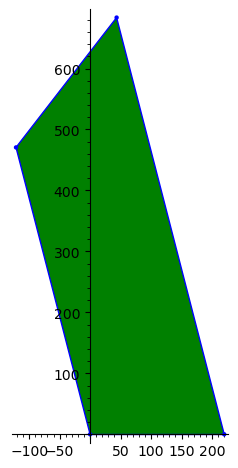

In [454]:
P = simplicial_complex_flow_polytope(bipyramid_wedge,  (353, 688, -931, -110, 353, 0, 0, 931, 110))
P.plot()

In [455]:
P.vertices()

(A vertex at (353, 0, 0, 931, 110, 0, 0),
 A vertex at (243, 0, 110, 931, 0, 0, 110),
 A vertex at (0, 243, 110, 688, 0, 243, 110),
 A vertex at (0, 353, 0, 578, 110, 353, 0))

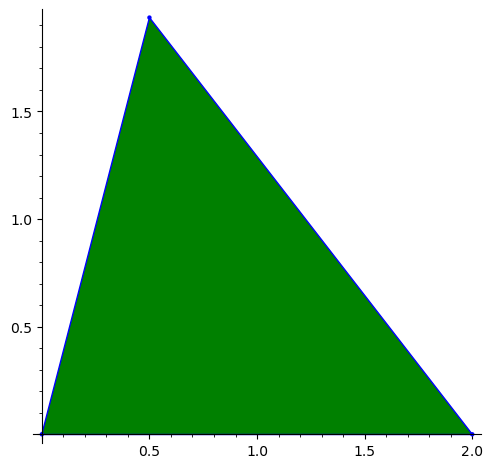

In [35]:
P = simplicial_complex_flow_polytope(bipyramid_wedge, [3,1,-2,-2,1,1,1,1,1])
P.plot()

In [457]:
P.vertices()

(A vertex at (0, 1, 2, 1, 0, 0, 1),
 A vertex at (0, 2, 1, 0, 1, 1, 0),
 A vertex at (1, 1, 1, 1, 1, 0, 0))

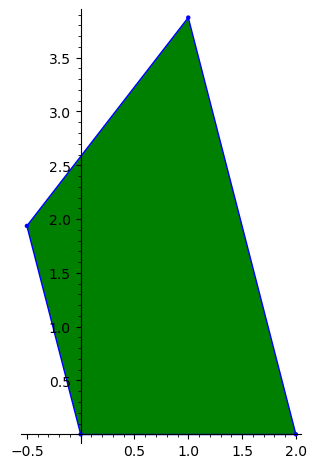

In [464]:
P = simplicial_complex_flow_polytope(bipyramid_wedge, [3,1,-2,-2,2,0,1,2,1])
P.plot()

In [459]:
P.vertices()

(A vertex at (0, 2, 1, 0, 1, 2, 0),
 A vertex at (2, 0, 1, 2, 1, 0, 0),
 A vertex at (1, 0, 2, 2, 0, 0, 1),
 A vertex at (0, 1, 2, 1, 0, 1, 1))

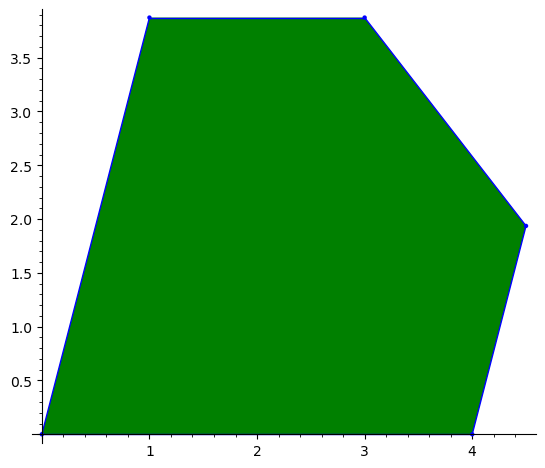

In [9]:
P = simplicial_complex_flow_polytope(bipyramid_wedge, [3, 1, -2, -2, 3, 0, 0, 2, 2])
P.plot()

In [10]:
P.vertices()

(A vertex at (3, 0, 0, 2, 2, 0, 0),
 A vertex at (1, 0, 2, 2, 0, 0, 2),
 A vertex at (1, 2, 0, 0, 2, 2, 0),
 A vertex at (0, 2, 1, 0, 1, 2, 1),
 A vertex at (0, 1, 2, 1, 0, 1, 2))

In [11]:
[f.ambient_V_indices() for f in P.faces(1)]

[(0, 2), (0, 1), (1, 4), (2, 3), (3, 4)]

In [12]:
[f.ambient_V_indices() for f in P.faces(2)]

[(0, 1, 2, 3, 4)]

In [9]:
bd = boundary_matrix(bipyramid_wedge)
bd

[ 1  1  1  0  0  0  0]
[-1  0  0  1  1  0  0]
[ 0 -1  0 -1  0  0  0]
[ 0  0 -1  0 -1  0  0]
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

In [23]:
a = bd * vector([0,1,0,0,1,0,1])
P = simplicial_complex_flow_polytope(bipyramid_wedge, a)
P.dimension()

0

In [14]:
bipyramid_wedge.betti()

{0: 1, 1: 0, 2: 2}

In [20]:
bd.right_kernel()

Free module of degree 7 and rank 2 over Integer Ring
Echelon basis matrix:
[ 1  0 -1  0  1  0 -1]
[ 0  1 -1 -1  1  1 -1]

In [36]:
P.vertices()

(A vertex at (0, 1, 2, 1, 0, 0, 1),
 A vertex at (0, 2, 1, 0, 1, 1, 0),
 A vertex at (1, 1, 1, 1, 1, 0, 0))

In [41]:
v = vector([0,1,2,1,0,0,1]); w = vector([0,2,1,0,1,1,0]); u = vector([1,1,1,1,1,0,0])

In [42]:
v-w

(0, -1, 1, 1, -1, -1, 1)

In [43]:
w-u

(-1, 1, 0, -1, 0, 1, 0)

In [44]:
u-v

(1, 0, -1, 0, 1, 0, -1)

In [47]:
span([v-w,w-u, u-v]).dimension()

2

In [40]:
bd * (vector([0,1,2,1,0,0,1]) - 2*vector([0,2,1,0,1,1,0]) + vector([1,1,1,1,1,0,0]))

(0, 0, 0, 0, 0, 0, 0, 0, 0)

In [33]:
# bd[[rows][cols]]
sub = bd[[0,1,2,3,4,6,7,8],[0,2,3,4,6]]
sub

[ 1  1  0  0  0]
[-1  0  1  1  0]
[ 0  0 -1  0  0]
[ 0 -1  0 -1  0]
[ 1  0  0  0  1]
[ 0  1  0  0 -1]
[ 0  0  1  0  0]
[ 0  0  0  1  1]

In [34]:
sub.right_kernel()

Free module of degree 5 and rank 1 over Integer Ring
Echelon basis matrix:
[ 1 -1  0  1 -1]

### trying to label vertices

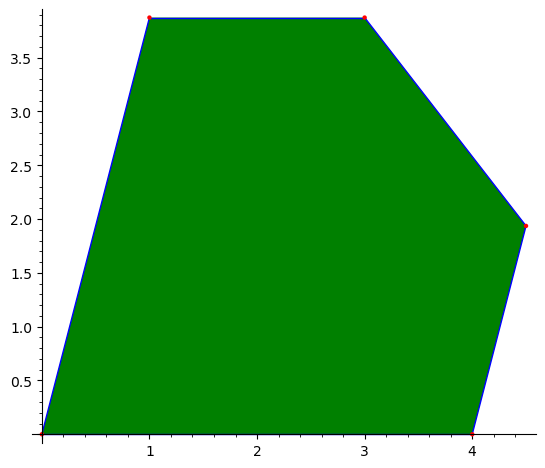

In [441]:
f = [[3,0,0,2,2,0,0],[1,0,2,2,0,0,2],[1,2,0,0,2,2,0],[0,2,1,0,1,2,1],[0,1,2,1,0,1,2]]
P = Polyhedron(vertices = f)
P.plot(point={'color':'red'})

In [446]:
P.faces(1)[0]

A 1-dimensional face of a Polyhedron in ZZ^7 defined as the convex hull of 2 vertices

In [436]:
f=[
[1,1,1],
[ 1,1,2 ],
[ 1,2,1 ],
[ 1,2,3 ],
[ 1,3,2 ],
[ 2,1,1 ],
[ 2,1,2 ],
[ 2,3,1 ],
[ 2,3,4 ],
[ 2,5,3 ],
[ 3,2,1 ],
[ 3,2,3 ],
[ 3,5,2 ],
[ 4,3,2 ]
]
F=Polyhedron(vertices=f)
F.plot(point={'color':'red'})

Graphics3d Object

In [427]:
g=F.plot(point={'color':'red'})
T=[text3d("{}".format(pt),pt) for pt in f]
labels = T[0]
for i in range(len(T)-1):
    labels = labels + T[i+1]
show(g+labels)

Graphics3d Object

In [439]:
g=P.plot(point={'color':'red'})
T=[text3d("{}".format(pt),pt) for pt in f]
labels = T[0]
for i in range(len(T)-1):
    labels = labels + T[i+1]
show(g+labels)

Graphics3d Object

In [411]:
bipyramid_wedge.betti()

{0: 1, 1: 0, 2: 2}

In [58]:
P

A 2-dimensional polyhedron in QQ^7 defined as the convex hull of 5 vertices (use the .plot() method to plot)

In [65]:
P.vertices()

(A vertex at (3, 0, 0, 2, 2, 0, 0),
 A vertex at (1, 0, 2, 2, 0, 0, 2),
 A vertex at (1, 2, 0, 0, 2, 2, 0),
 A vertex at (0, 2, 1, 0, 1, 2, 1),
 A vertex at (0, 1, 2, 1, 0, 1, 2))

In [32]:
P.facets()

(A 1-dimensional face of a Polyhedron in QQ^7 defined as the convex hull of 2 vertices,
 A 1-dimensional face of a Polyhedron in QQ^7 defined as the convex hull of 2 vertices,
 A 1-dimensional face of a Polyhedron in QQ^7 defined as the convex hull of 2 vertices,
 A 1-dimensional face of a Polyhedron in QQ^7 defined as the convex hull of 2 vertices,
 A 1-dimensional face of a Polyhedron in QQ^7 defined as the convex hull of 2 vertices)

In [37]:
P.faces(1)

(A 1-dimensional face of a Polyhedron in QQ^7 defined as the convex hull of 2 vertices,
 A 1-dimensional face of a Polyhedron in QQ^7 defined as the convex hull of 2 vertices,
 A 1-dimensional face of a Polyhedron in QQ^7 defined as the convex hull of 2 vertices,
 A 1-dimensional face of a Polyhedron in QQ^7 defined as the convex hull of 2 vertices,
 A 1-dimensional face of a Polyhedron in QQ^7 defined as the convex hull of 2 vertices)

In [10]:
bd  = boundary_matrix(bipyramid_wedge)
bd

[ 1  1  1  0  0  0  0]
[-1  0  0  1  1  0  0]
[ 0 -1  0 -1  0  0  0]
[ 0  0 -1  0 -1  0  0]
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

In [67]:
bipyramid_wedge.betti()

{0: 1, 1: 0, 2: 2}

## 4-simplex

In [463]:
#trying with a higher dimensional complex. The third Betti number is highest and has value 1 so should expect 1-dimensional flow polytope
foursimplex = SimplicialComplex([[0,1,2,3],[0,1,2,4],[0,1,3,4],[0,2,3,4],[1,2,3,4]])
good_labelings = []

test_simplicial_complex(foursimplex, good_labelings)

# for labeling in good_labelings:
#     print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Done


In [23]:
foursimplex.betti()

{0: 1, 1: 0, 2: 0, 3: 1}

In [32]:
bd = boundary_matrix(foursimplex)
bd

[-1 -1  0  0  0]
[ 1  0 -1  0  0]
[ 0  1  1  0  0]
[-1  0  0 -1  0]
[ 0 -1  0  1  0]
[ 0  0 -1 -1  0]
[ 1  0  0  0 -1]
[ 0  1  0  0  1]
[ 0  0  1  0 -1]
[ 0  0  0  1  1]

## 5-simplex

In [16]:
#trying with a higher dimensional complex. The fourth Betti number is highest and has value 1 so should expect 1-dimensional flow polytope
fivesimplex = SimplicialComplex([[0,1,2,3,4],[0,1,2,4,5],[0,1,3,4,5],[0,2,3,4,5],[1,2,3,4,5],[0,1,2,3,5]])
good_labelings = []

test_simplicial_complex(fivesimplex, good_labelings)

# for labeling in good_labelings:
#     print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Done


In [54]:
fivesimplex.betti()

{0: 1, 1: 0, 2: 0, 3: 0, 4: 1}

In [64]:
bd = boundary_matrix(triangles)
bd

[-1  0  0]
[ 1  0  0]
[-1  0  0]
[ 0 -1  0]
[ 0  1  0]
[ 0  0 -1]
[ 0  0  1]
[ 0 -1  0]
[ 0  0 -1]

## triangles

In [17]:
triangles = SimplicialComplex([[0,1,2],[1,3,4],[2,4,5]])
good_labelings = []

test_simplicial_complex(triangles, good_labelings)

# for labeling in good_labelings:
#     print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Done


In [56]:
triangles.betti()

{0: 1, 1: 1, 2: 0}

In [18]:
triangle = SimplicialComplex([[0,1],[1,2],[2,0]])
good_labelings = []

test_simplicial_complex(triangle, good_labelings)

# for labeling in good_labelings:
#     print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Done


In [59]:
triangle.betti()

{0: 1, 1: 1}

## pyramids

In [19]:
pyramids = SimplicialComplex([[0,1,2],[1,2,3],[0,2,3],[2,3,4],[3,4,5],[2,4,5],[2,3,5]])
good_labelings = []

test_simplicial_complex(pyramids, good_labelings)

# for labeling in good_labelings:
#     print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Done


In [15]:
pyramids.betti()

{0: 1, 1: 0, 2: 1}

In [63]:
bd = boundary_matrix(pyramids)
bd

[-1  0  0  0  0  0  0]
[ 1 -1  0  0  0  0  0]
[ 0  1  0  0  0  0  0]
[-1  0 -1  0  0  0  0]
[ 0  0  1  0  0  0  0]
[ 0 -1 -1 -1 -1  0  0]
[ 0  0  0  1  0 -1  0]
[ 0  0  0  0  1  1  0]
[ 0  0  0 -1  0  0 -1]
[ 0  0  0  0 -1  0  1]
[ 0  0  0  0  0 -1 -1]

## big complex

In [20]:
bigcomplex = SimplicialComplex([[0,1,2,3],[2,3,4,5],[0,1,2,5],[0,1,2,4],[1,3,4,5],[2,4,5,0],[1,2,5,0],[0,1,2,4],[2,3,1,5]])
bigcomplex.betti()
good_labelings = []

test_simplicial_complex(bigcomplex, good_labelings)

# for labeling in good_labelings:
#     print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Done


# 4/4/25 : Understanding Bernardi-Klivans higher trees definitions

In [35]:
example = SimplicialComplex([[1,2,3],[1,2,4],[2,3,4],[1,3,4],[2,4,5]])
bd = boundary_matrix(example)
bd

[ 1  1  0  0  0]
[-1  0  1  0  0]
[ 0 -1 -1  0  0]
[ 1  0  0  1  0]
[ 0  1  0 -1  1]
[ 0  0  0  0 -1]
[ 0  0  1  1  0]
[ 0  0  0  0  1]

In [36]:
example.betti()

{0: 1, 1: 0, 2: 1}

In [41]:
P = simplicial_complex_flow_polytope(example,[2,0,-2,2,1,-1,2,1])
P

A 1-dimensional polyhedron in QQ^5 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [17]:
bd.column_space().basis()

[
(1, 0, -1, 0, 0, 1, 0, -1),
(0, 1, -1, 0, 0, 0, 1, 0),
(0, 0, 0, 1, 0, -1, 1, 1),
(0, 0, 0, 0, 1, -1, 0, 1)
]

In [19]:
bd.columns()

[(1, -1, 0, 1, 0, 0, 0, 0),
 (1, 0, -1, 0, 1, 0, 0, 0),
 (0, 1, -1, 0, 0, 0, 1, 0),
 (0, 0, 0, 1, -1, 0, 1, 0),
 (0, 0, 0, 0, 1, -1, 0, 1)]

In [34]:
span([bd.columns()[1],bd.columns()[2],bd.columns()[3],bd.columns()[4]], ZZ).basis()

[
(1, 0, 0, -1, 0, 0, 1, 0, 0),
(0, 1, 0, -1, 0, 0, 0, 0, 1),
(0, 0, 1, -1, 0, 0, 0, -1, 1),
(0, 0, 0, 0, 0, 1, -1, -1, 1)
]

In [13]:
bipyramid_wedge

Simplicial complex with vertex set (0, 1, 2, 3, 4) and 7 facets

In [132]:
d2 = boundary_matrix(bipyramid_wedge)
d2

[ 1  1  1  0  0  0  0]
[-1  0  0  1  1  0  0]
[ 0 -1  0 -1  0  0  0]
[ 0  0 -1  0 -1  0  0]
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

In [40]:
d2.image()

Free module of degree 7 and rank 5 over Integer Ring
Echelon basis matrix:
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

In [33]:
d2.row_space().basis()

[
(1, 0, 0, 0, 0, 1, 1),
(0, 1, 0, 0, 0, -1, 0),
(0, 0, 1, 0, 0, 0, -1),
(0, 0, 0, 1, 0, 1, 0),
(0, 0, 0, 0, 1, 0, 1)
]

In [71]:
#dimension of column space of d2 is:
span([d2.columns()[0],d2.columns()[1],d2.columns()[2],d2.columns()[3],d2.columns()[4],d2.columns()[5],d2.columns()[6]], RR).dimension()

5

In [73]:
#basis of column space of d2 is:
span([d2.columns()[0],d2.columns()[1],d2.columns()[2],d2.columns()[3],d2.columns()[4],d2.columns()[5],d2.columns()[6]], QQ).basis()

[
(1, 0, 0, -1, 0, 0, 1, 0, 0),
(0, 1, 0, -1, 0, 0, 0, 0, 1),
(0, 0, 1, -1, 0, 0, 0, -1, 1),
(0, 0, 0, 0, 1, 0, -1, 0, 1),
(0, 0, 0, 0, 0, 1, -1, -1, 1)
]

In [22]:
#d1 matrix (rows indexed by vertices, columns indexed by edges)
d1= matrix(ZZ,[[1,1,1,1,0,0,0,0,0],[-1,0,0,0,1,1,1,0,0],[0,-1,0,0,-1,0,0,1,1],[0,0,-1,0,0,-1,0,-1,0],[0,0,0,-1,0,0,-1,0,-1]])
d1

[ 1  1  1  1  0  0  0  0  0]
[-1  0  0  0  1  1  1  0  0]
[ 0 -1  0  0 -1  0  0  1  1]
[ 0  0 -1  0  0 -1  0 -1  0]
[ 0  0  0 -1  0  0 -1  0 -1]

In [55]:
d1.kernel()

Free module of degree 5 and rank 1 over Integer Ring
Echelon basis matrix:
[1 1 1 1 1]

## function to find spannning forests of bipyramid

In [133]:
#This function will look at the columns of d2 and find which sets of 5 columns are lin indep and span the col space
#I think these represent the spanning forests of bipyramid_wedge as descrived in Definition 3 of Bernardi-Klivans
##########columns are independent and of maximal rank (here 5)
forests = []
for s in Subsets([0,1,2,3,4,5,6], 5):
    dim = span([d2.columns()[s[0]],d2.columns()[s[1]],d2.columns()[s[2]],d2.columns()[s[3]],d2.columns()[s[4]]], QQ).dimension()
    if dim == 5:
        forests.append(s)
        print(s[0], s[1],s[2],s[3],s[4])

0 1 2 3 4
0 1 2 3 6
0 1 2 4 5
0 1 2 5 6
0 1 3 4 6
0 1 4 5 6
0 2 3 4 5
0 2 3 5 6
0 3 4 5 6
1 2 3 4 5
1 2 3 4 6
1 2 3 5 6
1 2 4 5 6
1 3 4 5 6
2 3 4 5 6


In [17]:
bipyramid_wedge.homology()

{0: 0, 1: 0, 2: Z x Z}

In [78]:
bipyramid_wedge.facets()

{(0, 2, 4), (0, 1, 4), (0, 2, 3), (1, 2, 4), (0, 1, 2), (1, 2, 3), (0, 1, 3)}

In [80]:
list_of_sub_maximal_faces(bipyramid_wedge)

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4)]

In [101]:
d2

[ 1  1  1  0  0  0  0]
[-1  0  0  1  1  0  0]
[ 0 -1  0 -1  0  0  0]
[ 0  0 -1  0 -1  0  0]
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

In [104]:
#submatrix with rows 0,2 and columns 0,3
d2[[0,2],[0,3]]

[ 1  0]
[ 0 -1]

## function to find rooted spanning forests of bipyramid

In [24]:
#Now moving on to find roots
#Lemma 14 in Bernardi-Klivans says that (F,R) is a rooted forest iff submatrix from R *complement* and F is invertible
#earlier function finds forests, this just iterates through them and looks for possible rows that would make good submatrices

rooted_forests = []

for forest in forests:
    for s in Subsets([0,1,2,3,4,5,6,7,8], 5):
        #print(s)
        A = d2[list(s), list(forest)]
        #print("A = ", A)
        if A.is_invertible():
            rows = [0,1,2,3,4,5,6,7,8]
            for entry in s:
                rows.remove(entry)
            rooted_forests.append([forest,rows])


##Based on Example 22 of Bernardi-Klivans, I believe that this gives the list of all rooted spanning forests for 
#the equitorial bipyramid (AKA bipyramid_wedge). There are 15 spanning spanning forests and 75 roots that can match
#with any forest

#Seems like these are NOT rooted spanning TREES though because ker(d1) != im(d2).
#Not sure how to interpret these 1125 rooted spanning forests...I was expecting the netflow vector to play into
#this somehow so we could get different flow polytopes (in particular diff #vertices) for different flows like we see above.
#Am I looking at the wrong dimension?

##Ideally, we would narrow these down based on which are a-valid, but what does that mean in this context?

In [25]:
len(rooted_forests)

1125

In [124]:
d1.kernel()

Free module of degree 5 and rank 1 over Integer Ring
Echelon basis matrix:
[1 1 1 1 1]

In [125]:
d2.image()

Free module of degree 7 and rank 5 over Integer Ring
Echelon basis matrix:
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

## looking for rooted spanning forests of example complex from BK paper

Trying another example to look for patterns

In [56]:
example = SimplicialComplex([[1,2,3],[1,2,4],[2,3,4],[1,3,4],[2,4,5]])


In [46]:
d2 = boundary_matrix(example)
d2

[ 1  1  0  0  0]
[-1  0  1  0  0]
[ 0 -1 -1  0  0]
[ 1  0  0  1  0]
[ 0  1  0 -1  1]
[ 0  0  0  0 -1]
[ 0  0  1  1  0]
[ 0  0  0  0  1]

In [48]:
d2.column_space()

Free module of degree 8 and rank 4 over Integer Ring
Echelon basis matrix:
[ 1  0 -1  0  0  1  0 -1]
[ 0  1 -1  0  0  0  1  0]
[ 0  0  0  1  0 -1  1  1]
[ 0  0  0  0  1 -1  0  1]

In [20]:
forests = []
for s in Subsets([0,1,2,3,4], 4):
    dim = span([d2.columns()[s[0]],d2.columns()[s[1]],d2.columns()[s[2]],d2.columns()[s[3]]], QQ).dimension()
    if dim == 4:
        forests.append(s)
        print(s[0], s[1],s[2],s[3])

rooted_forests = []

for forest in forests:
    for s in Subsets([0,1,2,3,4,5,6,7], 4):
        #print(s)
        A = d2[list(s), list(forest)]
        #print("A = ", A)
        if A.is_invertible():
            rows = [0,1,2,3,4,5,6,7]
            for entry in s:
                rows.remove(entry)
            rooted_forests.append([forest,rows])

0 1 2 3
0 1 2 4
0 1 3 4
0 2 3 4
1 2 3 4


In [21]:
len(rooted_forests)

127

In [7]:
good_labelings = []

example = SimplicialComplex([[0,1,2],[0,1,3],[1,2,3],[0,2,3],[1,3,4]])


test_simplicial_complex(example, good_labelings)

for labeling in good_labelings:
    print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Type =  2 Dim =  1 Perm =  [1, 2, 3, 4, 5] Flow =  (2, 0, -2, 1, 1, 0, 1, 0)
Type =  2 Dim =  1 Perm =  [1, 2, 3, 4, 5] Flow =  (2, 0, -2, 2, 0, 0, 2, 0)
Type =  2 Dim =  1 Perm =  [1, 2, 3, 4, 5] Flow =  (2, 0, -2, 2, 1, -1, 2, 1)
Type =  2 Dim =  1 Perm =  [1, 2, 3, 5, 4] Flow =  (2, 0, -2, 2, 0, 0, 2, 0)
Type =  2 Dim =  1 Perm =  [1, 2, 3, 5, 4] Flow =  (2, 0, -2, 2, 1, -1, 2, 1)
Type =  2 Dim =  1 Perm =  [1, 2, 4, 3, 5] Flow =  (2, 0, -2, 1, 1, 0, 1, 0)
Type =  2 Dim =  1 Perm =  [1, 2, 4, 3, 5] Flow =  (2, 0, -2, 2, 0, 0, 2, 0)
Type =  2 Dim =  1 Perm =  [1, 3, 2, 5, 4] Flow =  (2, 0, -2, 1, 1, 0, 1, 0)
Type =  2 Dim =  1 Perm =  [1, 3, 2, 5, 4] Flow =  (2, 0, -2, 2, 0, 0, 2, 0)
Type =  2 Dim =  1 Perm =  [1, 3, 4, 2, 5] Flow =  (2, 0, -2, 1, 1, 0, 1, 0)
Type =  2 Dim =  1 Perm =  [1, 3, 4, 2, 5] Flow =  (2, 0, -2, 2, 0, 0, 2, 0)
Type =  2 Dim =  1 Perm =  [1, 4, 3, 2, 5] Flow =  (2, 0, -2, 1, 1, 0, 1, 0)
Type =  2 Dim =  1 Perm =  [1, 4, 3, 2, 5] Flow =  (2, 0, -2, 2, 0, 0, 2, 

In [39]:
example.betti()

{0: 1, 1: 0, 2: 1}

In [47]:
boundary_matrix(example)

[ 1  1  0  0  0]
[-1  0  1  0  0]
[ 0 -1 -1  0  0]
[ 1  0  0  1  0]
[ 0  1  0 -1  1]
[ 0  0  0  0 -1]
[ 0  0  1  1  0]
[ 0  0  0  0  1]

## Checking if subcomplexes are forests

Looks like all subcomplexes with Betti number 0 containing source are forests, but not necessarily spanning forests (dim of span too low)

In [136]:
sub = subcomplexes(bipyramid_wedge)
sub

[{0, 3, 4},
 {1, 4, 5},
 {2, 3, 6},
 {0, 1, 3, 4},
 {0, 1, 4, 5},
 {0, 2, 3, 4},
 {0, 2, 3, 6},
 {0, 3, 4, 5},
 {0, 3, 4, 6},
 {1, 2, 3, 6},
 {1, 2, 4, 5},
 {1, 2, 5, 6},
 {1, 3, 4, 5},
 {1, 3, 4, 6},
 {1, 4, 5, 6},
 {2, 3, 4, 5},
 {2, 3, 4, 6},
 {2, 3, 5, 6},
 {0, 1, 2, 3, 4},
 {0, 1, 2, 3, 6},
 {0, 1, 2, 4, 5},
 {0, 1, 2, 5, 6},
 {0, 1, 3, 4, 6},
 {0, 1, 4, 5, 6},
 {0, 2, 3, 4, 5},
 {0, 2, 3, 5, 6},
 {0, 3, 4, 5, 6},
 {1, 2, 3, 4, 5},
 {1, 2, 3, 4, 6},
 {1, 2, 3, 5, 6},
 {1, 2, 4, 5, 6},
 {1, 3, 4, 5, 6},
 {2, 3, 4, 5, 6}]

In [138]:
bd = boundary_matrix(bipyramid_wedge)

In [146]:
comp = [bd.columns()[0], bd.columns()[1], bd.columns()[4]]
len(comp)

3

In [143]:
span(comp, QQ)

Vector space of degree 9 and dimension 3 over Rational Field
Basis matrix:
[ 1  0  0 -1  1  0  0  0  1]
[ 0  1  0 -1  0  0  0  0  1]
[ 0  0  1 -1  1 -1  0  0  1]

In [148]:
for facets in sub:
    comp = []
    for entry in facets:
        comp.append(bd.columns()[entry])
    dim = span(comp,QQ).dimension()
    if dim != len(facets):
        print("Mismatch", facets)

print("done")

done


In [152]:
for s in Subsets(range(3)):
    print(s)

{}
{0}
{1}
{2}
{0, 1}
{0, 2}
{1, 2}
{0, 1, 2}


In [155]:
#Looking for all forests of bipyramid by BK definition. Idea is that perhaps the subcomplexes are the forests that satsify some other property (source?)

def find_forests(X):
    forests = []
    bd = boundary_matrix(X)
    num_cols = len(bd.columns())

    for s in Subsets(range(num_cols)):
        cols = []
        for entry in s:
            cols.append(bd.columns()[entry])
        if span(cols,QQ).dimension() == len(cols):
            forests.append(s)
    return(forests)

In [158]:
forests = find_forests(bipyramid_wedge)
forests

[{},
 {0},
 {1},
 {2},
 {3},
 {4},
 {5},
 {6},
 {0, 1},
 {0, 2},
 {0, 3},
 {0, 4},
 {0, 5},
 {0, 6},
 {1, 2},
 {1, 3},
 {1, 4},
 {1, 5},
 {1, 6},
 {2, 3},
 {2, 4},
 {2, 5},
 {2, 6},
 {3, 4},
 {3, 5},
 {3, 6},
 {4, 5},
 {4, 6},
 {5, 6},
 {0, 1, 2},
 {0, 1, 3},
 {0, 1, 4},
 {0, 1, 5},
 {0, 1, 6},
 {0, 2, 3},
 {0, 2, 4},
 {0, 2, 5},
 {0, 2, 6},
 {0, 3, 4},
 {0, 3, 5},
 {0, 3, 6},
 {0, 4, 5},
 {0, 4, 6},
 {0, 5, 6},
 {1, 2, 3},
 {1, 2, 4},
 {1, 2, 5},
 {1, 2, 6},
 {1, 3, 4},
 {1, 3, 5},
 {1, 3, 6},
 {1, 4, 5},
 {1, 4, 6},
 {1, 5, 6},
 {2, 3, 4},
 {2, 3, 5},
 {2, 3, 6},
 {2, 4, 5},
 {2, 4, 6},
 {2, 5, 6},
 {3, 4, 5},
 {3, 4, 6},
 {3, 5, 6},
 {4, 5, 6},
 {0, 1, 2, 3},
 {0, 1, 2, 4},
 {0, 1, 2, 5},
 {0, 1, 2, 6},
 {0, 1, 3, 4},
 {0, 1, 3, 6},
 {0, 1, 4, 5},
 {0, 1, 4, 6},
 {0, 1, 5, 6},
 {0, 2, 3, 4},
 {0, 2, 3, 5},
 {0, 2, 3, 6},
 {0, 2, 4, 5},
 {0, 2, 5, 6},
 {0, 3, 4, 5},
 {0, 3, 4, 6},
 {0, 3, 5, 6},
 {0, 4, 5, 6},
 {1, 2, 3, 4},
 {1, 2, 3, 5},
 {1, 2, 3, 6},
 {1, 2, 4, 5},
 {1, 2, 4, 6},

In [159]:
for entry in sub:
    if entry not in forests:
        print(entry)
print("done")

done


In [191]:
#have i just chosen the same thing in two ways? are the subcomplexes that I looked at actually the only possible things
#or can these other subcomplexes also be vertices? try to create example where other forests appear to make sure I haven't just had bad assumptions
complexes = []
for entry in forests:
    if contains_source(bipyramid_wedge, list(entry)):
        if contains_sink(bipyramid_wedge, list(entry)):
            complexes.append(entry)
print("done")

done


In [188]:
complexes

[{0, 3, 4},
 {1, 4, 5},
 {2, 3, 6},
 {0, 1, 3, 4},
 {0, 1, 4, 5},
 {0, 2, 3, 4},
 {0, 2, 3, 6},
 {0, 3, 4, 5},
 {0, 3, 4, 6},
 {1, 2, 3, 6},
 {1, 2, 4, 5},
 {1, 2, 5, 6},
 {1, 3, 4, 5},
 {1, 3, 4, 6},
 {1, 4, 5, 6},
 {2, 3, 4, 5},
 {2, 3, 4, 6},
 {2, 3, 5, 6},
 {0, 1, 2, 3, 4},
 {0, 1, 2, 3, 6},
 {0, 1, 2, 4, 5},
 {0, 1, 2, 5, 6},
 {0, 1, 3, 4, 6},
 {0, 1, 4, 5, 6},
 {0, 2, 3, 4, 5},
 {0, 2, 3, 5, 6},
 {0, 3, 4, 5, 6},
 {1, 2, 3, 4, 5},
 {1, 2, 3, 4, 6},
 {1, 2, 3, 5, 6},
 {1, 2, 4, 5, 6},
 {1, 3, 4, 5, 6},
 {2, 3, 4, 5, 6}]

In [189]:
sub

[{0, 3, 4},
 {1, 4, 5},
 {2, 3, 6},
 {0, 1, 3, 4},
 {0, 1, 4, 5},
 {0, 2, 3, 4},
 {0, 2, 3, 6},
 {0, 3, 4, 5},
 {0, 3, 4, 6},
 {1, 2, 3, 6},
 {1, 2, 4, 5},
 {1, 2, 5, 6},
 {1, 3, 4, 5},
 {1, 3, 4, 6},
 {1, 4, 5, 6},
 {2, 3, 4, 5},
 {2, 3, 4, 6},
 {2, 3, 5, 6},
 {0, 1, 2, 3, 4},
 {0, 1, 2, 3, 6},
 {0, 1, 2, 4, 5},
 {0, 1, 2, 5, 6},
 {0, 1, 3, 4, 6},
 {0, 1, 4, 5, 6},
 {0, 2, 3, 4, 5},
 {0, 2, 3, 5, 6},
 {0, 3, 4, 5, 6},
 {1, 2, 3, 4, 5},
 {1, 2, 3, 4, 6},
 {1, 2, 3, 5, 6},
 {1, 2, 4, 5, 6},
 {1, 3, 4, 5, 6},
 {2, 3, 4, 5, 6}]

In [190]:
(Set(complexes)).symmetric_difference(Set(sub))

{}

In [165]:
#Input: Simplicial complex X and list of facet indices Y.
#Output: dth Betti number of subcomplex defined by facets indicated in Y

def check_betti(X, Y):
    facets = sorted(list(X.facets()))
    sub_facets = []
    for entry in Y:
        sub_facets.append(facets[entry])
    Z = SimplicialComplex(sub_facets)
    dim = X.dimension()
    return Z.betti(dim)

In [186]:
check_betti(bipyramid_wedge, [1,5,6])

0

In [195]:
i=0
for i in range(10):
    vec = bd * vector((0,0,random.sample(range(1,10),1)[0],random.sample(range(1,10),1)[0],0,0,random.sample(range(1,10),1)[0]))
    P = simplicial_complex_flow_polytope(bipyramid_wedge, vec)
    if P.dimension() > 0:
        print(P.vertices(), vec)

    i = i + 1

print("done")

(A vertex at (0, 0, 9, 2, 0, 0, 8), A vertex at (8, 0, 1, 2, 8, 0, 0), A vertex at (6, 2, 1, 0, 8, 2, 0), A vertex at (0, 2, 7, 0, 2, 2, 6)) (9, 2, -2, -9, 8, 0, 1, 2, 8)
(A vertex at (0, 0, 5, 1, 0, 0, 7), A vertex at (5, 0, 0, 1, 5, 0, 2), A vertex at (4, 1, 0, 0, 5, 1, 2), A vertex at (0, 1, 4, 0, 1, 1, 6)) (5, 1, -1, -5, 7, 0, -2, 1, 7)
(A vertex at (0, 0, 3, 8, 0, 0, 6), A vertex at (3, 0, 0, 8, 3, 0, 3), A vertex at (0, 3, 0, 5, 3, 3, 3)) (3, 8, -8, -3, 6, 0, -3, 8, 6)
(A vertex at (0, 0, 8, 2, 0, 0, 4), A vertex at (4, 0, 4, 2, 4, 0, 0), A vertex at (2, 2, 4, 0, 4, 2, 0), A vertex at (0, 2, 6, 0, 2, 2, 2)) (8, 2, -2, -8, 4, 0, 4, 2, 4)
(A vertex at (0, 0, 8, 7, 0, 0, 8), A vertex at (8, 0, 0, 7, 8, 0, 0), A vertex at (1, 7, 0, 0, 8, 7, 0), A vertex at (0, 7, 1, 0, 7, 7, 1)) (8, 7, -7, -8, 8, 0, 0, 7, 8)
(A vertex at (0, 0, 3, 6, 0, 0, 4), A vertex at (3, 0, 0, 6, 3, 0, 1), A vertex at (0, 3, 0, 3, 3, 3, 1)) (3, 6, -6, -3, 4, 0, -1, 6, 4)
(A vertex at (0, 0, 5, 1, 0, 0, 5), A ver

# Trying to understand the vertices of the flow polytopes

4/11/25 - After meeting with William, looking for similarities between bipyramid flow polytope vertices and BK example complex

In [38]:
P = simplicial_complex_flow_polytope(example, [2,0,-2,1,1,0,1,0])
P.plot()
P.vertices()

(A vertex at (0, 2, 0, 1, 0), A vertex at (1, 1, 1, 0, 0))

In [56]:
P = simplicial_complex_flow_polytope(example, [2,0,-2,2,0,0,2,0])
P.plot()
P.vertices()
P

A 1-dimensional polyhedron in QQ^5 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [55]:
P = simplicial_complex_flow_polytope(example, [2, 0, -2, 2, 1, -1, 2, 1])
P.plot()
P.vertices()
P

A 1-dimensional polyhedron in QQ^5 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [50]:
simplex = SimplicialComplex([[0,1,2],[0,1,3],[0,2,3],[1,2,3]])
bd = boundary_matrix(simplex)
bd

[ 1  1  0  0]
[-1  0  1  0]
[ 0 -1 -1  0]
[ 1  0  0  1]
[ 0  1  0 -1]
[ 0  0  1  1]

In [60]:
P = simplicial_complex_flow_polytope(simplex, [2,0,-2,2,0,2])
P

A 1-dimensional polyhedron in QQ^4 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [61]:
P.vertices()

(A vertex at (0, 2, 0, 2), A vertex at (2, 0, 2, 0))

In [63]:
P = simplicial_complex_flow_polytope(simplex, [2,0,-2,1,1,1])
P

A 1-dimensional polyhedron in QQ^4 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [64]:
P.vertices()

(A vertex at (0, 2, 0, 1), A vertex at (1, 1, 1, 0))

Trying to understand what a "flow" looks like in this context. Thinking that the vertices of the flow polytope should correspond to collections of facets that sum to the netflow vectors, have dth Betti number 0 (and include the source?). Testing these ideas below with various less-symmetrical examples.

Ideas here explained in 4/11/25 email to William titled "Relabeling bipyramid"

In [10]:
example = SimplicialComplex([[0,1,2],[0,1,4],[1,2,4],[0,2,4],[1,3,4]])
example

Simplicial complex with vertex set (0, 1, 2, 3, 4) and 5 facets

In [12]:
d2 = boundary_matrix(example)
d2

[ 1  1  0  0  0]
[-1  0  1  0  0]
[ 0 -1 -1  0  0]
[ 1  0  0  1  0]
[ 0  0  0  0  1]
[ 0  1  0 -1 -1]
[ 0  0  1  1  0]
[ 0  0  0  0  1]

In [15]:
example.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,)},
 1: {(0, 1), (0, 2), (0, 4), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4)},
 2: {(0, 1, 2), (0, 1, 4), (0, 2, 4), (1, 2, 4), (1, 3, 4)}}

In [16]:
example.betti()

{0: 1, 1: 0, 2: 1}

In [19]:
P = simplicial_complex_flow_polytope(example, [2,0,-2,2,1,-1,2,1])
P.vertices()

(A vertex at (0, 2, 0, 2, 1), A vertex at (2, 0, 2, 0, 1))

In [23]:
vert2 = SimplicialComplex([[0,2,4],[0,1,2],[1,3,4]])
vert2

Simplicial complex with vertex set (0, 1, 2, 3, 4) and facets {(0, 1, 2), (0, 2, 4), (1, 3, 4)}

In [24]:
vert2.betti()

{0: 1, 1: 1, 2: 0}

In [25]:
vert1 = SimplicialComplex([[0,1,4],[1,2,4],[1,3,4]])
vert1

Simplicial complex with vertex set (0, 1, 2, 3, 4) and facets {(0, 1, 4), (1, 2, 4), (1, 3, 4)}

In [26]:
vert1.betti()

{0: 1, 1: 0, 2: 0}

In [29]:
##new example
good_labelings = []
triangles = SimplicialComplex([[0,1,2],[2,3,4],[2,6,5],[4,5,7]])


test_simplicial_complex(triangles, good_labelings)

for labeling in good_labelings:
    print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6, 7, 8] Flow =  (1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Type =  2 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6, 7, 8] Flow =  (1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6, 7, 8] Flow =  (0, 0, 0, 1, -1, 0, 0, 1, 0, 0, 0, 0)
Type =  2 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6, 7, 8] Flow =  (1, -1, 1, 1, -1, 0, 0, 1, 0, 0, 0, 0)
Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6, 7, 8] Flow =  (0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 1, 0)
Type =  2 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6, 7, 8] Flow =  (1, -1, 1, 1, -1, 1, -1, 1, 0, 0, 1, 0)
Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6, 7, 8] Flow =  (0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 1)
Type =  2 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6, 7, 8] Flow =  (1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1)
Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6, 8, 7] Flow =  (1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Type =  2 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6, 8, 7] Flow =  (1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Type =  1 Dim 

In [30]:
d2 = boundary_matrix(triangles)
d2

[ 1  0  0  0]
[-1  0  0  0]
[ 1  0  0  0]
[ 0  1  0  0]
[ 0 -1  0  0]
[ 0  0  1  0]
[ 0  0 -1  0]
[ 0  1  0  0]
[ 0  0  0  1]
[ 0  0  0 -1]
[ 0  0  1  0]
[ 0  0  0  1]

In [31]:
triangles.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,)},
 1: {(0, 1),
  (0, 2),
  (1, 2),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 6),
  (3, 4),
  (4, 5),
  (4, 7),
  (5, 6),
  (5, 7)},
 2: {(0, 1, 2), (2, 3, 4), (2, 5, 6), (4, 5, 7)}}

In [34]:
P = simplicial_complex_flow_polytope(triangles, [1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1])
P.vertices()

(A vertex at (1, 1, 1, 1),)

In [39]:
##new examples
good_labelings = []

fourtri = SimplicialComplex([[0,1,2],[1,3,4],[1,2,4],[2,4,5]])
test_simplicial_complex(fourtri, good_labelings)

for labeling in good_labelings:
    print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (1, -1, 1, 0, 0, 0, 0, 0, 0)
Type =  2 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (1, -1, 1, 0, 0, 0, 0, 0, 0)
Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (0, 0, 1, 0, -1, 1, 0, 0, 0)
Type =  2 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (1, -1, 2, 0, -1, 1, 0, 0, 0)
Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (0, 0, 0, 1, -1, 0, 0, 1, 0)
Type =  2 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (1, -1, 2, 1, -2, 1, 0, 1, 0)
Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (0, 0, 0, 0, 0, 1, -1, 0, 1)
Type =  2 Dim =  0 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (1, -1, 2, 1, -2, 2, -1, 1, 1)
Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (1, -1, 1, 0, 0, 0, 0, 0, 0)
Type =  2 Dim =  0 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (1, -1, 1, 0, 0, 0, 0, 0, 0)
Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (0, 0, 0, 1, -1, 0, 0, 1, 0)
Type =  1 Dim =  0 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (0, 0, 0, 0, 0, 1, -1, 0, 1)


In [42]:
##new example

X = simplicial_complexes.RandomComplex(6, 2); X
X.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 4),
  (3, 5),
  (4, 5)},
 2: {(0, 1, 3),
  (0, 1, 5),
  (0, 2, 4),
  (0, 2, 5),
  (1, 2, 3),
  (1, 2, 4),
  (1, 2, 5),
  (1, 3, 4),
  (1, 3, 5),
  (2, 3, 4),
  (2, 3, 5)}}

In [45]:
X.betti()

{0: 1, 1: 1, 2: 2}

In [46]:
good_labelings = []

test_simplicial_complex(X, good_labelings)

for labeling in good_labelings:
    print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (2, 2, -1, -1, -2, 3, 2, -2, -1, 1, 2, 2, 1, 1, 0, 0)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (2, 2, -1, -1, -2, 3, 2, -2, -1, 2, 1, 2, 2, 1, 0, 0)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (2, 2, -1, -1, -2, 3, 2, -2, -1, 3, 1, 1, 2, 2, 0, 0)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (2, 2, -1, -1, -2, 3, 2, -2, -1, 3, 1, 1, 2, 2, -1, 1)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (2, 2, -1, -2, -1, 3, 2, -1, -2, 1, 2, 2, 1, 1, 0, 0)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (2, 2, -1, -2, -1, 3, 2, -1, -2, 2, 1, 2, 2, 1, 0, 0)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (2, 2, -1, -2, -1, 3, 2, -1, -2, 3, 1, 1, 2, 2, 0, 0)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (2, 2, -1, -2, -1, 3, 2, -1, -2, 3, 1, 1, 2, 2, -1, 1)
Type =  2 Dim =  2 Perm =  [1, 3, 2, 4, 5, 6] Flow =  (2, 2, -1, -1, -2, 3, 1, -1, -1, 2, 1, 2, 1, 1, 0, 0)
Type =  2 Dim =  2 Perm = 

In [48]:
d2 = boundary_matrix(X)
d2

[ 1  1  0  0  0  0  0  0  0  0  0  0]
[ 0  0  1  1  0  0  0  0  0  0  0  0]
[-1  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0  0  0  0  0]
[ 0 -1  0 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  1  1  1  0  0  0  0  0]
[ 1  0  0  0 -1  0  0  1  1  0  0  0]
[ 0  0  0  0  0 -1  0 -1  0  0  0  0]
[ 0  1  0  0  0  0 -1  0 -1  0  0  0]
[ 0  0  0  0  1  0  0  0  0  1  1  0]
[ 0  0  1  0  0  1  0  0  0 -1  0  0]
[ 0  0  0  1  0  0  1  0  0  0 -1  0]
[ 0  0  0  0  0  0  0  1  0  1  0  0]
[ 0  0  0  0  0  0  0  0  1  0  1  0]
[ 0  0  0  0  0  0  0  0  0  0  0 -1]
[ 0  0  0  0  0  0  0  0  0  0  0  1]

In [49]:
list_of_sub_maximal_faces(X)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4,),
 (5,)]

In [50]:
X.is_pure()

False

## random simplicial complex example 1

In [7]:
#This Y is same as random X below in case it gets re-randomized
#First Random Example in notes

Y = SimplicialComplex([[0,1,3],[0,1,5],[0,2,3],[0,2,4],[0,3,5],[1,2,3],[1,2,5],[1,3,4],[1,3,5],[1,4,5],[2,3,4],[2,4,5]])
Y.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 4),
  (3, 5),
  (4, 5)},
 2: {(0, 1, 3),
  (0, 1, 5),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 5),
  (1, 2, 3),
  (1, 2, 5),
  (1, 3, 4),
  (1, 3, 5),
  (1, 4, 5),
  (2, 3, 4),
  (2, 4, 5)}}

In [51]:
X = simplicial_complexes.RandomComplex(6, 2); X
X.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 4),
  (3, 5),
  (4, 5)},
 2: {(0, 1, 3),
  (0, 1, 5),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 5),
  (1, 2, 3),
  (1, 2, 5),
  (1, 3, 4),
  (1, 3, 5),
  (1, 4, 5),
  (2, 3, 4),
  (2, 4, 5)}}

In [52]:
X.is_pure()

True

In [53]:
good_labelings = []

test_simplicial_complex(X, good_labelings)

for labeling in good_labelings:
    print("Type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (2, 2, -1, -1, -2, 2, 2, 0, -2, 2, 1, 1, 1, 2, 1)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (2, 2, -1, -1, -2, 2, 2, 0, -2, 3, 0, 1, 2, 2, 1)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 5, 6] Flow =  (2, 2, -1, -1, -2, 2, 2, 0, -2, 3, 1, 0, 2, 2, 2)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (2, 2, -1, -2, -1, 2, 2, 0, -2, 2, 1, 1, 2, 1, 1)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (2, 2, -1, -2, -1, 2, 2, 0, -2, 3, 1, 0, 2, 2, 1)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 4, 6, 5] Flow =  (2, 2, -1, -2, -1, 2, 2, 0, -2, 3, 2, -1, 2, 2, 2)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 5, 4, 6] Flow =  (2, 2, -1, -1, -2, 2, 2, 0, -2, 2, 1, 1, 2, 1, 2)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 5, 4, 6] Flow =  (2, 2, -1, -1, -2, 2, 2, 0, -2, 3, 1, 0, 2, 2, 2)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 6, 4, 5] Flow =  (2, 2, -1, 0, -3, 2, 2, 0, -2, 3, 0, 1, 2, 2, 2)
Type =  2 Dim =  2 Perm =  [1, 2, 3, 6, 5, 4] Flow =  (2, 2, 0, 

In [8]:
d2 = boundary_matrix(Y)

In [9]:
d2

[ 1  1  0  0  0  0  0  0  0  0  0  0]
[ 0  0  1  1  0  0  0  0  0  0  0  0]
[-1  0 -1  0  1  0  0  0  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  0  0  0  0]
[ 0 -1  0  0 -1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  1  1  0  0  0  0  0]
[ 1  0  0  0  0 -1  0  1  1  0  0  0]
[ 0  0  0  0  0  0  0 -1  0  1  0  0]
[ 0  1  0  0  0  0 -1  0 -1 -1  0  0]
[ 0  0  1  0  0  1  0  0  0  0  1  0]
[ 0  0  0  1  0  0  0  0  0  0 -1  1]
[ 0  0  0  0  0  0  1  0  0  0  0 -1]
[ 0  0  0  0  0  0  0  1  0  0  1  0]
[ 0  0  0  0  1  0  0  0  1  0  0  0]
[ 0  0  0  0  0  0  0  0  0  1  0  1]

In [10]:
Y.betti()

{0: 1, 1: 0, 2: 2}

In [11]:
P = simplicial_complex_flow_polytope(Y, [2, 2, -1, -1, -2, 2, 2, 0, -2, 3, 1, 0, 2, 2, 2])
P

A 2-dimensional polyhedron in QQ^12 defined as the convex hull of 4 vertices (use the .plot() method to plot)

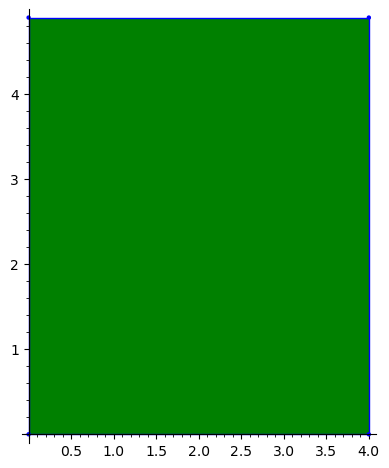

In [101]:
P.plot()

In [102]:
P.vertices()

(A vertex at (0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2),
 A vertex at (0, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0),
 A vertex at (2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0),
 A vertex at (2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2))

In [60]:
subcomplex = SimplicialComplex([[0,1,3],[0,2,3],[0,2,4],[0,3,5],[1,2,3],[1,3,4],[1,4,5]])

In [61]:
subcomplex.betti()

{0: 1, 1: 2, 2: 0}

### journal entry

Maybe this observation is just baked into the definition of flow polytope? If we say our polytope is anything that solves $Ax = a$ and $A$ has rows indexed by submax faces and columns indexed by facets, then we'll solutions $x$ that correspond to linear combinations of facets such that when we sum them, the entries are equal to $a$.

Perhaps it's more interesting to think about why the root has to be involved: start with rows that are positive in $A$. Then, $x$ has to be a positive linear combination of columns, so never make any of the corresponding rows negative. This means no opportunity to cancel out so we must include all of those submax faces in every subcomplex of our original simplicial complex $X$. Seems like this is a reasonable definition of "source". Same reasoning means "sink" will stay negative.

Why should entries of vertices sum to number of columns? Seems to be true for convex combinations of vertices, not just vertices themselves. Looks like the sum is also the sum of the entries of the netflow vector -- in fact maybe that's really what's happening bc it's only the number of columns for the final netflow. When netflow is sum of columns, the entries should always sum to the number of columns in dimension 2 b/c each col contributes 1 twice and -1 once so summing cancels out to 1 once. Why does this force the vertices to have the same property though?

Answer: if you write out all the contraint equations from $Ax = a$ and sum them, you will get $a + b + \dots + \ell = 12$ for the same reason as above. So, every point in the flow polytope lives in the hyperplane defined by sum of entries = sum of netflow vector entries (!!)

This also rules out some potential netflow vectors as we only put nonnegative flow on $x$ so the sum of the entries of $a$ cannot be negative

#### Conclusions - 4/15/25

- $Ax = a$ forces every element $x$ of the flow polytope to have sum of entries = sum of entries of $a$
- $Ax = a$ forces source to be contained in subcomplex defined by faces of the flow polytope (and sink to be contained "negatively")
- $Ax = a$ forces vertices to correspond to signed sums of facets that add up to netflow vector $a$

- Questions
    - How do the Betti numbers relate? Want it to be true that the $d$th Betti number of the subcomplex corresponding to a vertex is $0$, but is it actually true? Check some examples and try to prove
    - Is this what's controlling the number of vertices the flow polytope has or is it the constraints above and just how many ways to do that?
    - Seems like probably just above constraints since that's all we use to define the polytope, but it would be nice to characterize the vertices using the Betti number information

In [66]:
d2 * vector([2,0,1,1,2,2,0,2,0,2,0,0])

(2, 2, -1, -1, -2, 2, 2, 0, -2, 3, 1, 0, 2, 2, 2)

In [67]:
P = simplicial_complex_flow_polytope(X, [2, 2, -1, -1, -2, 2, 2, 0, -2, 3, 0, 1, 2, 2, 1])
P

A 2-dimensional polyhedron in QQ^12 defined as the convex hull of 4 vertices (use the .plot() method to plot)

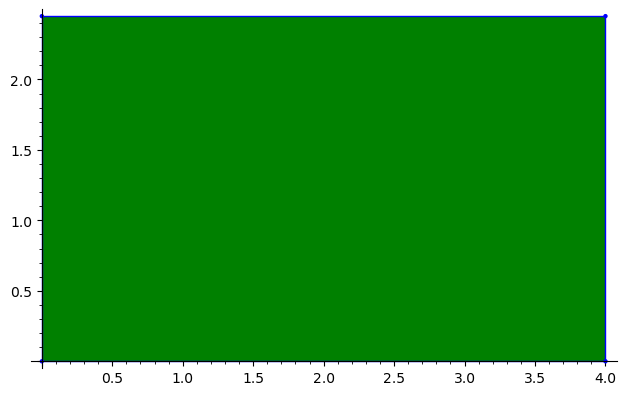

In [68]:
P.plot()

In [69]:
P.vertices()

(A vertex at (0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1),
 A vertex at (0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0),
 A vertex at (2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0),
 A vertex at (2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1))

In [86]:
d2 * vector( 1/3 * vector([0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1]) + 1/3 * vector([0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0]) + 1/3 * vector([2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0]))

(2, 2, -1, -1, -2, 2, 2, 0, -2, 3, 0, 1, 2, 2, 1)

In [103]:
vec = vector(1/3 * vector([0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2]) + 1/3 * vector([0, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0]) + 1/3 * vector([2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0]))
vec

(2/3, 4/3, 1, 1, 2/3, 4/3, 2/3, 4/3, 4/3, 4/3, 2/3, 2/3)

In [104]:
num = 0
for entry in vec:
    num = num + entry

print(num)

12


## Random simplicial complex example 2 (good example!!)

In [29]:
X = simplicial_complexes.RandomComplex(5, 2); X
X.is_pure()

True

In [30]:
X.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 2),
  (1, 3),
  (1, 4),
  (2, 3),
  (2, 4),
  (3, 4)},
 2: {(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 4),
  (1, 2, 4),
  (1, 3, 4),
  (2, 3, 4)}}

In [37]:
Y = SimplicialComplex([[0,1,2],[0,1,3],[0,1,4],[0,2,3],[0,2,4],[0,3,4],[1,2,4],[1,3,4],[2,3,4]])

In [18]:
good_labelings = []
test_simplicial_complex(Y, good_labelings)


for labeling in good_labelings:
    print("type = ", labeling[0], "Dim = ", labeling[1], "Perm = ", labeling[2], "Flow = ", labeling[3])
print("Done")

type =  2 Dim =  3 Perm =  [1, 2, 3, 4, 5] Flow =  (3, 1, -1, -3, 1, 1, 1, 1, 1, 1)
type =  2 Dim =  3 Perm =  [1, 2, 3, 4, 5] Flow =  (3, 1, -1, -3, 2, 1, 0, 1, 2, 1)
type =  2 Dim =  3 Perm =  [1, 2, 3, 4, 5] Flow =  (3, 1, -1, -3, 2, 2, -1, 1, 2, 2)
type =  2 Dim =  3 Perm =  [1, 2, 3, 4, 5] Flow =  (3, 1, -1, -3, 2, 2, -1, 2, 1, 3)
type =  2 Dim =  3 Perm =  [1, 2, 3, 5, 4] Flow =  (3, 1, -1, -3, 1, 1, 1, 1, 1, 1)
type =  2 Dim =  3 Perm =  [1, 2, 3, 5, 4] Flow =  (3, 1, -1, -3, 2, 1, 0, 2, 1, 2)
type =  2 Dim =  3 Perm =  [1, 2, 3, 5, 4] Flow =  (3, 1, -1, -3, 2, 1, 0, 3, 0, 3)
type =  2 Dim =  3 Perm =  [1, 2, 4, 3, 5] Flow =  (3, 1, -1, -3, 1, 1, 1, 1, 1, 1)
type =  2 Dim =  3 Perm =  [1, 2, 4, 3, 5] Flow =  (3, 1, -1, -3, 2, 1, 0, 1, 2, 1)
type =  2 Dim =  3 Perm =  [1, 2, 4, 3, 5] Flow =  (3, 1, -1, -3, 2, 2, -1, 1, 2, 2)
type =  2 Dim =  3 Perm =  [1, 2, 4, 3, 5] Flow =  (3, 1, -1, -3, 2, 2, -1, 2, 1, 3)
type =  2 Dim =  3 Perm =  [1, 2, 4, 5, 3] Flow =  (3, 1, -1, -3, 1, 1, 

In [17]:
Y.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 2),
  (1, 3),
  (1, 4),
  (2, 3),
  (2, 4),
  (3, 4)},
 2: {(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 4),
  (1, 2, 4),
  (1, 3, 4),
  (2, 3, 4)}}

In [18]:
d2 = boundary_matrix(Y)
d2

[ 1  1  1  0  0  0  0  0  0]
[-1  0  0  1  1  0  0  0  0]
[ 0 -1  0 -1  0  1  0  0  0]
[ 0  0 -1  0 -1 -1  0  0  0]
[ 1  0  0  0  0  0  1  0  0]
[ 0  1  0  0  0  0  0  1  0]
[ 0  0  1  0  0  0 -1 -1  0]
[ 0  0  0  1  0  0  0  0  1]
[ 0  0  0  0  1  0  1  0 -1]
[ 0  0  0  0  0  1  0  1  1]

In [38]:
P = simplicial_complex_flow_polytope(Y, [3,1,-1,-3,2,2,-1,2,1,3])
P

A 3-dimensional polyhedron in QQ^9 defined as the convex hull of 11 vertices (use the .plot() method to plot)

In [20]:
Y.betti()

{0: 1, 1: 0, 2: 3}

In [21]:
P.plot()

Graphics3d Object

In [22]:
P.vertices()

(A vertex at (0, 0, 3, 1, 0, 0, 2, 2, 1),
 A vertex at (2, 1, 0, 0, 3, 0, 0, 1, 2),
 A vertex at (2, 1, 0, 2, 1, 2, 0, 1, 0),
 A vertex at (1, 2, 0, 0, 2, 1, 1, 0, 2),
 A vertex at (2, 0, 1, 1, 2, 0, 0, 2, 1),
 A vertex at (1, 0, 2, 2, 0, 1, 1, 2, 0),
 A vertex at (1, 2, 0, 2, 0, 3, 1, 0, 0),
 A vertex at (2, 0, 1, 2, 1, 1, 0, 2, 0),
 A vertex at (0, 2, 1, 1, 0, 2, 2, 0, 1),
 A vertex at (0, 2, 1, 0, 1, 1, 2, 0, 2),
 A vertex at (0, 1, 2, 0, 1, 0, 2, 1, 2))

In [16]:
Y.facets()

{(0, 3, 4), (0, 1, 4), (2, 3, 4), (0, 2, 3), (1, 2, 4), (0, 1, 2), (0, 2, 4), (0, 1, 3), (1, 3, 4)}

In [30]:
examine_vertices(Y, True)

[(0, 1, 4), (0, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]
[(0, 1, 2), (0, 1, 3), (0, 2, 4), (1, 3, 4), (2, 3, 4)]
[(0, 1, 2), (0, 1, 3), (0, 2, 3), (0, 2, 4), (0, 3, 4), (1, 3, 4)]
[(0, 1, 2), (0, 1, 3), (0, 2, 4), (0, 3, 4), (1, 2, 4), (2, 3, 4)]
[(0, 1, 2), (0, 1, 4), (0, 2, 3), (0, 2, 4), (1, 3, 4), (2, 3, 4)]
[(0, 1, 2), (0, 1, 4), (0, 2, 3), (0, 3, 4), (1, 2, 4), (1, 3, 4)]
[(0, 1, 2), (0, 1, 3), (0, 2, 3), (0, 3, 4), (1, 2, 4)]
[(0, 1, 2), (0, 1, 4), (0, 2, 3), (0, 2, 4), (0, 3, 4), (1, 3, 4)]
[(0, 1, 3), (0, 1, 4), (0, 2, 3), (0, 3, 4), (1, 2, 4), (2, 3, 4)]
[(0, 1, 3), (0, 1, 4), (0, 2, 4), (0, 3, 4), (1, 2, 4), (2, 3, 4)]
[(0, 1, 3), (0, 1, 4), (0, 2, 4), (1, 2, 4), (1, 3, 4), (2, 3, 4)]
All vertex subcomplexes look good!


In [43]:
sum([3,1,-1,-3,2,2,-1,2,1,3])

9

## examine_vertices function

In [8]:
## function to look at example and check everything works as expected
## input: simplicial complex X, boolean show
## function will look at X and check if it's pur, look at the flow polytope it creates with the netflow vector being the sum of columns of d2.
## Then, it looks at the vertices of the polytope and checks if the associate subcomplexes have dth Betti number 0. If "show" is input as true, then
## it will print out the subcomplexes associated to each vertex

def examine_vertices(X, show):
    
    # check if input X is a pure simplicial complex
    if X.is_pure() == False:
        print("Simplicial Complex is not pure, try again")
        return

    dim = X.dimension()
    # complex_list.append(X)
    
    d2 = boundary_matrix(X)

    #find netflow vector
    length = len(list_of_sub_maximal_faces(X))
    a = [0]*length
    for col in d2.columns():
        a = vector(a) + vector(col)

    # make flow polytope
    P = simplicial_complex_flow_polytope(X, vector(a))
    if P.is_empty():
        print("Flow polytope is empty, check your netflow vector")
        return

    # look at vertices and make sure they sum to the right thing

    for vertex in P.vertices():
        if sum(vertex) != sum(a):
            print("Vertex ", vertex, "does not sum to appropriate number")
            #return

        # check vertex subcomplexes
        facets = []
        for i in range(len(vertex)):
            if vertex[i] != 0:
                facets.append((sorted(list(X.facets())))[i]) #<----- need to do some funny sorted list manipulation here to ensure facets are in lex order
        subcomplex = SimplicialComplex(facets)

        if show:
            print(facets)

        # check Betti number of vertex subcomplex
        if subcomplex.betti(dim) != 0:
            print("Vertex", vertex, "does not have Betti number 0. It is ", subcomplex.betti(dim), "instead.")
    
    print("All vertex subcomplexes look good!")

In [8]:
X = SimplicialComplex([[0,1,2],[0,1,4],[0,2,3],[1,2,3],[1,3,4],[2,3,4]])
X

Simplicial complex with vertex set (0, 1, 2, 3, 4) and 6 facets

In [59]:
P = simplicial_complex_flow_polytope(X, [2,0,-1,-1,2,0,0,3,-1,2])
P.vertices()

(A vertex at (1, 1, 1, 1, 1, 1),)

### Testing function with random simplicial complexes

In [11]:
X = simplicial_complexes.RandomComplex(5, 2);

examine_vertices(X, False)

Simplicial Complex is not pure, try again


#### investigating potential issue with conjecture - resolved

Resolved, forgot to only include facets that are supported and instead included all of them. No issue found.

In [79]:
X.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 2),
  (1, 3),
  (1, 4),
  (2, 3),
  (2, 4),
  (3, 4)},
 2: {(0, 1, 3),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 4),
  (1, 2, 3),
  (1, 3, 4),
  (2, 3, 4)}}

In [81]:
d2 = boundary_matrix(X)
d2

[ 1  0  0  0  0  0  0]
[ 0  1  1  0  0  0  0]
[-1 -1  0  1  0  0  0]
[ 0  0 -1 -1  0  0  0]
[ 0  0  0  0  1  0  0]
[ 1  0  0  0 -1  1  0]
[ 0  0  0  0  0 -1  0]
[ 0  1  0  0  1  0  1]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  1]

In [88]:
X.betti()

{0: 1, 1: 0, 2: 1}

In [82]:
P = simplicial_complex_flow_polytope(X, [1,2,-1,-2,1,1,-1,3,0,3])
P

A 1-dimensional polyhedron in QQ^7 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [83]:
P.vertices()

(A vertex at (1, 0, 2, 0, 1, 1, 2), A vertex at (1, 2, 0, 2, 1, 1, 0))

In [86]:
vert1 = SimplicialComplex([[0,1,3],[0,2,4],[1,2,3],[1,3,4],[2,3,4]])
vert1

Simplicial complex with vertex set (0, 1, 2, 3, 4) and 5 facets

In [87]:
vert1.betti()

{0: 1, 1: 1, 2: 0}

In [90]:
vert2 = SimplicialComplex([[0,1,3],[0,2,3],[0,3,4],[1,2,3],[1,3,4]])
vert2

Simplicial complex with vertex set (0, 1, 2, 3, 4) and 5 facets

In [91]:
vert2.betti()

{0: 1, 1: 0, 2: 0}

In [109]:
examine_vertices(X)

All vertex subcomplexes look good!


## Thinking about $d > 2$

### $d=3$ with 4-simplex

In [35]:
foursimplex = SimplicialComplex([[0,1,2,3],[0,1,2,4],[0,1,3,4],[0,2,3,4],[1,2,3,4]])
foursimplex.betti()

{0: 1, 1: 0, 2: 0, 3: 1}

In [38]:
foursimplex.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 2),
  (1, 3),
  (1, 4),
  (2, 3),
  (2, 4),
  (3, 4)},
 2: {(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 4),
  (1, 2, 3),
  (1, 2, 4),
  (1, 3, 4),
  (2, 3, 4)},
 3: {(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)}}

In [37]:
d3 = boundary_matrix(foursimplex)
d3

[-1 -1  0  0  0]
[ 1  0 -1  0  0]
[ 0  1  1  0  0]
[-1  0  0 -1  0]
[ 0 -1  0  1  0]
[ 0  0 -1 -1  0]
[ 1  0  0  0 -1]
[ 0  1  0  0  1]
[ 0  0  1  0 -1]
[ 0  0  0  1  1]

In [39]:
P = simplicial_complex_flow_polytope(foursimplex, [-2,0,2,-2,0,-2,0,2,0,2])
P

A 1-dimensional polyhedron in QQ^5 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [40]:
P.vertices()

(A vertex at (0, 2, 0, 2, 0), A vertex at (2, 0, 2, 0, 2))

### journal entry - 4/16/25

For $d=2$, we get sum of entries of netflow vector should always be equal to #cols since each column contributes 1-1+1 = 1. For $d=3$, each column contributes 1-1+1-1=0 so sum of entries of $a$ will always be 0. How does this impact coordinates of vertices? Also can we generalize it to all $d$?

Looks like for $d=3$, the sum of the entries of the vertices is actually **not** constant...interesting. Ends up being $x_1+4$ where $x_1$ is the first entry of the vertex.

For $d=4$, each column contributes 1 again so sum of entries of $a$ is #cols. For vertices, get that sum of entries must equal sum of entries of $a$ again. Seems like there's a parity reason: when $d$ is even, there are an odd number of $(d-1)$-faces contained in each $d$-face so the boundary matrix doesn't cancel completely. When $d$ is odd, then each column cancels itself perfectly which makes things a little more tricky since $0=0$ doesn't mean much.

### $d=4$ with 5-simplex

In [41]:
fivesimplex = SimplicialComplex([[0,1,2,3,4],[0,1,2,4,5],[0,1,3,4,5],[0,2,3,4,5],[1,2,3,4,5],[0,1,2,3,5]])
fivesimplex.betti()

{0: 1, 1: 0, 2: 0, 3: 0, 4: 1}

In [43]:
d4 = boundary_matrix(fivesimplex)
d4

[ 1  1  0  0  0  0]
[-1  0  1  0  0  0]
[ 0 -1 -1  0  0  0]
[ 1  0  0  1  0  0]
[ 0  1  0 -1  0  0]
[ 0  0  1  1  0  0]
[-1  0  0  0  1  0]
[ 0 -1  0  0 -1  0]
[ 0  0 -1  0  1  0]
[ 0  0  0 -1 -1  0]
[ 1  0  0  0  0  1]
[ 0  1  0  0  0 -1]
[ 0  0  1  0  0  1]
[ 0  0  0  1  0 -1]
[ 0  0  0  0  1  1]

In [46]:
P = simplicial_complex_flow_polytope(fivesimplex, [2,0,-2,2,0,2,0,-2,0,-2,2,0,2,0,2])
P

A 1-dimensional polyhedron in QQ^6 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [47]:
P.vertices()

(A vertex at (0, 2, 0, 2, 0, 2), A vertex at (2, 0, 2, 0, 2, 0))

In [60]:
#includes entire simplex as a face so need to define it by hand
sixsimplex = simplicial_complexes.Simplex(6)
sixsimplex.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,), (6,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 6),
  (3, 4),
  (3, 5),
  (3, 6),
  (4, 5),
  (4, 6),
  (5, 6)},
 2: {(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 1, 5),
  (0, 1, 6),
  (0, 2, 3),
  (0, 2, 4),
  (0, 2, 5),
  (0, 2, 6),
  (0, 3, 4),
  (0, 3, 5),
  (0, 3, 6),
  (0, 4, 5),
  (0, 4, 6),
  (0, 5, 6),
  (1, 2, 3),
  (1, 2, 4),
  (1, 2, 5),
  (1, 2, 6),
  (1, 3, 4),
  (1, 3, 5),
  (1, 3, 6),
  (1, 4, 5),
  (1, 4, 6),
  (1, 5, 6),
  (2, 3, 4),
  (2, 3, 5),
  (2, 3, 6),
  (2, 4, 5),
  (2, 4, 6),
  (2, 5, 6),
  (3, 4, 5),
  (3, 4, 6),
  (3, 5, 6),
  (4, 5, 6)},
 3: {(0, 1, 2, 3),
  (0, 1, 2, 4),
  (0, 1, 2, 5),
  (0, 1, 2, 6),
  (0, 1, 3, 4),
  (0, 1, 3, 5),
  (0, 1, 3, 6),
  (0, 1, 4, 5),
  (0, 1, 4, 6),
  (0, 1, 5, 6),
  (0, 2, 3, 4),
  (0, 2, 3, 5),
  (0, 2, 3, 6),
  (0, 2, 4, 5),
  (0, 2, 4, 6),
  (0, 2, 5, 6),
  (0, 3, 

In [64]:
sixsimplex = SimplicialComplex([(0, 1, 2, 3, 4, 5),
  (0, 1, 2, 3, 4, 6),
  (0, 1, 2, 3, 5, 6),
  (0, 1, 2, 4, 5, 6),
  (0, 1, 3, 4, 5, 6),
  (0, 2, 3, 4, 5, 6),
  (1, 2, 3, 4, 5, 6)])

In [58]:
sixsimplex.betti()

{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1}

In [59]:
sixsimplex.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,), (6,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 6),
  (3, 4),
  (3, 5),
  (3, 6),
  (4, 5),
  (4, 6),
  (5, 6)},
 2: {(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 1, 5),
  (0, 1, 6),
  (0, 2, 3),
  (0, 2, 4),
  (0, 2, 5),
  (0, 2, 6),
  (0, 3, 4),
  (0, 3, 5),
  (0, 3, 6),
  (0, 4, 5),
  (0, 4, 6),
  (0, 5, 6),
  (1, 2, 3),
  (1, 2, 4),
  (1, 2, 5),
  (1, 2, 6),
  (1, 3, 4),
  (1, 3, 5),
  (1, 3, 6),
  (1, 4, 5),
  (1, 4, 6),
  (1, 5, 6),
  (2, 3, 4),
  (2, 3, 5),
  (2, 3, 6),
  (2, 4, 5),
  (2, 4, 6),
  (2, 5, 6),
  (3, 4, 5),
  (3, 4, 6),
  (3, 5, 6),
  (4, 5, 6)},
 3: {(0, 1, 2, 3),
  (0, 1, 2, 4),
  (0, 1, 2, 5),
  (0, 1, 2, 6),
  (0, 1, 3, 4),
  (0, 1, 3, 5),
  (0, 1, 3, 6),
  (0, 1, 4, 5),
  (0, 1, 4, 6),
  (0, 1, 5, 6),
  (0, 2, 3, 4),
  (0, 2, 3, 5),
  (0, 2, 3, 6),
  (0, 2, 4, 5),
  (0, 2, 4, 6),
  (0, 2, 5, 6),
  (0, 3, 

In [66]:
d5 = boundary_matrix(sixsimplex)
d5.str()

'[-1 -1  0  0  0  0  0]\n[ 1  0 -1  0  0  0  0]\n[ 0  1  1  0  0  0  0]\n[-1  0  0 -1  0  0  0]\n[ 0 -1  0  1  0  0  0]\n[ 0  0 -1 -1  0  0  0]\n[ 1  0  0  0 -1  0  0]\n[ 0  1  0  0  1  0  0]\n[ 0  0  1  0 -1  0  0]\n[ 0  0  0  1  1  0  0]\n[-1  0  0  0  0 -1  0]\n[ 0 -1  0  0  0  1  0]\n[ 0  0 -1  0  0 -1  0]\n[ 0  0  0 -1  0  1  0]\n[ 0  0  0  0 -1 -1  0]\n[ 1  0  0  0  0  0 -1]\n[ 0  1  0  0  0  0  1]\n[ 0  0  1  0  0  0 -1]\n[ 0  0  0  1  0  0  1]\n[ 0  0  0  0  1  0 -1]\n[ 0  0  0  0  0  1  1]'

In [70]:
examine_vertices(sixsimplex, True)

Vertex  A vertex at (0, 2, 0, 2, 0, 2, 0) does not sum to appropriate number
[(0, 1, 2, 3, 4, 6), (0, 1, 2, 4, 5, 6), (0, 2, 3, 4, 5, 6)]
Vertex  A vertex at (2, 0, 2, 0, 2, 0, 2) does not sum to appropriate number
[(0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 5, 6), (0, 1, 3, 4, 5, 6), (1, 2, 3, 4, 5, 6)]
All vertex subcomplexes look good!


In [75]:
length = len(list_of_sub_maximal_faces(sixsimplex))
a = [0]*length
for col in d5.columns():
    a = vector(a) + vector(col)
print(a)

(-2, 0, 2, -2, 0, -2, 0, 2, 0, 2, -2, 0, -2, 0, -2, 0, 2, 0, 2, 0, 2)


In [76]:
num = 0
for row in d5.rows():
    for entry in row:
        num = num + entry
        print(num)

print("num = ", num)

-1
-2
-2
-2
-2
-2
-2
-1
-1
-2
-2
-2
-2
-2
-2
-1
0
0
0
0
0
-1
-1
-1
-2
-2
-2
-2
-2
-3
-3
-2
-2
-2
-2
-2
-2
-3
-4
-4
-4
-4
-3
-3
-3
-3
-4
-4
-4
-4
-3
-3
-3
-2
-2
-2
-2
-2
-1
-1
-2
-2
-2
-2
-2
-2
-1
0
0
0
-1
-1
-1
-1
-1
-2
-2
-2
-3
-3
-3
-3
-2
-2
-2
-2
-3
-3
-3
-4
-4
-4
-4
-4
-5
-5
-4
-4
-4
-4
-4
-4
-5
-6
-6
-5
-5
-5
-5
-5
-5
-6
-6
-5
-5
-5
-5
-5
-4
-4
-4
-3
-3
-3
-3
-4
-4
-4
-4
-3
-3
-3
-2
-2
-2
-2
-2
-1
-1
-2
-2
-2
-2
-2
-2
-1
0
num =  0


In [78]:
P = simplicial_complex_flow_polytope(sixsimplex, [-2, 0, 2, -2, 0, -2, 0, 2, 0, 2, -2, 0, -2, 0, -2, 0, 2, 0, 2, 0, 2])
P

A 1-dimensional polyhedron in QQ^7 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [79]:
P.vertices()

(A vertex at (0, 2, 0, 2, 0, 2, 0), A vertex at (2, 0, 2, 0, 2, 0, 2))

### $d=3$ with non-simplex example

Looking at an example of $d=3$ but not a simplex to see if pattern of sum of entries of vertices is $x_1 + d+1$ holds. Looks like it's different...

In [12]:
while(not X.is_pure()):
    X = simplicial_complexes.RandomComplex(6, 3)
print("done")

done


In [13]:
X.is_pure()

True

In [14]:
X.facets()

{(0, 2, 4, 5), (1, 3, 4, 5), (0, 1, 3, 5), (0, 2, 3, 4), (0, 2, 3, 5), (2, 3, 4, 5), (0, 3, 4, 5), (0, 1, 2, 3), (1, 2, 3, 4), (1, 2, 4, 5), (0, 1, 4, 5)}

In [15]:
d3 = boundary_matrix(X)
d3

20 x 11 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [20]:
length = len(list_of_sub_maximal_faces(X))
a = [0]*length
for col in d3.columns():
    a = vector(a) + vector(col)
print(a)
print(sum(a))

(-1, 0, -1, 2, -3, 0, 2, -2, -1, -3, 0, 0, 1, -2, 2, -1, 1, 2, 1, 3)
0


In [17]:
P = simplicial_complex_flow_polytope(X,a)
P

A 1-dimensional polyhedron in QQ^11 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [18]:
X.betti()

{0: 1, 1: 0, 2: 0, 3: 1}

In [19]:
P.vertices()

(A vertex at (1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0),
 A vertex at (1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2))

#### another example

In [128]:
X = simplicial_complexes.RandomComplex(6, 3)
X.is_pure()

True

In [130]:
X.facets()

{(0, 2, 4, 5), (1, 3, 4, 5), (0, 1, 3, 5), (2, 3, 4, 5), (0, 3, 4, 5), (0, 1, 2, 3), (0, 1, 3, 4), (0, 1, 2, 4), (0, 1, 2, 5), (1, 2, 4, 5), (0, 1, 4, 5)}

In [138]:
a = netflow_vector(X)
a

(-3, -1, 1, 3, -1, -2, 0, -2, 0, -3, 1, 0, 2, 0, 2, -1, -1, 1, 1, 3)

In [133]:
X.betti()

{0: 1, 1: 0, 2: 1, 3: 2}

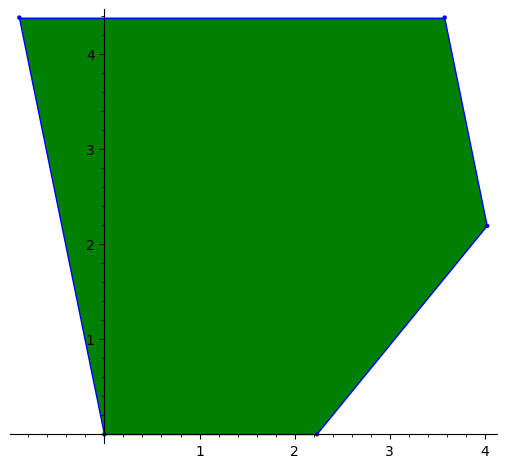

In [134]:
P = simplicial_complex_flow_polytope(X,a)
P.plot()

In [136]:
for vert in P.vertices():
    print(sum(vert))

11
10
11
10
13


In [152]:
subcomplexes(X)

[{0, 2, 10, 4},
 {0, 9, 2, 10},
 {0, 8, 10, 4},
 {0, 1, 2, 4, 10},
 {0, 1, 2, 9, 10},
 {0, 1, 4, 8, 10},
 {0, 2, 3, 4, 10},
 {0, 2, 3, 9, 10},
 {0, 2, 4, 5, 10},
 {0, 2, 4, 6, 10},
 {0, 2, 4, 7, 10},
 {0, 2, 4, 8, 10},
 {0, 2, 4, 9, 10},
 {0, 2, 5, 9, 10},
 {0, 2, 6, 9, 10},
 {0, 2, 7, 9, 10},
 {0, 2, 8, 9, 10},
 {0, 3, 4, 8, 10},
 {0, 4, 5, 8, 10},
 {0, 4, 6, 8, 10},
 {0, 4, 7, 8, 10},
 {0, 4, 8, 9, 10},
 {0, 5, 8, 9, 10},
 {0, 1, 2, 3, 4, 10},
 {0, 1, 2, 3, 9, 10},
 {0, 1, 2, 4, 5, 10},
 {0, 1, 2, 4, 6, 10},
 {0, 1, 2, 4, 7, 10},
 {0, 1, 2, 4, 8, 10},
 {0, 1, 2, 4, 9, 10},
 {0, 1, 2, 5, 9, 10},
 {0, 1, 2, 6, 9, 10},
 {0, 1, 2, 7, 9, 10},
 {0, 1, 2, 8, 9, 10},
 {0, 1, 3, 4, 8, 10},
 {0, 1, 4, 5, 8, 10},
 {0, 1, 4, 6, 8, 10},
 {0, 1, 4, 7, 8, 10},
 {0, 1, 4, 8, 9, 10},
 {0, 1, 5, 8, 9, 10},
 {0, 2, 3, 4, 5, 10},
 {0, 2, 3, 4, 6, 10},
 {0, 2, 3, 4, 7, 10},
 {0, 2, 3, 4, 8, 10},
 {0, 2, 3, 4, 9, 10},
 {0, 2, 3, 5, 9, 10},
 {0, 2, 3, 6, 9, 10},
 {0, 2, 3, 7, 9, 10},
 {0, 2, 3, 8, 9, 10},


In [139]:
P.vertices()

(A vertex at (1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1),
 A vertex at (1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1),
 A vertex at (1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1),
 A vertex at (1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1),
 A vertex at (1, 2, 0, 2, 0, 3, 0, 0, 2, 2, 1))

In [140]:
bd = boundary_matrix(X)
bd

20 x 11 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [37]:
def examine_vertices_2(X):
    P = simplicial_complex_flow_polytope(X, netflow_vector(X))
    
    for vert in P.vertices():
        facets = []
        indices = []
        for i in range(len(vert)):
            if vert[i] != 0:
                facets.append((sorted(list(X.facets())))[i])  #<-- need to do some funny sorted list manipulation here to ensure facets are in lex order
                indices.append(i)
        subcomplex = SimplicialComplex(facets)
        print(indices)
        print(subcomplex.betti())
        print(contains_source(X,indices))
    print(P.vertices())


In [9]:
    Z = simplicial_complexes.RandomComplex(6, 3)


In [10]:
while not Z.is_pure():
    Z = simplicial_complexes.RandomComplex(7, 3)
    Z.is_pure()

In [187]:
Y.facets()

{(0, 2, 4, 5), (1, 3, 4, 5), (0, 1, 3, 5), (0, 2, 3, 4), (0, 2, 3, 5), (0, 1, 2, 3), (1, 2, 3, 4), (0, 1, 2, 4), (0, 1, 2, 5)}

In [189]:
Y.betti()

{0: 1, 1: 0, 2: 1, 3: 0}

In [191]:
examine_vertices_2(Y)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
{0: 1, 1: 0, 2: 1, 3: 0}
True
(A vertex at (1, 1, 1, 1, 1, 1, 1, 1, 1),)


In [194]:
X.betti()

{0: 1, 1: 0, 2: 2, 3: 1}

In [195]:
examine_vertices_2(X)

[0, 2, 4, 5, 6, 8]
{0: 1, 1: 0, 2: 2, 3: 0}
True
[0, 1, 3, 4, 5, 7, 8]
{0: 1, 1: 0, 2: 3, 3: 0}
True
(A vertex at (1, 0, 2, 0, 1, 1, 2, 0, 1), A vertex at (1, 2, 0, 2, 1, 1, 0, 2, 1))


In [38]:
Z.betti()

{0: 1, 1: 0, 2: 1, 3: 3}

In [19]:
examine_vertices_2(Z)

[1, 2, 5, 6, 7, 8, 9, 10, 12, 16, 18, 19, 20, 21]
{0: 1, 1: 0, 2: 5, 3: 0}
True
[1, 2, 5, 6, 7, 8, 9, 10, 11, 14, 16, 18, 19, 20]
{0: 1, 1: 0, 2: 4, 3: 0}
True
[1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 18, 19, 20]
{0: 1, 1: 0, 2: 3, 3: 0}
True
[1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 16, 18, 19, 20, 21]
{0: 1, 1: 0, 2: 4, 3: 0}
True
[0, 2, 4, 5, 6, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21]
{0: 1, 1: 0, 2: 3, 3: 0}
True
[0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 19, 20]
{0: 1, 1: 0, 2: 2, 3: 0}
True
[0, 1, 3, 4, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 20]
{0: 1, 1: 0, 2: 2, 3: 0}
True
[0, 2, 4, 5, 6, 8, 9, 10, 12, 15, 16, 17, 18, 19, 20, 21]
{0: 1, 1: 0, 2: 4, 3: 0}
True
[0, 2, 3, 4, 6, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21]
{0: 1, 1: 0, 2: 3, 3: 0}
True
[0, 1, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21]
{0: 1, 1: 0, 2: 2, 3: 0}
True
[0, 2, 3, 4, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21]
{0: 1, 1: 0, 2: 2, 3: 0}
True
(A vertex at (0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 

In [ ]:
subcomplexes(Z)

{}
{0}
{1}
{2}
{3}
{4}
{5}
{6}
{7}
{8}
{9}
{10}
{11}
{12}
{13}
{14}
{15}
{16}
{17}
{18}
{19}
{20}
{21}
{0, 1}
{0, 2}
{0, 3}
{0, 4}
{0, 5}
{0, 6}
{0, 7}
{0, 8}
{0, 9}
{0, 10}
{0, 11}
{0, 12}
{0, 13}
{0, 14}
{0, 15}
{0, 16}
{0, 17}
{0, 18}
{0, 19}
{0, 20}
{0, 21}
{1, 2}
{1, 3}
{1, 4}
{1, 5}
{1, 6}
{1, 7}
{8, 1}
{1, 9}
{1, 10}
{1, 11}
{1, 12}
{1, 13}
{1, 14}
{1, 15}
{16, 1}
{1, 17}
{1, 18}
{1, 19}
{1, 20}
{1, 21}
{2, 3}
{2, 4}
{2, 5}
{2, 6}
{2, 7}
{8, 2}
{9, 2}
{2, 10}
{2, 11}
{2, 12}
{2, 13}
{2, 14}
{2, 15}
{16, 2}
{17, 2}
{2, 18}
{2, 19}
{2, 20}
{2, 21}
{3, 4}
{3, 5}
{3, 6}
{3, 7}
{8, 3}
{9, 3}
{10, 3}
{11, 3}
{3, 12}
{3, 13}
{3, 14}
{3, 15}
{16, 3}
{17, 3}
{18, 3}
{19, 3}
{3, 20}
{3, 21}
{4, 5}
{4, 6}
{4, 7}
{8, 4}
{9, 4}
{10, 4}
{11, 4}
{4, 12}
{4, 13}
{4, 14}
{4, 15}
{16, 4}
{17, 4}
{18, 4}
{19, 4}
{4, 20}
{4, 21}
{5, 6}
{5, 7}
{8, 5}
{9, 5}
{10, 5}
{11, 5}
{12, 5}
{13, 5}
{5, 14}
{5, 15}
{16, 5}
{17, 5}
{18, 5}
{19, 5}
{20, 5}
{21, 5}
{6, 7}
{8, 6}
{9, 6}
{10, 6}
{11, 6}
{12, 6}
{13

In [21]:
Z.facets()

{(0, 2, 4, 5), (0, 1, 5, 6), (0, 2, 4, 6), (0, 2, 3, 6), (1, 2, 3, 4), (0, 3, 4, 6), (0, 1, 3, 4), (1, 3, 4, 6), (0, 1, 2, 5), (0, 1, 3, 6), (1, 3, 4, 5), (0, 2, 3, 4), (0, 2, 5, 6), (0, 2, 3, 5), (0, 4, 5, 6), (2, 4, 5, 6), (0, 1, 2, 3), (0, 1, 4, 6), (1, 3, 5, 6), (1, 2, 4, 5), (1, 2, 3, 6), (0, 1, 4, 5)}

In [39]:
P = simplicial_complex_flow_polytope(Z, netflow_vector(Z))
P.plot()

Graphics3d Object

In [65]:
A = simplicial_complexes.RandomComplex(6, 2)
A.is_pure()

True

In [66]:
find_vertices(A)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

## new example to see if we can deduce polytope

In [90]:
tripyramid = SimplicialComplex([[0,1,2],[0,1,3],[0,1,5],[0,2,3],[0,2,5],[1,2,3],[1,2,4],[1,2,5],[1,3,4],[2,3,4]])
tripyramid

Simplicial complex with vertex set (0, 1, 2, 3, 4, 5) and 10 facets

In [24]:
tripyramid.betti()

{0: 1, 1: 0, 2: 3}

In [92]:
d2 = boundary_matrix(tripyramid)
d2

[ 1  1  1  0  0  0  0  0  0  0]
[-1  0  0  1  1  0  0  0  0  0]
[ 0 -1  0 -1  0  0  0  0  0  0]
[ 0  0 -1  0 -1  0  0  0  0  0]
[ 1  0  0  0  0  1  1  1  0  0]
[ 0  1  0  0  0 -1  0  0  1  0]
[ 0  0  0  0  0  0 -1  0 -1  0]
[ 0  0  1  0  0  0  0 -1  0  0]
[ 0  0  0  1  0  1  0  0  0  1]
[ 0  0  0  0  0  0  1  0  0 -1]
[ 0  0  0  0  1  0  0  1  0  0]
[ 0  0  0  0  0  0  0  0  1  1]

In [93]:
length = len(list_of_sub_maximal_faces(tripyramid))
a = [0]*length
for col in d2.columns():
    a = vector(a) + vector(col)
print(a)
print(sum(a))

(3, 1, -2, -2, 4, 1, -2, 0, 3, 0, 2, 2)
10


In [32]:
tripyramid.faces()[1]

{(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4)}

In [30]:
facets = sorted(list(tripyramid.facets()))
facets

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 5),
 (0, 2, 3),
 (0, 2, 5),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (2, 3, 4)]

In [ ]:
 for s in Subsets([0,1,2,3,4,5,6,7,8], 5):    

In [94]:
P = simplicial_complex_flow_polytope(tripyramid, a)
P

A 3-dimensional polyhedron in QQ^10 defined as the convex hull of 11 vertices (use the .plot() method to plot)

In [57]:
Q = Polyhedron((P.faces(1))[2])

In [36]:
#call to see which vertices are contained in a face of given degree
[f.ambient_V_indices() for f in P.faces(2)]

[(0, 1, 2, 10),
 (3, 6, 7, 8, 9),
 (1, 2, 3, 5, 7),
 (0, 1, 4, 5),
 (0, 4, 6, 8),
 (2, 3, 9, 10),
 (4, 5, 6, 7),
 (0, 8, 9, 10)]

### bipyramid again

In [79]:
list_of_sub_maximal_faces(bipyramid_wedge)

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4)]

In [80]:
bipyramid_wedge.facets()

{(0, 2, 4), (0, 1, 4), (0, 2, 3), (1, 2, 4), (0, 1, 2), (1, 2, 3), (0, 1, 3)}

In [76]:
#all weak compositions that sum to 2 with 3 parts (composition function doesn't allow 0's)
list(IntegerVectors(2, 3))

[[2, 0, 0], [1, 1, 0], [1, 0, 1], [0, 2, 0], [0, 1, 1], [0, 0, 2]]

In [57]:
X = SimplicialComplex([[0,1,2],[0,1,3],[0,2,3],[1,2,3]])
 

In [14]:
d2 = boundary_matrix(X)
rows = d2.rows()

neg_rows = []

for i in range(len(d2.rows())):
    for entry in d2.rows()[i]:
        if entry<0:
            neg_rows.append(i)
            break

all_rows = list(range(0, len(d2.rows())))

pos_rows = [x for x in all_rows if x not in neg_rows]

#d2[[0,2],[0,2]]

#d2.delete_rows(neg_rows)

# for row in rows:
#     print("row:", row)
#     for entry in row:
#         print("entry", entry)
#         if entry < 0:
#             rows.remove(row)
#             print(rows)
#             break
# print(rows)

print(sorted(list(X.faces()[1])))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


In [93]:
d2

[ 1  1  0  0]
[-1  0  1  0]
[ 0 -1 -1  0]
[ 1  0  0  1]
[ 0  1  0 -1]
[ 0  0  1  1]

In [20]:
length = len(list_of_sub_maximal_faces(X))
a = [0]*length
for col in d2.columns():
    a = vector(a) + vector(col)
print(a)
print(sum(a))

(2, 0, -2, 2, 0, 2)
4


In [21]:
P = simplicial_complex_flow_polytope(X, a)
P

A 1-dimensional polyhedron in QQ^4 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [25]:
[f.ambient_V_indices() for f in P.faces(1)]

[(0, 1)]

### contains_source and find_vertices functions

In [64]:
contains_source(X, [0])

False

In [68]:
# v = [1,2,3]
# X = Set(v)
# X
# # v.append(5)
# # X
# # 5 in X

X.facets()

{(1, 2, 3), (0, 1, 3), (0, 2, 3), (0, 1, 2)}

In [40]:
sorted(list(X.facets()))

[(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]

In [52]:
contains_sink(bipyramid_wedge, [1,2])

True

In [25]:
# check if a subcomplex contains the sink
#input: Simplicial complex X, Y list of facet indices in a subcomplex
#output: True if Y contains sink, False if not

def contains_sink(X, Y):
    d2 = boundary_matrix(X)
    dim = X.dimension()

    #first, find row indices associated with source
    rows = d2.rows()

    pos_rows = []

    for i in range(len(d2.rows())):
        for entry in d2.rows()[i]:
            if entry>0:
                pos_rows.append(i)
                break

    all_rows = list(range(0, len(d2.rows())))
    neg_rows = [x for x in all_rows if x not in pos_rows]

    #now, look at edges associated to those source rows
    submax = sorted(list(X.faces()[dim - 1]))

    sink = []
    for entry in neg_rows:
        sink.append(submax[entry])

    # make list of facets from given Y
    facets = []
    for entry in Y:
        facets.append(sorted(list(X.facets()))[entry])
    
    # look at facets of subcomplex and see if submax faces in source are all contained in them
    flag = False
    flags = []
    
    for face in sink:
        for facet in facets:
            intersection = Set(face).intersection(Set(facet))
            if intersection.cardinality() == Set(face).cardinality():
                flag = True
                break
            
        flags.append(flag)
        flag = False

    # return True or False based on if source is contained in Y
    for entry in flags:
        if entry == False:
            return False

    return True                

In [26]:
# check if a subcomplex contains the source
#input: Simplicial complex X, Y list of facet indices in a subcomplex
#output: True if Y contains source, False if not

def contains_source(X, Y):
    d2 = boundary_matrix(X)
    dim = X.dimension()

    #first, find row indices associated with source
    rows = d2.rows()

    neg_rows = []

    for i in range(len(d2.rows())):
        for entry in d2.rows()[i]:
            if entry<0:
                neg_rows.append(i)
                break

    all_rows = list(range(0, len(d2.rows())))
    pos_rows = [x for x in all_rows if x not in neg_rows]

    #now, look at edges associated to those source rows
    submax = sorted(list(X.faces()[dim - 1]))

    source = []
    for entry in pos_rows:
        source.append(submax[entry])

    # make list of facets from given Y
    facets = []
    for entry in Y:
        facets.append(sorted(list(X.facets()))[entry])
    
    # look at facets of subcomplex and see if submax faces in source are all contained in them
    flag = False
    flags = []
    
    for face in source:
        for facet in facets:
            intersection = Set(face).intersection(Set(facet))
            if intersection.cardinality() == Set(face).cardinality():
                flag = True
                break
            
        flags.append(flag)
        flag = False

    # return True or False based on if source is contained in Y
    for entry in flags:
        if entry == False:
            return False

    return True                

In [27]:
#input: simplicial complex
#output: list of suspected vertices of that complex's flow polytope
#finds the subcomplexes of X that have the appropriate Betti numbers, solve the linear system, and contain the source
#relies on contains_source() function above

def find_vertices(X):
    vertex_subcomplexes = []
    vertices = []
    
    dim = X.dimension()
    
    d2 = boundary_matrix(X)

    #find netflow vector
    length = len(list_of_sub_maximal_faces(X))
    a = [0]*length
    for col in d2.columns():
        a = vector(a) + vector(col)

    # #dif netflow vector
    # a = a - d2.columns()[-1]
    # a = a- d2.columns()[-2]

    
    #build subcomplexes

    length = len(X.facets())

    # all possible weak compositions that sum to the #cols
    for comp in list(IntegerVectors(sum(a),length)):
        facets = []
        indices = []

        #build subcomplex based on the nonzero entries of the weak composition
        for i in range(length):
            if comp[i] != 0:
                facets.append((sorted(list(X.facets())))[i])  #<-- need to do some funny sorted list manipulation here to ensure facets are in lex order
                indices.append(i)
        subcomplex = SimplicialComplex(facets)

        #check if the subcomplex properly solves the linear system, has dth Betti number = 0, and contains the source
        if d2 * vector(comp) == a:
            if subcomplex.betti(dim) == 0:
                if contains_source(X, indices):
                    if contains_sink(X, indices):
                        vertex_subcomplexes.append(subcomplex)
                        vertices.append(comp)
                    
    return vertices  #, vertex_subcomplexes #<---------- can return the subcomplexes too if desired

In [106]:
find_vertices(bipyramid_wedge)

[[3, 0, 0, 2, 2, 0, 0],
 [1, 2, 0, 0, 2, 2, 0],
 [1, 0, 2, 2, 0, 0, 2],
 [0, 2, 1, 0, 1, 2, 1],
 [0, 1, 2, 1, 0, 1, 2]]

In [97]:
vertices = find_vertices(tripyramid)

In [95]:
P

A 3-dimensional polyhedron in QQ^10 defined as the convex hull of 11 vertices (use the .plot() method to plot)

In [96]:
P.plot()

Graphics3d Object

In [118]:
sorted(list(vertices[10].facets()))

[(0, 1, 3), (0, 1, 5), (0, 2, 3), (1, 2, 4), (1, 2, 5), (2, 3, 4)]

In [107]:
sorted(list(tripyramid.facets()))

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 5),
 (0, 2, 3),
 (0, 2, 5),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (2, 3, 4)]

In [104]:
P.vertices()

(A vertex at (0, 1, 2, 1, 0, 0, 2, 2, 0, 2),
 A vertex at (2, 1, 0, 1, 2, 0, 2, 0, 0, 2),
 A vertex at (1, 2, 0, 0, 2, 1, 2, 0, 0, 2),
 A vertex at (1, 2, 0, 0, 2, 3, 0, 0, 2, 0),
 A vertex at (1, 0, 2, 2, 0, 0, 1, 2, 1, 1),
 A vertex at (3, 0, 0, 2, 2, 0, 1, 0, 1, 1),
 A vertex at (1, 0, 2, 2, 0, 1, 0, 2, 2, 0),
 A vertex at (3, 0, 0, 2, 2, 1, 0, 0, 2, 0),
 A vertex at (0, 1, 2, 1, 0, 2, 0, 2, 2, 0),
 A vertex at (0, 2, 1, 0, 1, 3, 0, 1, 2, 0),
 A vertex at (0, 2, 1, 0, 1, 1, 2, 1, 0, 2))

### journal entry 4/18/25

It works for the tripyramid! Looks like I successfully deduced the vertices of the 3-dimensional flow polytope of the tripyramid using the find_vertices() function. This function looks for subcomplexes of the original simplicial complex that have the appropriate Betti number, solve the linear system, and contain the source. At least at this scale, that's enough information to exactly find the vertices -- there are no other subcomplexes that satisfy those conditions that are not vertices. I'm going to try some random complexes now to see if it still seems to work

In [128]:
while(not X.is_pure()):
    X = simplicial_complexes.RandomComplex(6, 3)
print("done")

done


In [140]:
Y = SimplicialComplex([[0,1,2],[0,1,3],[0,1,4],[0,2,3],[0,2,4],[0,3,4],[1,2,4],[1,3,4],[2,3,4]])
find_vertices(Y)

[[2, 1, 0, 2, 1, 2, 0, 1, 0],
 [2, 1, 0, 0, 3, 0, 0, 1, 2],
 [2, 0, 1, 2, 1, 1, 0, 2, 0],
 [2, 0, 1, 1, 2, 0, 0, 2, 1],
 [1, 2, 0, 2, 0, 3, 1, 0, 0],
 [1, 2, 0, 0, 2, 1, 1, 0, 2],
 [1, 0, 2, 2, 0, 1, 1, 2, 0],
 [0, 2, 1, 1, 0, 2, 2, 0, 1],
 [0, 2, 1, 0, 1, 1, 2, 0, 2],
 [0, 1, 2, 0, 1, 0, 2, 1, 2],
 [0, 0, 3, 1, 0, 0, 2, 2, 1]]

In [125]:
d2 = boundary_matrix(Y)
d2

[ 1  1  1  0  0  0  0  0  0]
[-1  0  0  1  1  0  0  0  0]
[ 0 -1  0 -1  0  1  0  0  0]
[ 0  0 -1  0 -1 -1  0  0  0]
[ 1  0  0  0  0  0  1  0  0]
[ 0  1  0  0  0  0  0  1  0]
[ 0  0  1  0  0  0 -1 -1  0]
[ 0  0  0  1  0  0  0  0  1]
[ 0  0  0  0  1  0  1  0 -1]
[ 0  0  0  0  0  1  0  1  1]

In [137]:
P = simplicial_complex_flow_polytope(Y, [3,1,-1,-3,2,2,-1,2,1,3])
P.vertices()

(A vertex at (0, 0, 3, 1, 0, 0, 2, 2, 1),
 A vertex at (2, 1, 0, 0, 3, 0, 0, 1, 2),
 A vertex at (2, 1, 0, 2, 1, 2, 0, 1, 0),
 A vertex at (1, 2, 0, 0, 2, 1, 1, 0, 2),
 A vertex at (2, 0, 1, 1, 2, 0, 0, 2, 1),
 A vertex at (1, 0, 2, 2, 0, 1, 1, 2, 0),
 A vertex at (1, 2, 0, 2, 0, 3, 1, 0, 0),
 A vertex at (2, 0, 1, 2, 1, 1, 0, 2, 0),
 A vertex at (0, 2, 1, 1, 0, 2, 2, 0, 1),
 A vertex at (0, 2, 1, 0, 1, 1, 2, 0, 2),
 A vertex at (0, 1, 2, 0, 1, 0, 2, 1, 2))

In [129]:
find_vertices(X)

[Simplicial complex with vertex set (0, 1, 2, 3) and facets {(0, 1, 2), (0, 2, 3)},
 Simplicial complex with vertex set (0, 1, 2, 3) and facets {(0, 1, 3), (1, 2, 3)}]

In [131]:
d2 = boundary_matrix(X)
d2

[ 1  1  0  0]
[-1  0  1  0]
[ 0 -1 -1  0]
[ 1  0  0  1]
[ 0  1  0 -1]
[ 0  0  1  1]

In [149]:
P = simplicial_complex_flow_polytope(X, [2,0,-2,2,0,2])
P

A 1-dimensional polyhedron in QQ^4 defined as the convex hull of 2 vertices (use the .plot() method to plot)

In [173]:
P.vertices()[0][0:4]

(0, 2, 0, 2)

In [177]:
len(X.facets())

4

#### compare_polytopes() function

In [12]:
#input: simplicial complex X
#output: True if predicted flow polytope vertices and actual flow polytope vertices are same, False if not
#relies on find_vertices()

def compare_polytopes(X):
    d2 = boundary_matrix(X)

    #find netflow vector
    length = len(list_of_sub_maximal_faces(X))
    a = [0]*length
    for col in d2.columns():
        a = vector(a) + vector(col)

    #find actual flow polytope and its vertices
    P = simplicial_complex_flow_polytope(X, a)

    num_facets = len(X.facets())
    
    actual = []

    for entry in range(len(P.vertices())):
        actual.append(list(P.vertices()[entry][0:num_facets]))

    #use find_vertices to guess vertices
    guess = find_vertices(X)

    #sort both lists
    guess = sorted(guess)
    actual = sorted(actual)

    print("guess", guess)
    print('actual', actual)

    #compare actual and guess -- this is a little convoluted because the types of the entries are not the same and can't be compared cleanly
    for entry in range(len(actual)):
        if list(actual[entry]) != list(guess[entry]):
            print(actual[entry], guess[entry])
            return False
    
    return True    

In [13]:
bipyramid_wedge = SimplicialComplex([[0,1,2],[0,1,3],[0,1,4],[0,2,4],[0,2,3],[1,2,4],[1,2,3]])

In [14]:
compare_polytopes(bipyramid_wedge)

True

In [215]:
compare_polytopes(tripyramid)

True

#### comparing random simplicial complexes

In [252]:
bd = boundary_matrix(X)
bd

210 x 129 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [253]:
X.facets()

{(0, 1, 4, 5, 6), (1, 3, 4, 7, 8), (3, 4, 5, 6, 7), (0, 1, 4, 7, 8), (0, 3, 4, 8, 9), (2, 3, 4, 7, 8), (1, 2, 4, 5, 6), (0, 2, 3, 5, 7), (1, 2, 4, 7, 9), (1, 3, 5, 7, 8), (0, 2, 3, 6, 9), (1, 2, 6, 7, 9), (0, 2, 3, 7, 9), (2, 5, 7, 8, 9), (0, 3, 4, 7, 8), (1, 2, 3, 8, 9), (0, 5, 6, 7, 8), (2, 3, 5, 6, 9), (0, 2, 7, 8, 9), (1, 2, 5, 6, 7), (0, 2, 5, 6, 8), (0, 1, 6, 7, 9), (0, 2, 6, 7, 8), (1, 2, 4, 5, 8), (0, 3, 5, 7, 9), (1, 3, 4, 5, 7), (3, 4, 6, 7, 8), (2, 4, 7, 8, 9), (0, 3, 4, 5, 8), (1, 4, 5, 7, 8), (1, 2, 4, 8, 9), (2, 4, 5, 6, 9), (1, 2, 4, 5, 9), (0, 3, 4, 6, 7), (2, 5, 6, 7, 8), (0, 3, 6, 8, 9), (0, 1, 2, 5, 6), (1, 6, 7, 8, 9), (1, 3, 4, 5, 9), (3, 4, 6, 8, 9), (1, 2, 3, 4, 6), (2, 4, 6, 7, 9), (0, 3, 5, 6, 7), (1, 2, 3, 5, 9), (0, 1, 3, 5, 7), (0, 3, 6, 7, 8), (2, 4, 5, 6, 7), (0, 2, 3, 4, 8), (1, 4, 6, 7, 9), (1, 2, 3, 6, 8), (1, 3, 4, 6, 9), (0, 2, 4, 7, 8), (1, 2, 3, 4, 8), (0, 2, 3, 5, 9), (0, 1, 3, 4, 7), (2, 3, 4, 6, 9), (0, 1, 3, 8, 9), (0, 3, 5, 6, 9), (1, 2, 3, 5, 

In [32]:
X = SimplicialComplex([(0, 3, 4), (0, 1, 4), (2, 3, 4), (0, 2, 3), (1, 2), (1, 3)])

In [259]:
X.facets()

{(1, 4, 5, 6), (2, 3, 5, 6), (1, 3, 6, 7), (0, 3, 4, 5), (0, 2, 3, 6), (1, 2, 3, 7), (0, 3, 4, 7), (1, 3, 4, 6), (1, 3, 5, 7), (0, 2, 3, 4), (0, 2, 5, 6), (1, 2, 5, 7), (0, 4, 5, 6), (1, 4, 5, 7), (2, 4, 5, 6), (0, 1, 6, 7), (0, 1, 3, 7), (1, 2, 4, 6), (1, 3, 5, 6), (0, 1, 4, 5), (2, 4, 5, 7), (3, 5, 6, 7), (0, 1, 5, 6), (2, 3, 4, 5), (1, 2, 3, 4), (0, 1, 3, 4), (2, 3, 5, 7), (3, 4, 6, 7), (2, 5, 6, 7), (2, 3, 4, 7), (0, 1, 3, 6), (1, 3, 4, 5), (0, 2, 5, 7), (1, 2, 5, 6), (1, 2, 3, 5), (0, 1, 2, 7), (0, 1, 2, 3), (0, 1, 4, 6), (1, 4, 6, 7), (2, 4, 6, 7), (0, 4, 6, 7), (0, 2, 3, 7)}

In [260]:
find_vertices(X)

[]

In [262]:
X.betti()

{0: 1, 1: 0, 2: 0, 3: 7}

In [267]:
X.is_pure()

True

In [268]:
bd = boundary_matrix(X)
bd

length = len(list_of_sub_maximal_faces(X))
    a = [0]*length
    for col in d2.columns():
        a = vector(a) + vector(col)

56 x 42 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [270]:
P = simplicial_complex_flow_polytope(X, netflow_vector(X))
P

A 7-dimensional polyhedron in QQ^42 defined as the convex hull of 240 vertices (use the .plot() method to plot)

In [19]:
X = SimplicialComplex([(0, 3, 4), (0, 1, 4), (2, 3, 4), (0, 2, 3), (1, 2), (1, 3)])

In [70]:
while(not X.is_pure()):
    X = simplicial_complexes.RandomComplex(6, 2)
print("done")

print(X)
print(X.dimension())

compare_polytopes(X)

done
Random 2-dimensional simplicial complex on 6 vertices
2
guess [[0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1], [2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1]]
actual [[0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1], [2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1]]


True

In [56]:
compare_polytopes(X)

guess [[1, 1, 1]]
actual [[1, 1, 1]]


True

In [55]:
X = simplicial_complexes.RandomComplex(4, 2)
X.facets()

{(1, 2, 3), (0, 2, 3), (0, 1, 2)}

In [52]:
X.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,)},
 1: {(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)}}

In [244]:
X = simplicial_complexes.RandomComplex(5, 2)
X.is_pure()

False

In [47]:
X.facets()

{(2, 3), (1, 2), (0, 3), (0, 1), (0, 2), (1, 3)}

In [247]:
Y = SimplicialComplex([(0, 3, 4), (0, 1, 4), (2, 3, 4), (0, 2, 3), (1, 2), (1, 3)])

In [248]:
Y

Simplicial complex with vertex set (0, 1, 2, 3, 4) and 6 facets

In [249]:
Y.facets()

{(0, 3, 4), (0, 1, 4), (2, 3, 4), (0, 2, 3), (1, 2), (1, 3)}

#### thoughts on comparing

It seems like the comparing_polytopes() function returns true as long as
- $d$ is even
- the complex is actually $d$-dimensional
- the complex is pure
- the sum of the netflow vector is not too big because then there are tons of weak compositions and we run out of memory

So far, no actual issues with the idea which is good. What to do when $d$ odd and proving what we have so far is next

#### potential issue -- weirdness when $d$ odd, come back to this

Looks like this polytope has vertices with fractional coordinates?! I did not expect that. Probably why the compare function failed since I didn't allow that. Very weird...

Also looks like entries of vertices do not sum to a constant even though $d$ is even?? That's super weird and not supposed to happen. Makes me suspicious that this is a code error, not a problem with my conjecture.

TODO: double check idea that sum of entries should be a constant whole number and convince yourself vertices actually should have integer entries. Then, recheck this example and see what's going on


Answer: $d = 3$! So seems like our function is not built to handle this yet! Sticking to even $d$ for now and will come back to this later

In [15]:
#randomly generated complex that may be a counterexample
Y = SimplicialComplex([(1, 4, 5, 6), (2, 3, 5, 6), (1, 3, 6, 7), (0, 3, 4, 5), (0, 2, 3, 6), (1, 2, 3, 7), (0, 3, 4, 7), (1, 3, 4, 6), (1, 3, 5, 7), (0, 2, 3, 4), (0, 2, 5, 6), (1, 2, 5, 7), (0, 4, 5, 6), (1, 4, 5, 7), (2, 4, 5, 6), (0, 1, 6, 7), (0, 1, 3, 7), (1, 2, 4, 6), (1, 3, 5, 6), (0, 1, 4, 5), (2, 4, 5, 7), (3, 5, 6, 7), (0, 1, 5, 6), (2, 3, 4, 5), (1, 2, 3, 4), (0, 1, 3, 4), (2, 3, 5, 7), (3, 4, 6, 7), (2, 5, 6, 7), (2, 3, 4, 7), (0, 1, 3, 6), (1, 3, 4, 5), (0, 2, 5, 7), (1, 2, 5, 6), (1, 2, 3, 5), (0, 1, 2, 7), (0, 1, 2, 3), (0, 1, 4, 6), (1, 4, 6, 7), (2, 4, 6, 7), (0, 4, 6, 7), (0, 2, 3, 7)])

In [16]:
Y

Simplicial complex with vertex set (0, 1, 2, 3, 4, 5, 6, 7) and 42 facets

In [28]:
Y.dimension()

3

In [29]:
Y.facets()

{(1, 4, 5, 6), (2, 3, 5, 6), (1, 3, 6, 7), (0, 3, 4, 5), (0, 2, 3, 6), (1, 2, 3, 7), (0, 3, 4, 7), (1, 3, 4, 6), (1, 3, 5, 7), (0, 2, 3, 4), (0, 2, 5, 6), (1, 2, 5, 7), (0, 4, 5, 6), (1, 4, 5, 7), (2, 4, 5, 6), (0, 1, 6, 7), (0, 1, 3, 7), (1, 2, 4, 6), (1, 3, 5, 6), (0, 1, 4, 5), (2, 4, 5, 7), (3, 5, 6, 7), (0, 1, 5, 6), (2, 3, 4, 5), (1, 2, 3, 4), (0, 1, 3, 4), (2, 3, 5, 7), (3, 4, 6, 7), (2, 5, 6, 7), (2, 3, 4, 7), (0, 1, 3, 6), (1, 3, 4, 5), (0, 2, 5, 7), (1, 2, 5, 6), (1, 2, 3, 5), (0, 1, 2, 7), (0, 1, 2, 3), (0, 1, 4, 6), (1, 4, 6, 7), (2, 4, 6, 7), (0, 4, 6, 7), (0, 2, 3, 7)}

In [22]:
bd = boundary_matrix(Y)
bd.str()

'[-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 1  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  1  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  0  0  0  1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  0  1  0  0  1  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  1  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[-1  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]\n[ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [17]:
find_vertices(Y)

[]

In [18]:
netflow_vector(Y)

(-2, -2, -1, 0, 2, 3, -4, 1, -2, 2, 1, -4, 1, -2, -1, -3, -1, 0, -3, -1, -2, -2, 0, -1, 2, 3, -2, -2, 2, 2, -2, -1, 2, -2, -3, -1, 0, 0, 2, 4, -3, 1, 1, -1, 1, -2, 3, 0, 3, 1, 3, -1, 3, 2, 4, 2)

In [19]:
P = simplicial_complex_flow_polytope(Y, netflow_vector(Y))
P

A 7-dimensional polyhedron in QQ^42 defined as the convex hull of 240 vertices (use the .plot() method to plot)

In [20]:
Y.betti()

{0: 1, 1: 0, 2: 0, 3: 7}

In [26]:
a = netflow_vector(Y)
a

(-2, -2, -1, 0, 2, 3, -4, 1, -2, 2, 1, -4, 1, -2, -1, -3, -1, 0, -3, -1, -2, -2, 0, -1, 2, 3, -2, -2, 2, 2, -2, -1, 2, -2, -3, -1, 0, 0, 2, 4, -3, 1, 1, -1, 1, -2, 3, 0, 3, 1, 3, -1, 3, 2, 4, 2)

In [27]:
sum(a)

0

In [ ]:
for row in bd.rows()


In [23]:
P.vertices()

(A vertex at (0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 3, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0),
 A vertex at (0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2),
 A vertex at (0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2),
 A vertex at (0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 3, 0, 3, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0),
 A vertex at (0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1),
 A vertex at (0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 3, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1),
 A vertex at (0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1),
 A vertex at 

In [24]:
for vertex in P.vertices():
    print(sum(vertex))

40
39
42
40
37
41
39
42
43
42
38
39
43
43
38
40
39
43
38
39
39
41
39
38
42
41
42
42
42
42
41
41
39
41
41
42
41
40
38
42
43
43
42
48
45
48
48
45
46
48
45
47
46
45
45
46
46
47
47
47
46
45
45
46
48
48
47
48
47
47
46
48
48
40
48
45
46
46
42
46
43
44
43
48
43
45
45
44
44
43
47
41
43
44
45
43
45
44
45
45
45
44
44
45
44
45
45
43
44
40
40
38
40
38
44
44
41
44
47
45
45
46
45
41
42
42
39
83/2
44
47
41
40
38
41
39
39
40
43
40
41
44
40
40
39
44
40
43
41
40
44
39
39
44
40
46
39
39
41
40
40
47
39
43
41
39
40
44
46
40
46
43
46
43
47
45
44
44
44
47
45
46
46
47
46
47
45
44
46
45
46
46
45
45
46
46
41
46
47
46
47
47
45
46
45
42
45
44
46
44
42
44
43
39
40
41
41
37
39
37
38
37
37
37
38
40
36
36
40
40
37
81/2
41
38
36
37
38
38
37
38
39


In [282]:
P.facets()[7].vertices()

(A vertex at (0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 3, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0),
 A vertex at (0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2),
 A vertex at (0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 3, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0),
 A vertex at (0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1),
 A vertex at (0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 3, 0, 2, 0, 1, 2),
 A vertex at (0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 0),
 A vertex at (0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1),
 A vertex at 

In [283]:
sum((2, 0, 1/2, 1, 5/2, 3/2, 0, 3/2, 1/2, 1, 1, 0, 1, 1, 1, 3/2, 1/2, 3/2, 1/2, 1, 5/2, 1/2, 3/2, 1/2, 2, 0, 2, 1, 1, 0, 3/2, 1/2, 0, 3/2, 1, 0, 5/2, 1/2, 2, 0, 0, 2))

42

In [284]:
sum((0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2))

41

In [285]:
sum((0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1))

38

## What is the bijection?

Claim: for $d$ even, the vertices of $P$ are in bijection with maximal subcomplexes of $X$ that have $d$th Betti number 0 and contain the source

(maybe need to add info to this but hopefully not) <--- Indeed need more info! Need to include something about netflow vector!

We want some kind of procedure for getting out the subcomplex given a vertex. That much seems pretty straightforward. What's the inverse though? What subset of subcomplexes are we mapping onto? Given a subcomplex, produce the vertex. How can we figure out the multiplicity of each facet just from the subcomplex?

If $d$ is odd, then we want the entries of $a$ to sum to 0, and to #facets if $d$ is even. Is that enough? Seems to vague to be true in general.

In [28]:
## checking if it's enough to only look at the subcomplexes that contain the source and have Betti number 0 and not worry about flow
## answer: not enough info. There are too many subcomplexes, we need to take in flow info. This makes sense bc dif netflows give dif polytopes
def subcomplexes(X):
    possible_vertices = []
    
    dim = X.dimension()
    betti = X.betti(dim)
    
    #print(sorted(list(X.facets())))
    
    for s in Subsets(range(len(X.facets()))):
        #print(s)
        facets = []
        if contains_source(X, s):
            if contains_sink(X,s):
                #print(s)
                for i in s:
                    facets.append((sorted(list(X.facets())))[i])
                #print(facets)
                subcomplex = SimplicialComplex(facets)
                #print(subcomplex)
                if subcomplex.betti(dim) == 0:
                    possible_vertices.append(s)

            
    return possible_vertices

In [124]:
bipyramid_wedge.betti()

{0: 1, 1: 0, 2: 2}

In [126]:
facets = sorted(list(bipyramid_wedge.facets()))
facets

[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 3), (0, 2, 4), (1, 2, 3), (1, 2, 4)]

In [128]:
X = SimplicialComplex([facets[1],facets[4],facets[5]])
X.betti()

{0: 1, 1: 1, 2: 0}

In [14]:
subcomplexes = subcomplexes(bipyramid_wedge)
subcomplexes

[{0, 3, 4},
 {1, 4, 5},
 {2, 3, 6},
 {0, 1, 3, 4},
 {0, 1, 4, 5},
 {0, 2, 3, 4},
 {0, 2, 3, 6},
 {0, 3, 4, 5},
 {0, 3, 4, 6},
 {1, 2, 3, 6},
 {1, 2, 4, 5},
 {1, 2, 5, 6},
 {1, 3, 4, 5},
 {1, 3, 4, 6},
 {1, 4, 5, 6},
 {2, 3, 4, 5},
 {2, 3, 4, 6},
 {2, 3, 5, 6},
 {0, 1, 2, 3, 4},
 {0, 1, 2, 3, 6},
 {0, 1, 2, 4, 5},
 {0, 1, 2, 5, 6},
 {0, 1, 3, 4, 6},
 {0, 1, 4, 5, 6},
 {0, 2, 3, 4, 5},
 {0, 2, 3, 5, 6},
 {0, 3, 4, 5, 6},
 {1, 2, 3, 4, 5},
 {1, 2, 3, 4, 6},
 {1, 2, 3, 5, 6},
 {1, 2, 4, 5, 6},
 {1, 3, 4, 5, 6},
 {2, 3, 4, 5, 6}]

In [18]:
for comp in subcomplexes:
    if contains_roots_2(bipyramid_wedge, list(comp)):
        print(comp)

{0, 3, 4}
{1, 4, 5}
{2, 3, 6}
{0, 1, 4, 5}
{0, 2, 3, 6}
{1, 2, 5, 6}
{1, 3, 4, 5}
{2, 3, 4, 6}
{1, 2, 3, 5, 6}
{1, 2, 4, 5, 6}


In [145]:
contains_source(bipyramid_wedge,[0,2,3,6])

True

In [99]:
subcomplex = SimplicialComplex([[0,1,2],[0,1,4],[0,2,3],[1,2,4]])
subcomplex

Simplicial complex with vertex set (0, 1, 2, 3, 4) and facets {(0, 1, 2), (0, 1, 4), (0, 2, 3), (1, 2, 4)}

In [100]:
subcomplex.betti()

{0: 1, 1: 0, 2: 0}

In [130]:
bd.rank()

5

In [129]:
bd = boundary_matrix(bipyramid_wedge)
bd

[ 1  1  1  0  0  0  0]
[-1  0  0  1  1  0  0]
[ 0 -1  0 -1  0  0  0]
[ 0  0 -1  0 -1  0  0]
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

### Trying to improve contains_source() and contains_sink()

It seems like the thing that's special about the subcomplexes that are actually associated to the vertices of P is that they contain the source "positively," the sink "negatively" and all other submax faces "zero." Trying below to edit contains_source() and contains_sink() to check that they're not only contained, but contained in the correct way.

#### many attempts to understand the bijection

In [77]:
L = [1, 5, 2, 4,3]
Combinations(L, 2).list()

[[1, 5],
 [1, 2],
 [1, 4],
 [1, 3],
 [5, 2],
 [5, 4],
 [5, 3],
 [2, 4],
 [2, 3],
 [4, 3]]

In [81]:
L = (0,1,2)
Combinations(L,2).list()

[[0, 1], [0, 2], [1, 2]]

In [85]:
list((1,0)) == [0,1]

False

In [98]:
L = [0,1]
l2 = list(reversed(L)) #<-------this is so annoying, but this is what you need to do to reverse a list -- .reverse() edits the original list
print(l2)

[1, 0]


In [20]:
bd = boundary_matrix(bipyramid_wedge)
bd

[ 1  1  1  0  0  0  0]
[-1  0  0  1  1  0  0]
[ 0 -1  0 -1  0  0  0]
[ 0  0 -1  0 -1  0  0]
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

In [85]:
bd[[0,1,2,3,4,5,6,7,8],[0,1,2,3,4]]

[ 1  1  1  0  0]
[-1  0  0  1  1]
[ 0 -1  0 -1  0]
[ 0  0 -1  0 -1]
[ 1  0  0  0  0]
[ 0  1  0  0  0]
[ 0  0  1  0  0]
[ 0  0  0  1  0]
[ 0  0  0  0  1]

In [52]:
#for pentagon
source = [0,4,7,8]
sink = [2,3]
zero = [5,6]
other = [1]

In [80]:
#for square
source = [0,4,6,7,8]
sink = [2,3]
zero = [5]
other = [1]

In [86]:
#for triangle
source = [0,4,5,6,7,8]
sink = [2,3]
zero = [5]
other = [1]

In [99]:
bd[source,[0,1,2,3,4]]

[1 1 1 0 0]
[1 0 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 0 1]

In [114]:
bd[1][0] #bd[row][col]

-1

In [51]:
flow3 = (3, 1, -2, -2, 1, 1, 1, 1, 1)
flow4 = (3, 1, -2, -2, 2, 0, 1, 2, 1)
flow5 = (3, 1, -2, -2, 3, 0, 0, 2, 2)

In [121]:
bd[[0,2,3],[0,2]] ##submatrix[[rows][cols]]

[ 1  1]
[ 0  0]
[ 0 -1]

In [111]:
bipyramid_wedge.betti()

{0: 1, 1: 0, 2: 2}

In [116]:
sorted(list(bipyramid_wedge.facets()))

[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 3), (0, 2, 4), (1, 2, 3), (1, 2, 4)]

In [113]:
sub1236 = SimplicialComplex([[0,1,3],[0,1,4],[0,2,3],[1,2,4]])
sub1236.betti()

{0: 1, 1: 1, 2: 0}

In [119]:
sub1245 = SimplicialComplex([[0,1,3],[0,1,4],[0,2,4],[1,2,3]])
sub1245.betti()

{0: 1, 1: 1, 2: 0}

In [121]:
sub01234 = SimplicialComplex([[0,1,2],[0,1,3],[0,1,4],[0,2,3],[0,2,4]])
sub01234.betti()

{0: 1, 1: 0, 2: 0}

In [122]:
sub0234 = SimplicialComplex([[0,1,3],[0,1,4],[0,2,3],[1,2,4]])
sub0234.betti()

{0: 1, 1: 1, 2: 0}

In [156]:
contains_roots_2(bipyramid_wedge,[0,1,3,4])

zero


False

In [155]:
contains_roots_2(bipyramid_wedge, [0,2,3,6])

True

#### looking at boundary matrix

In [126]:
bd = boundary_matrix(bipyramid_wedge)
bd

[ 1  1  1  0  0  0  0]
[-1  0  0  1  1  0  0]
[ 0 -1  0 -1  0  0  0]
[ 0  0 -1  0 -1  0  0]
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

In [129]:
bd * vector([1,0,0,1,1,0,0])

(1, 1, -1, -1, 1, 0, 0, 1, 1)

In [130]:
bd * vector([1,0,1,1,0,0,1])

(2, 0, -1, -1, 2, 0, 0, 1, 1)

In [131]:
bd * vector([0,1,1,1,0,1,1])

(2, 1, -2, -1, 2, 0, 0, 2, 1)

In [132]:
bd * vector([0,1,1,0,1,1,1])

(2, 1, -1, -2, 2, 0, 0, 1, 2)

In [133]:
bd * vector([1,1,0,0,1,1,0])

(2, 0, -1, -1, 2, 0, 0, 1, 1)

In [135]:
#not a vertex
bd * vector([1,1,0,1,1,0,0])

(2, 1, -2, -1, 1, 1, 0, 1, 1)

### contains_roots_2()

In [136]:
#I think this is not actually a particularly good measure of anything, but it was worth investigating
#takes in vertices of a facet and vertices of a face
#outputs 1,0,-1 if face is contained positively, not at all, or negatively in the facet

def contains_roots_2(X,Y):
    d2 = boundary_matrix(X)
    dim = X.dimension()

    source = []
    sink = []
    zero = []

    for row in range(len(d2.rows())):
        if sum(d2[row]) > 0:
            source.append(row)
        if sum(d2[row]) < 0:
            sink.append(row)
        if sum(d2[row]) == 0:
            zero.append(row)
    
    ##check source
    source_mat = d2[source, Y]
    for row in source_mat.rows():
        if sum(row) < 0:
            # print("source")
            # print(source_mat)
            # print(source)
            return False

    ##check sink
    sink_mat = d2[sink, Y]
    for row in sink_mat.rows():
        if sum(row) >= 0:
            #print("sink")
            return False

    ##check zero
    zero_mat = d2[zero, Y]
    for row in zero_mat.rows():
        if sum(row) != 0:
            #print('zero')
            return False

    return True
    

## looking at random netflows

In [39]:
index_dict = {(0, 3, 4):0,
(1, 4, 5):0,
(2, 3, 6):0,
(0, 1, 3, 4):0,
(0, 1, 4, 5):0,
(0, 2, 3, 4):0,
(0, 2, 3, 6):0,
(0, 3, 4, 5):0,
(0, 3, 4, 6):0,
(1, 2, 3, 6):0,
(1, 2, 4, 5):0,
(1, 2, 5, 6):0,
(1, 3, 4, 5):0,
(1, 3, 4, 6):0,
(1, 4, 5, 6):0,
(2, 3, 4, 5):0,
(2, 3, 4, 6):0,
(2, 3, 5, 6):0,
(0, 1, 2, 3, 4):0,
(0, 1, 2, 3, 6):0,
(0, 1, 2, 4, 5):0,
(0, 1, 2, 5, 6):0,
(0, 1, 3, 4, 6):0,
(0, 1, 4, 5, 6):0,
(0, 2, 3, 4, 5):0,
(0, 2, 3, 5, 6):0,
(0, 3, 4, 5, 6):0,
(1, 2, 3, 4, 5):0,
(1, 2, 3, 4, 6):0,
(1, 2, 3, 5, 6):0,
(1, 2, 4, 5, 6):0,
(1, 3, 4, 5, 6):0,
(2, 3, 4, 5, 6):0,
}

In [40]:
set_vertices = {}

In [41]:
flows = {}

In [46]:
repeat

[(4, 0, -2, -2, 3, 1, 0, 1, 2),
 (4, 0, -2, -2, 5, -1, 0, 3, 2),
 (4, 0, -2, -2, 10, -1, -5, 3, 7),
 (10, 8, -9, -9, 2, 4, 4, 5, 5),
 (10, 8, -9, -9, 7, -1, 4, 10, 5),
 (10, 8, -9, -9, 8, -1, 3, 10, 6),
 (5, 0, -1, -4, 4, 0, 1, 1, 3),
 (6, 5, -6, -5, 1, 3, 2, 3, 3),
 (6, 5, -6, -5, 6, -2, 2, 8, 3),
 (9, 2, -4, -7, 4, 2, 3, 2, 4),
 (9, 2, -4, -7, 7, -1, 3, 5, 4),
 (9, 2, -4, -7, 12, -1, -2, 5, 9),
 (8, -1, -5, -2, 4, 3, 1, 2, 1),
 (8, -1, -5, -2, 6, 1, 1, 4, 1),
 (4, 6, -4, -6, 2, 1, 1, 3, 5),
 (11, -2, -6, -3, 12, -1, 0, 7, 3),
 (6, 5, -5, -6, 4, 0, 2, 5, 4),
 (6, 5, -5, -6, 9, -5, 2, 10, 4),
 (6, 5, -5, -6, 11, -5, 0, 10, 6),
 (4, 5, -4, -5, 5, -4, 3, 8, 2),
 (3, 3, -4, -2, 1, 1, 1, 3, 1),
 (3, 3, -4, -2, 5, -3, 1, 7, 1),
 (3, 3, -4, -2, 8, -3, -2, 7, 4),
 (5, 0, -1, -4, 5, -2, 2, 3, 2)]

In [42]:
good_labelings = []
bipyramid_wedge = SimplicialComplex([[0,1,2],[0,1,3],[0,1,4],[0,2,4],[0,2,3],[1,2,4],[1,2,3]])

test_simplicial_complex(bipyramid_wedge, good_labelings)
repeat = []

for i in range(1000):
    good_labelings = []
    test_simplicial_complex(bipyramid_wedge, good_labelings)
    for entry in good_labelings:
        flow = entry[3]

        #trying to not have thousands of duplicates in the list and save time
        if flow in repeat:
            print(i,"repeat")
            continue
        repeat.append(flow)
        
        p_verts = []
    
        P = simplicial_complex_flow_polytope(bipyramid_wedge, flow)
        verts = P.vertices()
        
        for vertex in verts:
            indices = []
            for index in range(len(vertex)):
                if vertex[index] != 0:
                    indices.append(index)
            #print(indices)
            index_dict[tuple(indices)] = index_dict[tuple(indices)] + 1
            p_verts.append(tuple(indices))

        #sort p_verts so we don't double count
        p_verts = tuple(sorted(p_verts))

        if p_verts not in flows:
            #if we haven't seen this collection of vertices before, add it to the dictionary
            set_vertices.update({p_verts:1})
            flows.update({p_verts:list([flow])})
            #(flows[p_verts]).append(tuple(flow))
            
        #if we've already seen this collection of vertices, increment the counter
        if p_verts in flows:
            set_vertices[p_verts] = set_vertices[p_verts] + 1
            #print(flow)
            (flows[p_verts]).append(flow)

                
        if indices == (1,3,4,6):
            print("Found!", flow)
        if indices == (1,4,5,6):
            print("Found!", flow)
    i = i+1

print("done")
print(index_dict)

0 repeat
0 repeat
1 repeat
1 repeat
2 repeat
2 repeat
3 repeat
3 repeat
4 repeat
5 repeat
5 repeat
5 repeat
5 repeat
6 repeat
6 repeat
7 repeat
7 repeat
8 repeat
8 repeat
8 repeat
9 repeat
9 repeat
10 repeat
10 repeat
10 repeat
10 repeat
10 repeat
11 repeat
11 repeat
11 repeat
12 repeat
12 repeat
13 repeat
13 repeat
13 repeat
14 repeat
15 repeat
15 repeat
15 repeat
15 repeat
16 repeat
16 repeat
18 repeat
18 repeat
19 repeat
19 repeat
19 repeat
20 repeat
20 repeat
20 repeat
20 repeat
20 repeat
21 repeat
21 repeat
21 repeat
22 repeat
22 repeat
22 repeat
23 repeat
23 repeat
23 repeat
24 repeat
25 repeat
25 repeat
25 repeat
26 repeat
26 repeat
27 repeat
27 repeat
27 repeat
27 repeat
27 repeat
27 repeat
28 repeat
28 repeat
28 repeat
29 repeat
29 repeat
29 repeat
30 repeat
30 repeat
30 repeat
30 repeat
30 repeat
31 repeat
31 repeat
31 repeat
32 repeat
32 repeat
32 repeat
32 repeat
32 repeat
32 repeat
33 repeat
33 repeat
33 repeat
34 repeat
34 repeat
34 repeat
34 repeat
35 repeat
35 repeat
35

In [48]:
good_labelings[0]

[3, 2, [1, 2, 3, 4, 5], (4, 0, -2, -2, 3, 1, 0, 1, 2)]

In [43]:
index_dict

{(0, 3, 4): 418,
 (1, 4, 5): 317,
 (2, 3, 6): 296,
 (0, 1, 3, 4): 1145,
 (0, 1, 4, 5): 1501,
 (0, 2, 3, 4): 1454,
 (0, 2, 3, 6): 1722,
 (0, 3, 4, 5): 938,
 (0, 3, 4, 6): 613,
 (1, 2, 3, 6): 1009,
 (1, 2, 4, 5): 1361,
 (1, 2, 5, 6): 1328,
 (1, 3, 4, 5): 683,
 (1, 3, 4, 6): 0,
 (1, 4, 5, 6): 513,
 (2, 3, 4, 5): 0,
 (2, 3, 4, 6): 467,
 (2, 3, 5, 6): 793,
 (0, 1, 2, 3, 4): 4332,
 (0, 1, 2, 3, 6): 3877,
 (0, 1, 2, 4, 5): 4362,
 (0, 1, 2, 5, 6): 1970,
 (0, 1, 3, 4, 6): 1572,
 (0, 1, 4, 5, 6): 2290,
 (0, 2, 3, 4, 5): 3199,
 (0, 2, 3, 5, 6): 3469,
 (0, 3, 4, 5, 6): 1582,
 (1, 2, 3, 4, 5): 3262,
 (1, 2, 3, 4, 6): 2163,
 (1, 2, 3, 5, 6): 5770,
 (1, 2, 4, 5, 6): 4855,
 (1, 3, 4, 5, 6): 964,
 (2, 3, 4, 5, 6): 1457}

In [87]:
from sage.plot.bar_chart import BarChart
g = BarChart(list(range(4)), [1,1,2,0], {}); g

BarChart defined by a 4 datalist

In [101]:
list(index_dict.values())

[920,
 773,
 697,
 2776,
 3445,
 3524,
 3921,
 2096,
 1367,
 2560,
 3395,
 3119,
 1574,
 0,
 1075,
 0,
 1193,
 1784,
 10887,
 9145,
 10449,
 4365,
 3278,
 4903,
 7169,
 7551,
 3334,
 7736,
 5236,
 13133,
 11313,
 2001,
 3264]

In [104]:
from sage.plot.bar_chart import BarChart
g = BarChart(list(range(len(index_dict.keys()))), list(index_dict.values()), {})

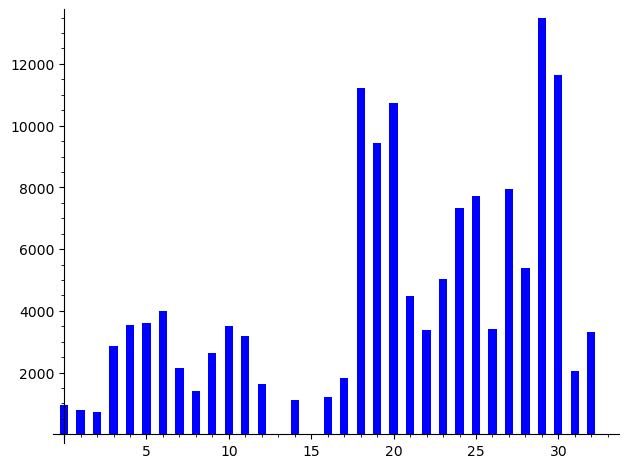

In [111]:
#bar graph showing appearances of each of the 32 different subcomplexes
bar_chart(list(index_dict.values()))

In [134]:
set_vertices

{((0, 1, 3, 4), (1, 2, 3, 4, 6), (1, 4, 5)): 161,
 ((0, 1, 3, 4, 6), (1, 2, 3, 4, 6), (1, 4, 5, 6)): 169,
 ((0, 1, 2, 3, 4), (0, 1, 2, 3, 6), (0, 1, 2, 4, 5), (0, 1, 2, 5, 6)): 1237,
 ((0, 1, 2, 4, 5), (0, 1, 2, 5, 6), (0, 2, 3, 4, 5), (0, 2, 3, 5, 6)): 898,
 ((0, 1, 2, 5, 6), (0, 1, 4, 5, 6), (0, 2, 3, 5, 6), (0, 3, 4, 5, 6)): 491,
 ((0, 1, 2, 3, 4),
  (0, 1, 2, 3, 6),
  (0, 1, 2, 4, 5),
  (1, 2, 3, 5, 6),
  (1, 2, 4, 5, 6)): 1539,
 ((0, 1, 2, 4, 5),
  (0, 2, 3, 4, 5),
  (0, 2, 3, 5, 6),
  (1, 2, 3, 5, 6),
  (1, 2, 4, 5, 6)): 1252,
 ((0, 2, 3, 4, 5), (1, 2, 4, 5), (2, 3, 4, 5, 6)): 337,
 ((0, 1, 2, 4, 5), (0, 2, 3, 4, 5), (1, 2, 4, 5, 6), (2, 3, 4, 5, 6)): 510,
 ((0, 1, 2, 5, 6), (0, 1, 4, 5), (0, 2, 3, 5, 6), (0, 3, 4, 5)): 293,
 ((0, 3, 4), (1, 3, 4, 5), (2, 3, 6)): 35,
 ((0, 3, 4, 5), (1, 3, 4, 5), (2, 3, 5, 6)): 114,
 ((0, 3, 4, 5, 6), (1, 3, 4, 5, 6), (2, 3, 5, 6)): 158,
 ((0, 1, 2, 4, 5), (0, 2, 3, 4, 5), (1, 2, 4, 5, 6), (2, 3, 5, 6)): 404,
 ((0, 1, 2, 3, 4), (0, 1, 2, 3, 6), (

In [117]:
flows[((0, 2, 3, 6), (0, 3, 4, 6), (1, 2, 3, 5, 6), (1, 4, 5, 6))]

[(5, 4, -5, -4, 6, 0, -1, 5, 5),
 (5, 4, -5, -4, 6, 0, -1, 5, 5),
 (8, 6, -8, -6, 9, 0, -1, 8, 7),
 (8, 3, -8, -3, 12, 0, -4, 8, 7),
 (7, 2, -7, -2, 8, 0, -1, 7, 3),
 (4, 2, -4, -2, 6, 0, -2, 4, 4),
 (9, 3, -9, -3, 10, 0, -1, 9, 4),
 (7, 5, -7, -5, 9, 0, -2, 7, 7),
 (9, 5, -9, -5, 12, 0, -3, 9, 8),
 (6, 5, -6, -5, 7, 0, -1, 6, 6),
 (5, 1, -5, -1, 7, 0, -2, 5, 3),
 (6, 5, -6, -5, 10, 0, -4, 6, 9),
 (3, 2, -3, -2, 5, 0, -2, 3, 4),
 (4, 1, -4, -1, 7, 0, -3, 4, 4),
 (4, 2, -4, -2, 7, 0, -3, 4, 5),
 (8, 5, -8, -5, 9, 0, -1, 8, 6),
 (5, 2, -5, -2, 7, 0, -2, 5, 4),
 (8, 2, -8, -2, 9, 0, -1, 8, 3),
 (7, 1, -7, -1, 8, 0, -1, 7, 2),
 (8, 5, -8, -5, 10, 0, -2, 8, 7),
 (3, 1, -3, -1, 4, 0, -1, 3, 2),
 (7, 5, -7, -5, 10, 0, -3, 7, 8),
 (7, 4, -7, -4, 8, 0, -1, 7, 5),
 (7, 2, -7, -2, 9, 0, -2, 7, 4),
 (6, 2, -6, -2, 10, 0, -4, 6, 6),
 (8, 4, -8, -4, 9, 0, -1, 8, 5),
 (10, 2, -10, -2, 15, 0, -5, 10, 7),
 (3, 1, -3, -1, 7, 0, -4, 3, 5),
 (9, 6, -9, -6, 10, 0, -1, 9, 7),
 (10, 4, -10, -4, 12, 0, -2, 10

In [76]:
flows[((0, 3, 4, 6), (1, 4, 5, 6), (2, 3, 6))]

[(5, 5, -5, -5, 7, 0, -2, 5, 7),
 (5, 5, -5, -5, 7, 0, -2, 5, 7),
 (6, 6, -6, -6, 10, 0, -4, 6, 10),
 (1, 1, -1, -1, 5, 0, -4, 1, 5),
 (6, 6, -6, -6, 7, 0, -1, 6, 7),
 (5, 5, -5, -5, 6, 0, -1, 5, 6),
 (1, 1, -1, -1, 2, 0, -1, 1, 2),
 (4, 4, -4, -4, 6, 0, -2, 4, 6),
 (6, 6, -6, -6, 7, 0, -1, 6, 7),
 (9, 9, -9, -9, 10, 0, -1, 9, 10),
 (1, 1, -1, -1, 2, 0, -1, 1, 2),
 (4, 4, -4, -4, 5, 0, -1, 4, 5),
 (5, 5, -5, -5, 9, 0, -4, 5, 9),
 (5, 5, -5, -5, 6, 0, -1, 5, 6)]

In [77]:
flows[((0, 3, 4, 6), (1, 4, 5, 6), (2, 3, 4, 6))]

[(4, 8, -4, -8, 5, 0, -1, 4, 9),
 (4, 8, -4, -8, 5, 0, -1, 4, 9),
 (2, 3, -2, -3, 6, 0, -4, 2, 7),
 (3, 5, -3, -5, 8, 0, -5, 3, 10),
 (1, 4, -1, -4, 5, 0, -4, 1, 8),
 (1, 6, -1, -6, 2, 0, -1, 1, 7),
 (2, 7, -2, -7, 4, 0, -2, 2, 9),
 (2, 3, -2, -3, 3, 0, -1, 2, 4),
 (6, 7, -6, -7, 9, 0, -3, 6, 10),
 (5, 7, -5, -7, 7, 0, -2, 5, 9),
 (5, 9, -5, -9, 6, 0, -1, 5, 10),
 (3, 5, -3, -5, 4, 0, -1, 3, 6),
 (5, 7, -5, -7, 6, 0, -1, 5, 8),
 (4, 5, -4, -5, 5, 0, -1, 4, 6),
 (3, 5, -3, -5, 6, 0, -3, 3, 8),
 (3, 4, -3, -4, 7, 0, -4, 3, 8),
 (1, 5, -1, -5, 2, 0, -1, 1, 6),
 (1, 3, -1, -3, 2, 0, -1, 1, 4),
 (7, 8, -7, -8, 8, 0, -1, 7, 9),
 (5, 8, -5, -8, 6, 0, -1, 5, 9),
 (4, 5, -4, -5, 7, 0, -3, 4, 8),
 (2, 3, -2, -3, 5, 0, -3, 2, 6),
 (1, 4, -1, -4, 3, 0, -2, 1, 6)]

In [119]:
flows[ ((0,3,4,6),(1,4,5,6),(2,3,6))]

[(5, 5, -5, -5, 7, 0, -2, 5, 7),
 (5, 5, -5, -5, 7, 0, -2, 5, 7),
 (6, 6, -6, -6, 10, 0, -4, 6, 10),
 (1, 1, -1, -1, 5, 0, -4, 1, 5),
 (6, 6, -6, -6, 7, 0, -1, 6, 7),
 (5, 5, -5, -5, 6, 0, -1, 5, 6),
 (1, 1, -1, -1, 2, 0, -1, 1, 2),
 (4, 4, -4, -4, 6, 0, -2, 4, 6),
 (6, 6, -6, -6, 7, 0, -1, 6, 7),
 (9, 9, -9, -9, 10, 0, -1, 9, 10),
 (1, 1, -1, -1, 2, 0, -1, 1, 2),
 (4, 4, -4, -4, 5, 0, -1, 4, 5),
 (5, 5, -5, -5, 9, 0, -4, 5, 9),
 (5, 5, -5, -5, 6, 0, -1, 5, 6),
 (7, 7, -7, -7, 8, 0, -1, 7, 8),
 (6, 6, -6, -6, 7, 0, -1, 6, 7),
 (5, 5, -5, -5, 8, 0, -3, 5, 8),
 (2, 2, -2, -2, 7, 0, -5, 2, 7),
 (6, 6, -6, -6, 9, 0, -3, 6, 9)]

In [290]:
a = 1; b=1; c=7; d=2

In [291]:
P = simplicial_complex_flow_polytope(bipyramid_wedge, (a,b,-a,-b,c,0,a-c,a,b+c-a))
P.vertices()

(A vertex at (0, 0, 1, 1, 0, 0, 7),
 A vertex at (0, 1, 0, 0, 1, 1, 6),
 A vertex at (1, 0, 0, 1, 1, 0, 6))

In [277]:
P = simplicial_complex_flow_polytope(bipyramid_wedge, (a+b, c+d-a, -c, -b-d, a, 0, b, c, d))
P.vertices()

(A vertex at (11, 0, 8, 5, 0, 0, 2),
 A vertex at (13, 0, 6, 5, 2, 0, 0),
 A vertex at (8, 5, 6, 0, 2, 5, 0),
 A vertex at (6, 5, 8, 0, 0, 5, 2))

In [284]:
P = simplicial_complex_flow_polytope(bipyramid_wedge, (a, b+c-a,-b,-c,a,0,0,b,c))
P.vertices()

(A vertex at (6, 0, 0, 5, 7, 0, 0),
 A vertex at (1, 5, 0, 0, 7, 5, 0),
 A vertex at (0, 5, 1, 0, 6, 5, 1),
 A vertex at (0, 0, 6, 5, 1, 0, 6))

In [285]:
flows[((0,1,4,5),(0,3,4),(1,2,4,5,6),(2,3,4,6))]

[(4, 3, -2, -5, 4, 0, 0, 2, 5),
 (4, 3, -2, -5, 4, 0, 0, 2, 5),
 (4, 5, -2, -7, 4, 0, 0, 2, 7),
 (8, 6, -5, -9, 8, 0, 0, 5, 9),
 (4, 3, -1, -6, 4, 0, 0, 1, 6),
 (8, 4, -3, -9, 8, 0, 0, 3, 9),
 (8, 3, -2, -9, 8, 0, 0, 2, 9),
 (3, 4, -2, -5, 3, 0, 0, 2, 5),
 (4, 2, -1, -5, 4, 0, 0, 1, 5),
 (2, 3, -1, -4, 2, 0, 0, 1, 4),
 (3, 2, -1, -4, 3, 0, 0, 1, 4),
 (6, 7, -5, -8, 6, 0, 0, 5, 8),
 (3, 3, -2, -4, 3, 0, 0, 2, 4),
 (3, 3, -1, -5, 3, 0, 0, 1, 5),
 (2, 4, -1, -5, 2, 0, 0, 1, 5),
 (2, 2, -1, -3, 2, 0, 0, 1, 3),
 (4, 4, -3, -5, 4, 0, 0, 3, 5),
 (7, 3, -2, -8, 7, 0, 0, 2, 8),
 (4, 7, -3, -8, 4, 0, 0, 3, 8),
 (6, 3, -1, -8, 6, 0, 0, 1, 8),
 (6, 6, -5, -7, 6, 0, 0, 5, 7),
 (4, 4, -1, -7, 4, 0, 0, 1, 7),
 (5, 4, -3, -6, 5, 0, 0, 3, 6),
 (7, 5, -3, -9, 7, 0, 0, 3, 9),
 (4, 4, -2, -6, 4, 0, 0, 2, 6),
 (7, 7, -5, -9, 7, 0, 0, 5, 9),
 (5, 3, -1, -7, 5, 0, 0, 1, 7),
 (7, 8, -6, -9, 7, 0, 0, 6, 9),
 (7, 5, -3, -9, 7, 0, 0, 3, 9),
 (2, 4, -1, -5, 2, 0, 0, 1, 5),
 (5, 7, -3, -9, 5, 0, 0, 3, 9),
 (9, 7, 

In [81]:
flows[((0,3,4,6),(1,4,5,6),(2,3,4,6))]

[(3, 4, -3, -4, 4, 0, -1, 3, 5),
 (3, 4, -3, -4, 4, 0, -1, 3, 5),
 (3, 4, -3, -4, 7, 0, -4, 3, 8),
 (4, 5, -4, -5, 6, 0, -2, 4, 7),
 (5, 6, -5, -6, 9, 0, -4, 5, 10),
 (4, 6, -4, -6, 5, 0, -1, 4, 7),
 (5, 6, -5, -6, 6, 0, -1, 5, 7),
 (2, 3, -2, -3, 7, 0, -5, 2, 8),
 (3, 6, -3, -6, 4, 0, -1, 3, 7),
 (3, 5, -3, -5, 6, 0, -3, 3, 8),
 (2, 7, -2, -7, 3, 0, -1, 2, 8),
 (2, 6, -2, -6, 3, 0, -1, 2, 7),
 (1, 5, -1, -5, 5, 0, -4, 1, 9),
 (2, 3, -2, -3, 5, 0, -3, 2, 6),
 (5, 8, -5, -8, 6, 0, -1, 5, 9),
 (1, 4, -1, -4, 3, 0, -2, 1, 6),
 (2, 4, -2, -4, 3, 0, -1, 2, 5),
 (1, 4, -1, -4, 5, 0, -4, 1, 8)]

In [51]:
bd = boundary_matrix(bipyramid_wedge)
bd

[ 1  1  1  0  0  0  0]
[-1  0  0  1  1  0  0]
[ 0 -1  0 -1  0  0  0]
[ 0  0 -1  0 -1  0  0]
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

In [53]:
4* vector(bd.columns()[2]) + 3*vector(bd.columns()[3]) + 1*vector(bd.columns()[4]) + 6*vector(bd.columns()[6])

(4, 4, -3, -5, 6, 0, -2, 3, 7)

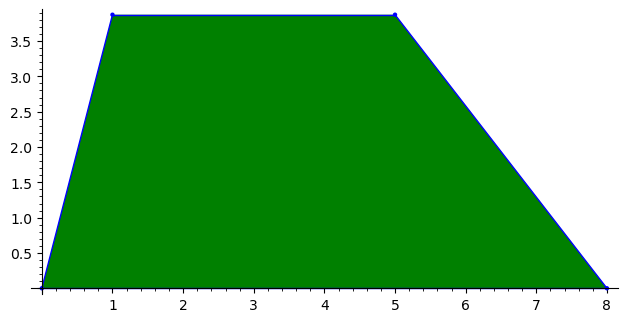

In [15]:
P = simplicial_complex_flow_polytope(bipyramid_wedge, (4,5,-2,-7,4,0,0,2,7))
P.plot()

In [16]:
P.vertices()

(A vertex at (4, 0, 0, 2, 7, 0, 0),
 A vertex at (2, 2, 0, 0, 7, 2, 0),
 A vertex at (0, 2, 2, 0, 5, 2, 2),
 A vertex at (0, 0, 4, 2, 3, 0, 4))

### journal entry - 5/5/25

Given $a$ and the columns of the boundary matrix, are the vertices simply all the possible ways to write $a$ as a conical combination of the columns? If so, how does that relate to the subcomplexes? How do you find all the possible ways or even check that you have them?

Vertices can't just be all the conical combos bc all the points within the polytope also have to solve the equation $Ax = a$. In normal flow polytope world, the facets of $P$ correspond to letting the flow on one of the facets of $X$ to be 0, does this translate? Or is this just in the $(1,0,0,0,-1)$ case? Look at details of $a$-valid again

In [56]:
flows

{((0, 1, 2, 4, 5),
  (0, 1, 2, 5, 6),
  (0, 2, 3, 4, 5),
  (0,
   2,
   3,
   5,
   6)): [(14, -3, -6, -5, 14, -1, 1, 7, 4), (14, -3, -6, -5, 14, -1, 1, 7, 4), (11, -4, -4, -3, 10, -1, 2, 5, 1), (11, -4, -4, -3, 11, -1, 1, 5, 2), (8, -2, -2, -4, 6, -1, 3, 3, 1), (8, -2, -2, -4, 8, -1, 1, 3, 3), (11, -4, -1, -6, 10, -4, 5, 5, 1), (11, -4, -1, -6, 11, -4, 4, 5, 2), (12, -1, -4, -7, 9, -1, 4, 5, 3), (6, -1, -2, -3, 8, -4, 2, 6, 1), (8, -2, -2, -4, 9, -2, 1, 4, 3), (11, -1, -3, -7, 9, -2, 4, 5, 3), (10, -3, -1, -6, 7, -1, 4, 2, 2), (10, -3, -1, -6, 8, -1, 3, 2, 3), (5, -2, -1, -2, 5, -1, 1, 2, 1), (10, -3, -1, -6, 7, -2, 5, 3, 1), (10, -3, -1, -6, 10, -2, 2, 3, 4), (9, -2, -3, -4, 9, -2, 2, 5, 2), (11, -3, -4, -4, 11, -1, 1, 5, 3), (10, -2, -3, -5, 10, -3, 3, 6, 2), (10, -2, -3, -5, 12, -3, 1, 6, 4), (13, -2, -5, -6, 10, -2, 5, 7, 1), (13, -2, -5, -6, 11, -2, 4, 7, 2), (10, -1, -1, -8, 7, -1, 4, 2, 4), (7, -2, -3, -2, 9, -3, 1, 6, 1), (10, -1, -4, -5, 8, -1, 3, 5, 2), (10, -1, -4, -5, 9, -

In [56]:
for key in flows.keys():
    print(key)

((0, 1, 3, 4), (1, 2, 3, 4, 6), (1, 4, 5))
((0, 1, 3, 4, 6), (1, 2, 3, 4, 6), (1, 4, 5, 6))
((0, 1, 2, 3, 4), (0, 1, 2, 3, 6), (0, 1, 2, 4, 5), (0, 1, 2, 5, 6))
((0, 1, 2, 4, 5), (0, 1, 2, 5, 6), (0, 2, 3, 4, 5), (0, 2, 3, 5, 6))
((0, 1, 2, 5, 6), (0, 1, 4, 5, 6), (0, 2, 3, 5, 6), (0, 3, 4, 5, 6))
((0, 1, 2, 3, 4), (0, 1, 2, 3, 6), (0, 1, 2, 4, 5), (1, 2, 3, 5, 6), (1, 2, 4, 5, 6))
((0, 1, 2, 4, 5), (0, 2, 3, 4, 5), (0, 2, 3, 5, 6), (1, 2, 3, 5, 6), (1, 2, 4, 5, 6))
((0, 2, 3, 4, 5), (1, 2, 4, 5), (2, 3, 4, 5, 6))
((0, 1, 2, 4, 5), (0, 2, 3, 4, 5), (1, 2, 4, 5, 6), (2, 3, 4, 5, 6))
((0, 1, 2, 5, 6), (0, 1, 4, 5), (0, 2, 3, 5, 6), (0, 3, 4, 5))
((0, 3, 4), (1, 3, 4, 5), (2, 3, 6))
((0, 3, 4, 5), (1, 3, 4, 5), (2, 3, 5, 6))
((0, 3, 4, 5, 6), (1, 3, 4, 5, 6), (2, 3, 5, 6))
((0, 1, 2, 4, 5), (0, 2, 3, 4, 5), (1, 2, 4, 5, 6), (2, 3, 5, 6))
((0, 1, 2, 3, 4), (0, 1, 2, 3, 6), (1, 2, 3, 4, 5), (1, 2, 3, 5, 6))
((0, 2, 3, 4), (0, 2, 3, 6), (1, 2, 3, 4, 5), (1, 2, 3, 5, 6))
((0, 1, 2, 4, 5), (0,

In [177]:
mylist = flows[((0, 1, 2, 3, 6), (0, 1, 3, 4, 6), (1, 2, 3, 5, 6), (1, 4, 5, 6))]

In [15]:
def uniq(mylist):
    seen = []
    for e in mylist:
        if e in seen:
            continue
        seen.append(e)
    return seen

In [28]:
#looks at flows dictionary and removes duplicate entries
new_dict = {}
for entry in flows.keys():
    new_list = uniq(flows[entry])
    #print(new_list)
    new_dict.update({entry:new_list})

new_dict

{((0, 1, 2, 3, 4),
  (0, 1, 2, 3, 6),
  (1, 2, 3, 5, 6),
  (1,
   2,
   4,
   5)): [(13, 3, -9, -7, 4, 5, 4, 4, 3), (8, 1, -6, -3, 3, 3, 2, 3, 1)],
 ((0, 2, 3, 4),
  (0, 2, 3, 6),
  (1, 2, 3, 5, 6),
  (1,
   2,
   4,
   5)): [(13, 3, -9, -7, 9, 0, 4, 9, 3), (7, 2, -6, -3, 6, 0, 1, 6, 2)],
 ((0, 1, 2, 4, 5),
  (0, 2, 3, 4),
  (0, 2, 3, 6),
  (1, 2, 3, 5, 6),
  (1, 2, 4, 5, 6)): [(13, 3, -9, -7, 10, 0, 3, 9, 4),
  (12, 2, -7, -7, 8, 0, 4, 7, 3)],
 ((0, 1, 2, 3, 4),
  (0, 1, 2, 3, 6),
  (0, 1, 2, 4, 5),
  (1,
   2,
   5,
   6)): [(7, 0, -5, -2, 2, 4, 1, 1, 1), (10, 0, -7, -3, 5, 3, 2, 4, 1)],
 ((0, 2, 3, 4), (1, 2, 3, 4, 5), (2, 3, 6)): [(4, 4, -4, -4, 2, 0, 2, 4, 2)],
 ((0, 3, 4, 6), (1, 4, 5, 6), (2, 3, 6)): [(4, 4, -4, -4, 5, 0, -1, 4, 5)],
 ((0, 1, 2, 3, 4),
  (0, 1, 2, 3, 6),
  (0, 1, 2, 4, 5),
  (1, 2, 3, 5, 6),
  (1, 2, 4, 5, 6)): [(13, 1, -5, -9, 6, 2, 5, 3, 4),
  (13, 1, -5, -9, 9, 2, 2, 3, 7),
  (12, 2, -6, -8, 5, 3, 4, 3, 4),
  (12, 2, -6, -8, 6, 2, 4, 4, 4),
  (12, 2, -7, -7, 

In [196]:
index_dict_2 = {}
for entry in new_dict.keys():
    #print(entry)
    num = len(new_dict[entry])
    #print(num)
    index_dict_2.update({entry: num})
index_dict_2

{((0, 1, 2, 3, 4), (0, 1, 2, 3, 6), (1, 2, 3, 4, 5), (1, 2, 3, 5, 6)): 74,
 ((0, 2, 3, 4), (0, 2, 3, 6), (1, 2, 3, 4, 5), (1, 2, 3, 5, 6)): 6,
 ((0, 1, 4, 5, 6),
  (0, 2, 3, 6),
  (0, 3, 4, 6),
  (1, 2, 3, 5, 6),
  (1, 2, 4, 5, 6)): 1,
 ((0, 1, 2, 3, 6),
  (0, 1, 3, 4, 6),
  (0, 1, 4, 5, 6),
  (1, 2, 3, 5, 6),
  (1, 2, 4, 5, 6)): 14,
 ((0, 1, 2, 3, 4), (0, 1, 2, 3, 6), (0, 1, 2, 4, 5), (0, 1, 2, 5, 6)): 56,
 ((0, 1, 2, 3, 4),
  (0, 1, 2, 3, 6),
  (0, 1, 2, 4, 5),
  (1, 2, 3, 5, 6),
  (1, 2, 4, 5, 6)): 57,
 ((0, 1, 2, 4, 5),
  (0, 2, 3, 4, 5),
  (0, 2, 3, 5, 6),
  (1, 2, 3, 5, 6),
  (1, 2, 4, 5, 6)): 35,
 ((0, 1, 4, 5, 6),
  (0, 2, 3, 5, 6),
  (0, 3, 4, 5, 6),
  (1, 2, 3, 5, 6),
  (1, 2, 4, 5, 6)): 24,
 ((0, 2, 3, 4, 5), (0, 2, 3, 5, 6), (1, 2, 3, 4, 5), (1, 2, 3, 5, 6)): 38,
 ((0, 2, 3, 5, 6), (0, 3, 4, 5, 6), (1, 2, 3, 5, 6), (1, 3, 4, 5, 6)): 10,
 ((0, 1, 2, 3, 4), (1, 2, 3, 4, 5), (1, 2, 3, 4, 6)): 65,
 ((0, 1, 3, 4, 6), (0, 1, 4, 5, 6), (1, 2, 3, 4, 6), (1, 2, 4, 5, 6)): 6,
 ((0, 1

In [385]:
X = Set([{1,2},{3}])

In [387]:
X.union(Set([{3,2}]))

Set-theoretic union of Set of elements of [{1, 2}, {3}] and Set of elements of [{2, 3}]

In [22]:
X = {}

In [23]:
X.update({1:3,2:7})

In [24]:
X

{1: 3, 2: 7}

In [25]:
X.update({3:4})

In [26]:
X

{1: 3, 2: 7, 3: 4}

In [54]:
X = list()

In [55]:
X

[]

In [65]:
X = {(1,2,3):[0,1,2], (0,1,0):[0,0,0,1]}

In [66]:
X

{(1, 2, 3): [0, 1, 2], (0, 1, 0): [0, 0, 0, 1]}

In [67]:
X[(1,2,3)]

[0, 1, 2]

In [68]:
X[(1,2,3)].append(4)

In [69]:
X

{(1, 2, 3): [0, 1, 2, 4], (0, 1, 0): [0, 0, 0, 1]}

In [70]:
X.update({(0,0,0):list()})

In [71]:
X

{(1, 2, 3): [0, 1, 2, 4], (0, 1, 0): [0, 0, 0, 1], (0, 0, 0): []}

In [72]:
X[(0,0,0)].append(2)
X

{(1, 2, 3): [0, 1, 2, 4], (0, 1, 0): [0, 0, 0, 1], (0, 0, 0): [2]}

In [88]:
X

{(1, 2, 3): [0, 1, 2, 4], (0, 1, 0): [0, 0, 0, 1], (0, 0, 0): [2], (0, 1): 2}

In [9]:
bipyramid_wedge = SimplicialComplex([[0,1,2],[0,1,3],[0,1,4],[0,2,4],[0,2,3],[1,2,4],[1,2,3]])


In [120]:
i=0
for i in range(100000):
    vec = bd * vector((0,random.sample(range(0,10),1)[0],0,random.sample(range(0,10),1)[0],random.sample(range(0,10),1)[0],0,random.sample(range(0,10),1)[0]))
    P = simplicial_complex_flow_polytope(bipyramid_wedge, vec)
    if P.dimension() > 0:
        print(P.vertices(), vec)

    i = i + 1

print("done")
        

done


In [117]:
P = simplicial_complex_flow_polytope(bipyramid_wedge, bd * vector((0,4,0,2,2,0,2)))
P.vertices()

(A vertex at (0, 4, 0, 2, 2, 0, 2),)

In [113]:
bd = boundary_matrix(bipyramid_wedge)
bd

[ 1  1  1  0  0  0  0]
[-1  0  0  1  1  0  0]
[ 0 -1  0 -1  0  0  0]
[ 0  0 -1  0 -1  0  0]
[ 1  0  0  0  0  1  1]
[ 0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1]
[ 0  0  0  1  0  1  0]
[ 0  0  0  0  1  0  1]

In [115]:
bd * vector((0,1,0,3,1,0,1))

(1, 4, -4, -1, 1, 1, -1, 3, 2)

## trying another example

In [305]:
new_ex = SimplicialComplex([[0,1,4],[0,3,4],[1,2,3],[1,3,4]])

In [306]:
new_ex.betti()

{0: 1, 1: 0, 2: 0}

In [307]:
bd = boundary_matrix(new_ex)
bd

[ 1  0  0  0]
[ 0  1  0  0]
[-1 -1  0  0]
[ 0  0  1  0]
[ 0  0 -1  1]
[ 1  0  0 -1]
[ 0  0  1  0]
[ 0  1  0  1]

In [322]:
P = simplicial_complex_flow_polytope(new_ex,  (5, 1, -6, 5, -3, 3, 5, 3))
P.vertices()

(A vertex at (5, 1, 5, 2),)

In [321]:
good_labelings = []
test_simplicial_complex(new_ex, good_labelings)

[[3, 0, [1, 2, 3, 4, 5], (2, 0, -2, 0, 0, 2, 0, 0)],
 [3, 0, [1, 2, 3, 4, 5], (2, 0, -2, 0, 0, 2, 0, 0)],
 [3, 0, [1, 2, 3, 4, 5], (2, 0, -2, 3, -3, 2, 3, 0)],
 [3, 0, [1, 2, 3, 4, 5], (2, 0, -2, 3, 0, -1, 3, 3)],
 [3, 0, [1, 2, 4, 3, 5], (2, 0, -2, 0, 0, 2, 0, 0)],
 [3, 0, [1, 2, 4, 3, 5], (2, 0, -2, 0, 0, 2, 0, 0)],
 [3, 0, [1, 2, 4, 3, 5], (2, 0, -2, 1, -1, 2, 1, 0)],
 [3, 0, [1, 2, 4, 3, 5], (2, 0, -2, 1, -1, 2, 1, 0)],
 [3, 0, [1, 2, 5, 3, 4], (0, 0, 0, 0, 0, 0, 0, 0)],
 [3, 0, [1, 3, 2, 5, 4], (0, 0, 0, 0, 0, 0, 0, 0)],
 [3, 0, [1, 3, 2, 5, 4], (0, 5, -5, 0, 0, 0, 0, 5)],
 [3, 0, [1, 3, 2, 5, 4], (0, 5, -5, 4, -4, 0, 4, 5)],
 [3, 0, [1, 3, 4, 2, 5], (4, 0, -4, 0, 0, 4, 0, 0)],
 [3, 0, [1, 3, 4, 2, 5], (4, 5, -9, 0, 0, 4, 0, 5)],
 [3, 0, [1, 3, 4, 2, 5], (4, 5, -9, 3, -3, 4, 3, 5)],
 [3, 0, [1, 4, 3, 2, 5], (2, 0, -2, 0, 0, 2, 0, 0)],
 [3, 0, [1, 4, 3, 2, 5], (2, 1, -3, 0, 0, 2, 0, 1)],
 [3, 0, [1, 4, 3, 2, 5], (2, 1, -3, 2, -2, 2, 2, 1)],
 [3, 0, [1, 4, 3, 2, 5], (2, 1, -3, 2, 0,

In [16]:
octo = SimplicialComplex([[0,1,2],[0,1,4],[0,2,3],[0,3,4],[1,2,5],[1,4,5],[2,3,5],[3,4,5]])

In [17]:
bd = boundary_matrix(octo)
bd

[ 1  1  0  0  0  0  0  0]
[-1  0  1  0  0  0  0  0]
[ 0  0 -1  1  0  0  0  0]
[ 0 -1  0 -1  0  0  0  0]
[ 1  0  0  0  1  0  0  0]
[ 0  1  0  0  0  1  0  0]
[ 0  0  0  0 -1 -1  0  0]
[ 0  0  1  0  0  0  1  0]
[ 0  0  0  0  1  0 -1  0]
[ 0  0  0  1  0  0  0  1]
[ 0  0  0  0  0  0  1 -1]
[ 0  0  0  0  0  1  0  1]

In [18]:
P = simplicial_complex_flow_polytope(octo, (4, 3, -4, -3, 3, 2, -1, 9, -3, 5, 0, 4))
P.vertices()

(A vertex at (2, 2, 5, 1, 1, 0, 4, 4), A vertex at (3, 1, 6, 2, 0, 1, 3, 3))

In [327]:
P.vertices()

(A vertex at (0, 2, 0, 0, 2, 0, 2, 2), A vertex at (2, 0, 2, 2, 0, 2, 0, 0))

In [328]:
good_labelings = []
test_simplicial_complex(octo, good_labelings)

[[3, 1, [1, 2, 3, 4, 5, 6], (10, 0, -1, -9, 8, 7, -5, 5, 3, 4, 0, 2)],
 [3, 1, [1, 2, 3, 4, 5, 6], (10, 0, -1, -9, 8, 7, -5, 7, 1, 4, 2, 2)],
 [3, 1, [1, 2, 3, 4, 5, 6], (10, 0, -1, -9, 8, 7, -5, 7, 1, 6, 0, 4)],
 [3, 1, [1, 3, 4, 6, 2, 5], (4, 3, -4, -3, 3, 2, -1, 9, -3, 5, 0, 4)],
 [3, 1, [1, 3, 4, 6, 2, 5], (4, 3, -4, -3, 3, 2, -1, 9, -3, 9, -4, 8)],
 [3, 1, [1, 4, 3, 2, 5, 6], (4, -1, 0, -3, 7, 1, -4, 4, 2, 4, 0, 2)],
 [3, 1, [1, 4, 5, 2, 3, 6], (8, 1, -2, -7, 9, 6, -7, 5, 5, 3, 0, 2)],
 [3, 1, [1, 4, 5, 2, 3, 6], (8, 1, -2, -7, 9, 6, -7, 6, 4, 3, 1, 2)],
 [3, 1, [1, 4, 5, 2, 3, 6], (8, 1, -2, -7, 9, 6, -7, 6, 4, 7, -3, 6)],
 [3, 1, [2, 1, 3, 6, 5, 4], (4, -2, 0, -2, 8, 1, -5, 2, 4, 2, 0, 1)],
 [3, 1, [2, 1, 3, 6, 5, 4], (4, -2, 0, -2, 8, 1, -5, 4, 2, 2, 2, 1)],
 [3, 1, [2, 1, 3, 6, 5, 4], (4, -2, 0, -2, 8, 1, -5, 4, 2, 7, -3, 6)],
 [3, 1, [2, 3, 1, 5, 6, 4], (7, -3, 2, -6, 10, 3, -6, 2, 5, 4, 0, 1)],
 [3, 1, [2, 3, 1, 5, 6, 4], (7, -3, 2, -6, 10, 3, -6, 2, 5, 4, 0, 1)],
 [3, 1, [2

In [339]:
subcomplexes(octo)

[{0, 2, 3, 5},
 {0, 3, 5, 6},
 {1, 2, 4, 7},
 {1, 4, 6, 7},
 {0, 1, 2, 3, 5},
 {0, 1, 2, 4, 7},
 {0, 1, 2, 5, 7},
 {0, 1, 3, 5, 6},
 {0, 1, 4, 6, 7},
 {0, 1, 5, 6, 7},
 {0, 2, 3, 4, 5},
 {0, 2, 3, 5, 6},
 {0, 2, 3, 5, 7},
 {0, 3, 4, 5, 6},
 {0, 3, 5, 6, 7},
 {1, 2, 3, 4, 5},
 {1, 2, 3, 4, 7},
 {1, 2, 4, 5, 7},
 {1, 2, 4, 6, 7},
 {1, 3, 4, 5, 6},
 {1, 3, 4, 6, 7},
 {1, 4, 5, 6, 7},
 {0, 1, 2, 3, 4, 5},
 {0, 1, 2, 3, 4, 7},
 {0, 1, 2, 3, 5, 6},
 {0, 1, 2, 3, 5, 7},
 {0, 1, 2, 4, 5, 7},
 {0, 1, 2, 4, 6, 7},
 {0, 1, 2, 5, 6, 7},
 {0, 1, 3, 4, 5, 6},
 {0, 1, 3, 4, 6, 7},
 {0, 1, 3, 5, 6, 7},
 {0, 1, 4, 5, 6, 7},
 {0, 2, 3, 4, 5, 6},
 {0, 2, 3, 4, 5, 7},
 {0, 2, 3, 5, 6, 7},
 {0, 3, 4, 5, 6, 7},
 {1, 2, 3, 4, 5, 6},
 {1, 2, 3, 4, 5, 7},
 {1, 2, 3, 4, 6, 7},
 {1, 2, 4, 5, 6, 7},
 {1, 3, 4, 5, 6, 7},
 {0, 1, 2, 3, 4, 5, 6},
 {0, 1, 2, 3, 4, 5, 7},
 {0, 1, 2, 3, 4, 6, 7},
 {0, 1, 2, 3, 5, 6, 7},
 {0, 1, 2, 4, 5, 6, 7},
 {0, 1, 3, 4, 5, 6, 7},
 {0, 2, 3, 4, 5, 6, 7},
 {1, 2, 3, 4, 5, 6, 7}]

In [28]:
index_dict_2 = {(0, 2, 3, 5):0,
 (0, 3, 5, 6):0,
 (1, 2, 4, 7):0,
 (1, 4, 6, 7):0,
 (0, 1, 2, 3, 5):0,
 (0, 1, 2, 4, 7):0,
 (0, 1, 2, 5, 7):0,
 (0, 1, 3, 5, 6):0,
 (0, 1, 4, 6, 7):0,
 (0, 1, 5, 6, 7):0,
 (0, 2, 3, 4, 5):0,
 (0, 2, 3, 5, 6):0,
 (0, 2, 3, 5, 7):0,
 (0, 3, 4, 5, 6):0,
 (0, 3, 5, 6, 7):0,
 (1, 2, 3, 4, 5):0,
 (1, 2, 3, 4, 7):0,
 (1, 2, 4, 5, 7):0,
 (1, 2, 4, 6, 7):0,
 (1, 3, 4, 5, 6):0,
 (1, 3, 4, 6, 7):0,
 (1, 4, 5, 6, 7):0,
 (0, 1, 2, 3, 4, 5):0,
 (0, 1, 2, 3, 4, 7):0,
 (0, 1, 2, 3, 5, 6):0,
 (0, 1, 2, 3, 5, 7):0,
 (0, 1, 2, 4, 5, 7):0,
 (0, 1, 2, 4, 6, 7):0,
 (0, 1, 2, 5, 6, 7):0,
 (0, 1, 3, 4, 5, 6):0,
 (0, 1, 3, 4, 6, 7):0,
 (0, 1, 3, 5, 6, 7):0,
 (0, 1, 4, 5, 6, 7):0,
 (0, 2, 3, 4, 5, 6):0,
 (0, 2, 3, 4, 5, 7):0,
 (0, 2, 3, 5, 6, 7):0,
 (0, 3, 4, 5, 6, 7):0,
 (1, 2, 3, 4, 5, 6):0,
 (1, 2, 3, 4, 5, 7):0,
 (1, 2, 3, 4, 6, 7):0,
 (1, 2, 4, 5, 6, 7):0,
 (1, 3, 4, 5, 6, 7):0,
 (0, 1, 2, 3, 4, 5, 6):0,
 (0, 1, 2, 3, 4, 5, 7):0,
 (0, 1, 2, 3, 4, 6, 7):0,
 (0, 1, 2, 3, 5, 6, 7):0,
 (0, 1, 2, 4, 5, 6, 7):0,
 (0, 1, 3, 4, 5, 6, 7):0,
 (0, 2, 3, 4, 5, 6, 7):0,
 (1, 2, 3, 4, 5, 6, 7):0}

In [29]:
set_vertices_2 = {}
flows_2 = {}

In [36]:
good_labelings = []
repeat = []

for i in range(10):
    good_labelings = []
    test_simplicial_complex(octo, good_labelings)
    for entry in good_labelings:
        flow = entry[3]

        #trying to not have thousands of duplicates in the list and save time
        if flow in repeat:
            print(i,"repeat")
            continue
        repeat.append(flow)
        
        p_verts = []
    
        P = simplicial_complex_flow_polytope(octo, flow)
        verts = P.vertices()
        
        for vertex in verts:
            indices = []
            for index in range(len(vertex)):
                if vertex[index] != 0:
                    indices.append(index)
            #print(indices)
            index_dict_2[tuple(indices)] = index_dict_2[tuple(indices)] + 1
            p_verts.append(tuple(indices))

        #sort p_verts so we don't double count
        p_verts = tuple(sorted(p_verts))

        if p_verts not in flows_2:
            #if we haven't seen this collection of vertices before, add it to the dictionary
            set_vertices_2.update({p_verts:1})
            flows_2.update({p_verts:list([flow])})
            #(flows[p_verts]).append(tuple(flow))
            
        #if we've already seen this collection of vertices, increment the counter
        if p_verts in flows_2:
            set_vertices_2[p_verts] = set_vertices_2[p_verts] + 1
            #print(flow)
            (flows_2[p_verts]).append(flow)

                
        if indices == (1,3,4,6):
            print("Found!", flow)
        if indices == (1,4,5,6):
            print("Found!", flow)
    i = i+1

print("done")
print(index_dict_2)

0 repeat
0 repeat
0 repeat
0 repeat
0 repeat
0 repeat
0 repeat
0 repeat
0 repeat
0 repeat
0 repeat
0 repeat
0 repeat
1 repeat
1 repeat
1 repeat
1 repeat
1 repeat
1 repeat
1 repeat
2 repeat
2 repeat
2 repeat
2 repeat
2 repeat
2 repeat
3 repeat
3 repeat
3 repeat
3 repeat
3 repeat
3 repeat
3 repeat
3 repeat
3 repeat
3 repeat
4 repeat
4 repeat
4 repeat
4 repeat
4 repeat
4 repeat
4 repeat
4 repeat
4 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
5 repeat
6 repeat
6 repeat
6 repeat
6 repeat
6 repeat
7 repeat
7 repeat
7 repeat
7 repeat
7 repeat
7 repeat
7 repeat
7 repeat
7 repeat
7 repeat
8 repeat
8 repeat
8 repeat
8 repeat
8 repeat
8 repeat
9 repeat
9 repeat
9 repeat
9 repeat
9 repeat
9 repeat
9 repeat
9 repeat
9 repeat
9 repeat
done
{(0, 2, 3, 5): 24, (0, 3, 5, 6): 0, (1, 2, 4, 7): 0, (1, 4, 6, 7): 18, (0, 1, 2, 3, 5): 72, (0, 1, 2, 4, 7): 0, (0, 1, 2, 5, 7): 0, (0, 1, 3

In [31]:
index_dict_2

{(0, 2, 3, 5): 12,
 (0, 3, 5, 6): 0,
 (1, 2, 4, 7): 0,
 (1, 4, 6, 7): 17,
 (0, 1, 2, 3, 5): 32,
 (0, 1, 2, 4, 7): 0,
 (0, 1, 2, 5, 7): 0,
 (0, 1, 3, 5, 6): 0,
 (0, 1, 4, 6, 7): 11,
 (0, 1, 5, 6, 7): 0,
 (0, 2, 3, 4, 5): 38,
 (0, 2, 3, 5, 6): 15,
 (0, 2, 3, 5, 7): 7,
 (0, 3, 4, 5, 6): 0,
 (0, 3, 5, 6, 7): 0,
 (1, 2, 3, 4, 5): 0,
 (1, 2, 3, 4, 7): 0,
 (1, 2, 4, 5, 7): 0,
 (1, 2, 4, 6, 7): 8,
 (1, 3, 4, 5, 6): 0,
 (1, 3, 4, 6, 7): 15,
 (1, 4, 5, 6, 7): 13,
 (0, 1, 2, 3, 4, 5): 166,
 (0, 1, 2, 3, 4, 7): 0,
 (0, 1, 2, 3, 5, 6): 40,
 (0, 1, 2, 3, 5, 7): 17,
 (0, 1, 2, 4, 5, 7): 0,
 (0, 1, 2, 4, 6, 7): 36,
 (0, 1, 2, 5, 6, 7): 0,
 (0, 1, 3, 4, 5, 6): 0,
 (0, 1, 3, 4, 6, 7): 49,
 (0, 1, 3, 5, 6, 7): 0,
 (0, 1, 4, 5, 6, 7): 33,
 (0, 2, 3, 4, 5, 6): 37,
 (0, 2, 3, 4, 5, 7): 8,
 (0, 2, 3, 5, 6, 7): 20,
 (0, 3, 4, 5, 6, 7): 0,
 (1, 2, 3, 4, 5, 6): 0,
 (1, 2, 3, 4, 5, 7): 0,
 (1, 2, 3, 4, 6, 7): 28,
 (1, 2, 4, 5, 6, 7): 39,
 (1, 3, 4, 5, 6, 7): 56,
 (0, 1, 2, 3, 4, 5, 6): 186,
 (0, 1, 2, 3, 4, 5, 7

In [32]:
set_vertices_2

{((0, 1, 2, 3, 4, 6, 7), (0, 2, 3, 4, 5, 6, 7)): 16,
 ((0, 1, 2, 3, 5, 6, 7), (1, 2, 3, 4, 5, 6, 7)): 19,
 ((0, 1, 2, 3, 5, 6, 7), (0, 1, 4, 5, 6, 7)): 4,
 ((0, 2, 3, 4, 5, 6, 7), (1, 2, 3, 4, 6, 7)): 4,
 ((0, 1, 2, 3, 4, 5, 6), (0, 1, 2, 3, 4, 6, 7)): 29,
 ((0, 1, 2, 3, 4, 6, 7), (0, 1, 2, 3, 5, 7)): 6,
 ((0, 1, 2, 3, 4, 5), (0, 1, 2, 4, 6, 7)): 7,
 ((0, 1, 2, 3, 4, 5, 6), (0, 1, 2, 4, 6, 7)): 8,
 ((0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 6, 7)): 28,
 ((0, 1, 2, 3, 4, 6, 7), (0, 1, 2, 3, 5, 6, 7)): 14,
 ((0, 1, 2, 3, 4, 5), (1, 2, 3, 4, 5, 6, 7)): 30,
 ((0, 1, 2, 3, 4, 5, 6), (1, 2, 3, 4, 5, 6, 7)): 33,
 ((0, 2, 3, 4, 5, 6, 7), (1, 2, 3, 4, 5, 6, 7)): 11,
 ((0, 1, 2, 3, 5, 6), (1, 2, 3, 4, 5, 6, 7)): 7,
 ((0, 1, 2, 3, 4, 5, 6), (0, 1, 2, 4, 5, 6, 7)): 25,
 ((0, 1, 2, 4, 5, 6, 7), (0, 2, 3, 4, 5)): 10,
 ((0, 1, 2, 4, 5, 6, 7), (0, 2, 3, 4, 5, 6)): 9,
 ((0, 1, 2, 4, 5, 6, 7), (0, 2, 3, 4, 5, 6, 7)): 14,
 ((0, 1, 2, 3, 4, 6, 7), (0, 1, 2, 3, 5, 6)): 7,
 ((0, 1, 4, 5, 6, 7), (0, 2, 3, 5, 6)): 

In [33]:
flows_2[((0, 2, 3, 4, 5, 7), (1, 2, 3, 4, 5, 6, 7))]

[(2, 3, -2, -3, 3, 6, -7, 5, 1, 5, -2, 8),
 (2, 3, -2, -3, 3, 6, -7, 5, 1, 5, -2, 8),
 (3, 3, -1, -5, 5, 4, -6, 6, 2, 8, -3, 7)]

In [34]:
flows_2[((0, 1, 2, 3, 5, 6, 7), (0, 1, 4, 5, 6, 7))]

[(4, -2, 0, -2, 3, 4, -3, 2, -1, 3, -1, 5),
 (4, -2, 0, -2, 3, 4, -3, 2, -1, 3, -1, 5),
 (6, -1, 0, -5, 5, 6, -5, 7, -3, 7, 0, 8),
 (6, -3, 0, -3, 5, 8, -7, 3, -1, 3, 0, 8)]

In [35]:
flows_2[((0, 1, 3, 4, 5, 6, 7), (0, 2, 3, 5))]

[(3, -2, 2, -3, 3, 5, -5, 1, 0, 3, 0, 5),
 (3, -2, 2, -3, 3, 5, -5, 1, 0, 3, 0, 5),
 (3, -1, 1, -3, 3, 4, -4, 2, 0, 3, 0, 4)]

In [38]:
P = simplicial_complex_flow_polytope(octo, (2,3,-2,-3,3,6,-7,5,1,5,-2,8))
P.vertices()

(A vertex at (2, 0, 5, 3, 1, 6, 0, 2), A vertex at (0, 2, 3, 1, 3, 4, 2, 4))

In [64]:
graph = SimplicialComplex([[0,1],[1,3],[1,2],[2,3],[0,2],[0,3]])
graph

Simplicial complex with vertex set (0, 1, 2, 3) and facets {(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)}

In [65]:
graph.betti()

{0: 1, 1: 3}

In [73]:
bd = boundary_matrix(graph)
bd

[-1 -1 -1  0  0  0]
[ 1  0  0 -1 -1  0]
[ 0  1  0  1  0 -1]
[ 0  0  1  0  1  1]

In [74]:
P = simplicial_complex_flow_polytope(graph, [-3,-1,1,3])

In [75]:
P

A 3-dimensional polyhedron in QQ^6 defined as the convex hull of 7 vertices (use the .plot() method to plot)

In [76]:
P.vertices()

(A vertex at (0, 0, 3, 1, 0, 0),
 A vertex at (3, 0, 0, 4, 0, 3),
 A vertex at (2, 1, 0, 0, 3, 0),
 A vertex at (3, 0, 0, 1, 3, 0),
 A vertex at (0, 3, 0, 0, 1, 2),
 A vertex at (0, 1, 2, 0, 1, 0),
 A vertex at (0, 3, 0, 1, 0, 3))

In [77]:
P.plot()

Graphics3d Object

In [79]:
subgraph = SimplicialComplex([[0,3],[1,2]])

In [80]:
subgraph.betti()

{0: 2, 1: 0}

## 3D example

In [20]:
X = SimplicialComplex([(0, 3, 4), (0, 1, 4), (2, 3, 4), (0, 2, 3), (1, 2), (1, 3)])

In [21]:
while(not X.is_pure()):
    X = simplicial_complexes.RandomComplex(6, 3)
print("done")

print(X)
print(X.dimension())

done
Random 3-dimensional simplicial complex on 6 vertices
3


In [24]:
X.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 4),
  (3, 5),
  (4, 5)},
 2: {(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 1, 5),
  (0, 2, 3),
  (0, 2, 4),
  (0, 2, 5),
  (0, 3, 4),
  (0, 3, 5),
  (0, 4, 5),
  (1, 2, 3),
  (1, 2, 4),
  (1, 2, 5),
  (1, 3, 4),
  (1, 3, 5),
  (1, 4, 5),
  (2, 3, 4),
  (2, 3, 5),
  (2, 4, 5),
  (3, 4, 5)},
 3: {(0, 1, 2, 3),
  (0, 1, 2, 5),
  (0, 1, 3, 4),
  (0, 2, 3, 4),
  (0, 2, 3, 5),
  (0, 2, 4, 5),
  (1, 2, 3, 4),
  (1, 2, 3, 5),
  (1, 2, 4, 5),
  (1, 3, 4, 5),
  (2, 3, 4, 5)}}

In [23]:
X.betti()

{0: 1, 1: 0, 2: 0, 3: 1}

In [29]:
subcomplexes(X)

[{1, 2, 4, 5, 9},
 {0, 1, 2, 4, 5, 9},
 {1, 2, 3, 4, 5, 9},
 {1, 2, 4, 5, 6, 9},
 {1, 2, 4, 5, 7, 9},
 {1, 2, 4, 5, 8, 9},
 {1, 2, 4, 5, 8, 10},
 {1, 2, 4, 5, 9, 10},
 {0, 1, 2, 3, 4, 5, 9},
 {0, 1, 2, 4, 5, 6, 9},
 {0, 1, 2, 4, 5, 7, 9},
 {0, 1, 2, 4, 5, 8, 9},
 {0, 1, 2, 4, 5, 8, 10},
 {0, 1, 2, 4, 5, 9, 10},
 {1, 2, 3, 4, 5, 6, 9},
 {1, 2, 3, 4, 5, 7, 9},
 {1, 2, 3, 4, 5, 8, 9},
 {1, 2, 3, 4, 5, 8, 10},
 {1, 2, 3, 4, 5, 9, 10},
 {1, 2, 4, 5, 6, 7, 9},
 {1, 2, 4, 5, 6, 8, 9},
 {1, 2, 4, 5, 6, 8, 10},
 {1, 2, 4, 5, 6, 9, 10},
 {1, 2, 4, 5, 7, 8, 9},
 {1, 2, 4, 5, 7, 8, 10},
 {1, 2, 4, 5, 7, 9, 10},
 {1, 2, 4, 5, 8, 9, 10},
 {0, 1, 2, 3, 4, 5, 6, 9},
 {0, 1, 2, 3, 4, 5, 7, 9},
 {0, 1, 2, 3, 4, 5, 8, 9},
 {0, 1, 2, 3, 4, 5, 8, 10},
 {0, 1, 2, 3, 4, 5, 9, 10},
 {0, 1, 2, 4, 5, 6, 7, 9},
 {0, 1, 2, 4, 5, 6, 8, 9},
 {0, 1, 2, 4, 5, 6, 8, 10},
 {0, 1, 2, 4, 5, 6, 9, 10},
 {0, 1, 2, 4, 5, 7, 8, 9},
 {0, 1, 2, 4, 5, 7, 8, 10},
 {0, 1, 2, 4, 5, 7, 9, 10},
 {0, 1, 2, 4, 5, 8, 9, 10},
 {1, 2, 3,

In [79]:
X = SimplicialComplex([[0,1,4,5],[2,3,4,5],[1,2,5,6], [0,4,5,7], [3,4,5,7]])
X.betti()

{0: 1, 1: 0, 2: 0, 3: 0}

In [80]:
X.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,)},
 1: {(0, 1),
  (0, 4),
  (0, 5),
  (0, 7),
  (1, 2),
  (1, 4),
  (1, 5),
  (1, 6),
  (2, 3),
  (2, 4),
  (2, 5),
  (2, 6),
  (3, 4),
  (3, 5),
  (3, 7),
  (4, 5),
  (4, 7),
  (5, 6),
  (5, 7)},
 2: {(0, 1, 4),
  (0, 1, 5),
  (0, 4, 5),
  (0, 4, 7),
  (0, 5, 7),
  (1, 2, 5),
  (1, 2, 6),
  (1, 4, 5),
  (1, 5, 6),
  (2, 3, 4),
  (2, 3, 5),
  (2, 4, 5),
  (2, 5, 6),
  (3, 4, 5),
  (3, 4, 7),
  (3, 5, 7),
  (4, 5, 7)},
 3: {(0, 1, 4, 5), (0, 4, 5, 7), (1, 2, 5, 6), (2, 3, 4, 5), (3, 4, 5, 7)}}

In [81]:
bd = boundary_matrix(X)
bd

[-1  0  0  0  0]
[ 1  0  0  0  0]
[-1 -1  0  0  0]
[ 0  1  0  0  0]
[ 0 -1  0  0  0]
[ 0  0 -1  0  0]
[ 0  0  1  0  0]
[ 1  0  0  0  0]
[ 0  0 -1  0  0]
[ 0  0  0 -1  0]
[ 0  0  0  1  0]
[ 0  0  0 -1  0]
[ 0  0  1  0  0]
[ 0  0  0  1 -1]
[ 0  0  0  0  1]
[ 0  0  0  0 -1]
[ 0  1  0  0  1]

In [64]:
a = [-1,1,-1,1,-1,0,1,-1,-1,1,1]

In [67]:
P = simplicial_complex_flow_polytope(X, a)
P.vertices()

(A vertex at (1, 1, 1),)

In [83]:
good_labelings = []
test_simplicial_complex(X, good_labelings)

[[3,
  0,
  [1, 2, 3, 4, 5, 6, 7, 8],
  (-4, 4, -4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0)],
 [3,
  0,
  [1, 2, 3, 4, 5, 6, 7, 8],
  (-4, 4, -8, 4, -4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4)],
 [3,
  0,
  [1, 2, 3, 4, 5, 6, 7, 8],
  (-4, 4, -8, 4, -4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4)],
 [3,
  0,
  [1, 2, 3, 4, 5, 6, 7, 8],
  (-4, 4, -8, 4, -4, 0, 0, 4, 0, -4, 4, -4, 0, 4, 0, 0, 4)],
 [3,
  0,
  [1, 2, 3, 4, 5, 6, 7, 8],
  (-4, 4, -8, 4, -4, 0, 0, 4, 0, -4, 4, -4, 0, 2, 2, -2, 6)],
 [3,
  0,
  [1, 2, 3, 4, 5, 6, 8, 7],
  (-1, 1, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)],
 [3,
  0,
  [1, 2, 3, 4, 5, 6, 8, 7],
  (-1, 1, -4, 3, -3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3)],
 [3,
  0,
  [1, 2, 3, 4, 5, 6, 8, 7],
  (-1, 1, -4, 3, -3, -1, 1, 1, -1, 0, 0, 0, 1, 0, 0, 0, 3)],
 [3,
  0,
  [1, 2, 3, 4, 5, 6, 8, 7],
  (-1, 1, -4, 3, -3, -1, 1, 1, -1, 0, 0, 0, 1, 0, 0, 0, 3)],
 [3,
  0,
  [1, 2, 3, 4, 5, 6, 8, 7],
  (-1, 1, -4, 3, -3, -1, 1, 1, -1, 0, 0, 0, 1, -3, 3, -3, 6)],
 [3,
  0,
  [1, 2, 

## Instructions for determining vertex coordinates given netflow vector and subcomplex

Start with netflow vector $a$ and subcomplex $S$ with $d$th Betti number 0. This procedure will determine if $S$ is $a$-valid or not. Start with a submaximal face, $f$ that is contained in exactly one facet, $F$. Such a face exists because $S$ has $d$th Betti number 0 so it cannot contain a $d$-cycle. Look at the $(f, F)$ entry of $\partial_d$ and the $f$th entry of $a$. Then, the $F$th entry of the vertex coordinates will be the product of these two numbers, call this $v_F$. Now, we delete $a_F$ copies of $F$ from $S$ and $a$. That is, for each entry $g$ in $a$ associated to a submaximal face contained in $F$, subtract $a_F$ times $[\partial]_{(g,F)}$. Also, delete $F$ from $S$. The new subcomplex has one fewer facet and still has $d$th Betti number 0 as deleting a facet cannot increase the Betti number. So, repeat this process until $S$ is empty. If when the process terminates, $a=0$, then $S$ is $a$-valid. If $a \neq 0$, then $S$ is *not* $a$-valid.

How do we prove that this process works and does what we say it does?

### journal entry - 5/21/25
It seems that the subcomplexes I've been working with are only a partial set. I think that the correct characterization of the subcomplexes that are associated to vertices of the flow polytope is $a$-valid with $d$th Betti number 0. It's possible that this coincides with BK higher trees which are $a$-valid. Based on pg 5 of BK, (i) says that the $d$th Betti number of a spanning forest must be 0. It seems that spanning is not necessary though in our case? Not totally sure how that fits in. If we don't insert flow at every submax face, then we don't necessarily need to include the 0 faces in our higher tree so it might not be "spanning."

# What is the analogue of $(1,0,0,0,-1)$?

## Looking at 3D random complexes - 6/3/25

In [61]:
X = simplicial_complexes.RandomComplex(6, 3); X
X.is_pure()

True

In [62]:
X.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,), (5,)},
 1: {(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 4),
  (3, 5),
  (4, 5)},
 2: {(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 1, 5),
  (0, 2, 3),
  (0, 2, 4),
  (0, 2, 5),
  (0, 3, 4),
  (0, 3, 5),
  (0, 4, 5),
  (1, 2, 3),
  (1, 2, 4),
  (1, 2, 5),
  (1, 3, 4),
  (1, 3, 5),
  (1, 4, 5),
  (2, 3, 4),
  (2, 3, 5),
  (2, 4, 5),
  (3, 4, 5)},
 3: {(0, 1, 2, 4),
  (0, 1, 2, 5),
  (0, 1, 3, 4),
  (0, 1, 4, 5),
  (0, 2, 3, 4),
  (0, 2, 4, 5),
  (0, 3, 4, 5),
  (1, 2, 3, 4),
  (1, 2, 3, 5),
  (1, 2, 4, 5),
  (1, 3, 4, 5)}}

In [63]:
X.betti()

{0: 1, 1: 0, 2: 0, 3: 1}

In [65]:
bd = boundary_matrix(X)
bd.str()

'[-1 -1  0  0  0  0  0  0  0  0  0]\n[ 0  0 -1  0  0  0  0  0  0  0  0]\n[ 1  0  1 -1  0  0  0  0  0  0  0]\n[ 0  1  0  1  0  0  0  0  0  0  0]\n[ 0  0  0  0 -1  0  0  0  0  0  0]\n[-1  0  0  0  1 -1  0  0  0  0  0]\n[ 0 -1  0  0  0  1  0  0  0  0  0]\n[ 0  0 -1  0 -1  0 -1  0  0  0  0]\n[ 0  0  0  0  0  0  1  0  0  0  0]\n[ 0  0  0 -1  0 -1 -1  0  0  0  0]\n[ 0  0  0  0  0  0  0 -1 -1  0  0]\n[ 1  0  0  0  0  0  0  1  0 -1  0]\n[ 0  1  0  0  0  0  0  0  1  1  0]\n[ 0  0  1  0  0  0  0 -1  0  0 -1]\n[ 0  0  0  0  0  0  0  0 -1  0  1]\n[ 0  0  0  1  0  0  0  0  0 -1 -1]\n[ 0  0  0  0  1  0  0  1  0  0  0]\n[ 0  0  0  0  0  0  0  0  1  0  0]\n[ 0  0  0  0  0  1  0  0  0  1  0]\n[ 0  0  0  0  0  0  1  0  0  0  1]'

In [67]:
  *  -  -  *  *  -  -  -  -  *  -
[-1 -1  0  0  0  0  0  0  0  0  0]  -  -1
[ 0  0 -1  0  0  0  0  0  0  0  0]  -   0
[ 1  0  1 -1  0  0  0  0  0  0  0]      0
[ 0  1  0  1  0  0  0  0  0  0  0]  +   1
[ 0  0  0  0 -1  0  0  0  0  0  0]  -  -1
[-1  0  0  0  1 -1  0  0  0  0  0]      0
[ 0 -1  0  0  0  1  0  0  0  0  0]      0
[ 0  0 -1  0 -1  0 -1  0  0  0  0]  -  -1
[ 0  0  0  0  0  0  1  0  0  0  0]  +   0
[ 0  0  0 -1  0 -1 -1  0  0  0  0]  -  -1
[ 0  0  0  0  0  0  0 -1 -1  0  0]  -   0
[ 1  0  0  0  0  0  0  1  0 -1  0]      0
[ 0  1  0  0  0  0  0  0  1  1  0]  +   1
[ 0  0  1  0  0  0  0 -1  0  0 -1]      0
[ 0  0  0  0  0  0  0  0 -1  0  1]      0
[ 0  0  0  1  0  0  0  0  0 -1 -1]      0
[ 0  0  0  0  1  0  0  1  0  0  0]  +   1
[ 0  0  0  0  0  0  0  0  1  0  0]  +   0
[ 0  0  0  0  0  1  0  0  0  1  0]  +   1
[ 0  0  0  0  0  0  1  0  0  0  1]  +   0

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1156141790.py, line 1)

### journal entry - 6/3/25
Seems like maybe what we want to do is add up columns so that only "source" rows have positive entries and only "sink" rows have negative entries. All other rows must be 0. This looks like a similar idea to "put in one unit at the source and get one out at the sink". However, we're putting in 4 units at 4 different source faces and taking out 4 units from 4 different sink faces.

In [70]:
X = simplicial_complexes.RandomComplex(5, 1); X
X.is_pure()

True

In [72]:
X.faces()

{-1: {()},
 0: {(0,), (1,), (2,), (3,), (4,)},
 1: {(0, 2), (0, 3), (0, 4), (1, 2), (3, 4)}}

In [71]:
bd = boundary_matrix(X)
bd

[-1 -1 -1  0  0]
[ 0  0  0 -1  0]
[ 1  0  0  1  0]
[ 0  1  0  0 -1]
[ 0  0  1  0  1]

In [39]:
a = netflow_vector(Y)
a

(3, 1, -1, -3, 2, 2, -1, 2, 1, 3)

## Code to draw a 2D simplicial complex

from https://github.com/iaciac/py-draw-simplicial-complex/blob/master/Draw%202d%20simplicial%20complex.ipynb

In [30]:
import networkx as nx
import itertools

import matplotlib.pyplot as plt
%matplotlib inline 

def draw_2d_simplicial_complex(simplices, pos=None, return_pos=False, ax = None):
    """
    Draw a simplicial complex up to dimension 2 from a list of simplices, as in [1].
        
        Args
        ----
        simplices: list of lists of integers
            List of simplices to draw. Sub-simplices are not needed (only maximal).
            For example, the 2-simplex [1,2,3] will automatically generate the three
            1-simplices [1,2],[2,3],[1,3] and the three 0-simplices [1],[2],[3].
            When a higher order simplex is entered only its sub-simplices
            up to D=2 will be drawn.
        
        pos: dict (default=None)
            If passed, this dictionary of positions d:(x,y) is used for placing the 0-simplices.
            The standard nx spring layour is used otherwise.
           
        ax: matplotlib.pyplot.axes (default=None)
        
        return_pos: dict (default=False)
            If True returns the dictionary of positions for the 0-simplices.
            
        References
        ----------    
        .. [1] I. Iacopini, G. Petri, A. Barrat & V. Latora (2019)
               "Simplicial Models of Social Contagion".
               Nature communications, 10(1), 2485.
    """

    
    #List of 0-simplices
    nodes =list(set(itertools.chain(*simplices)))
    
    #List of 1-simplices
    edges = list(set(itertools.chain(*[[tuple(sorted((i, j))) for i, j in itertools.combinations(simplex, 2)] for simplex in simplices])))

    #List of 2-simplices
    triangles = list(set(itertools.chain(*[[tuple(sorted((i, j, k))) for i, j, k in itertools.combinations(simplex, 3)] for simplex in simplices])))
    
    if ax is None: ax = plt.gca()
    ax.set_xlim([-1.1, 1.1])      
    ax.set_ylim([-1.1, 1.1])
    ax.get_xaxis().set_ticks([])  
    ax.get_yaxis().set_ticks([])
    ax.axis('off')
       
    if pos is None:
        # Creating a networkx Graph from the edgelist
        G = nx.Graph()
        G.add_edges_from(edges)
        # Creating a dictionary for the position of the nodes
        pos = nx.spring_layout(G)
        
    # Drawing the edges
    for i, j in edges:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        line = plt.Line2D([ x0, x1 ], [y0, y1 ],color = 'black', zorder = 1, lw=0.7)
        ax.add_line(line);
    
    # Filling in the triangles
    for i, j, k in triangles:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        (x2, y2) = pos[k]
        tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                          edgecolor = 'black', facecolor = plt.cm.Blues(0.6),
                          zorder = 2, alpha=0.4, lw=0.5)
        ax.add_patch(tri);

    # Drawing the nodes 
    for i in nodes:
        (x, y) = pos[i]
        circ = plt.Circle([ x, y ], radius = 0.02, zorder = 3, lw=0.5,
                          edgecolor = 'Black', facecolor = u'#ff7f0e')
        ax.add_patch(circ);

    if return_pos: return pos

In [33]:
simplices = [[0,1,2],[0,1,3],[0,1,4],[0,2,3],[0,2,4],[0,3,4],[1,2,4],[1,3,4],[2,3,4]]

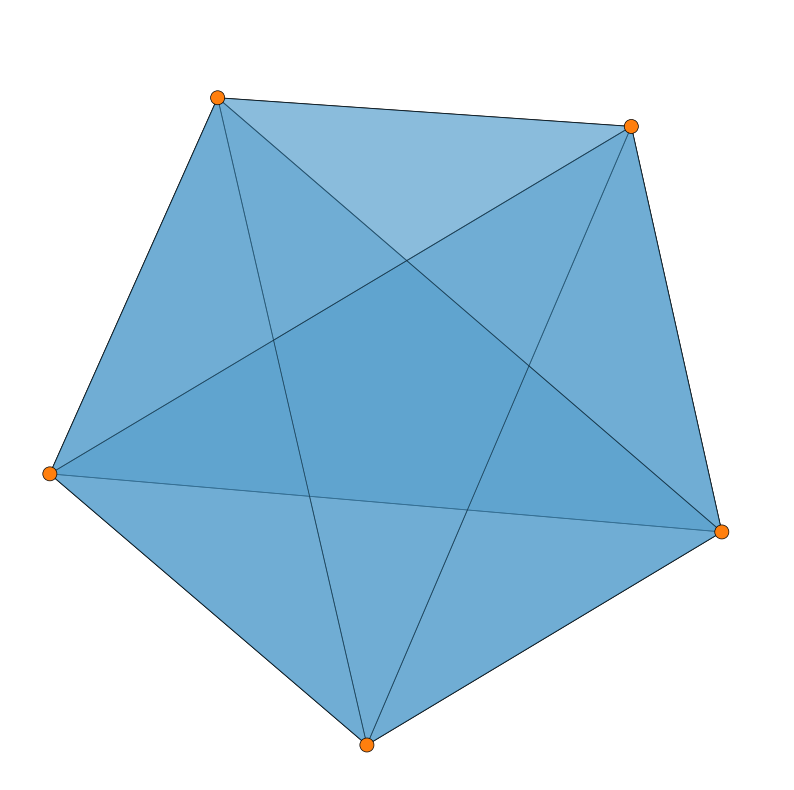

In [34]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
draw_2d_simplicial_complex(simplices, ax=ax)